Univariate Time Series


In [39]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots
from matplotlib.figure import Figure
from numpy import sum
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

In [2]:
file_tag = "Europe_GDP"
target = "GDP"
data: DataFrame = read_csv(
    "data/forecast_gdp_europe.csv",
    index_col="Year",
    sep=",",
    decimal=".",
    parse_dates=False,
    infer_datetime_format=False,
)
series: Series = data[target]

In [5]:
file_tag = "GDP_Europe"
filename = "data/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
)
series: Series = data[target]

In [38]:
import os
save_path = "C:/Users/zahra/lab05images"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Then modify the savefig commands to use this path
savefig(f"{save_path}/{file_tag}_persistence_optim_forecast.png")

<Figure size 600x450 with 0 Axes>

Nr. Records =  58
First timestamp 1960
Last timestamp 2017


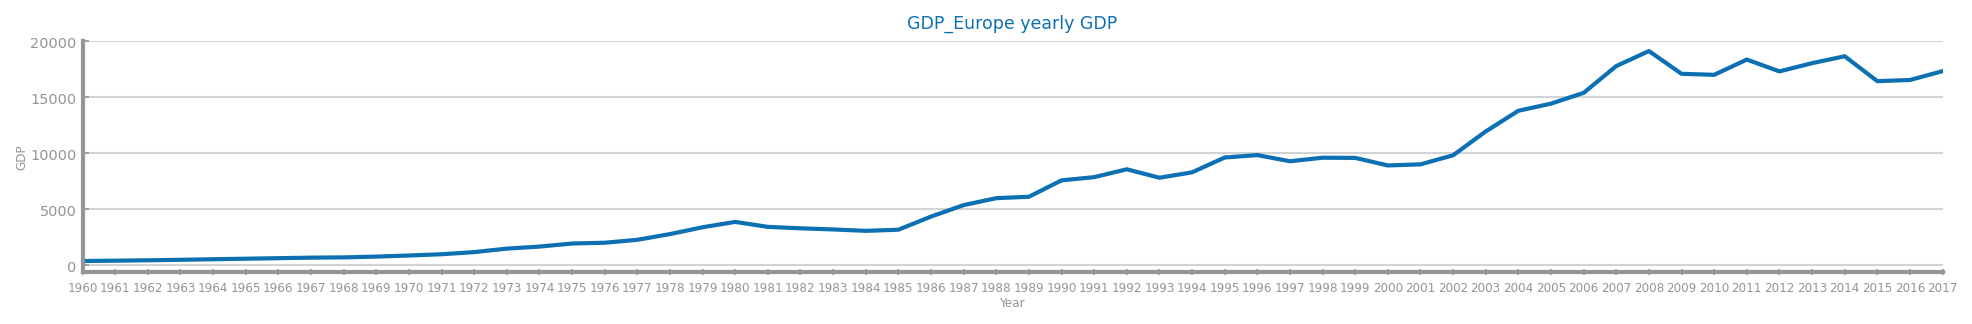

In [6]:
print("Nr. Records = ", series.shape[0])
print("First timestamp", series.index[0])
print("Last timestamp", series.index[-1])

figure(figsize=(4 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} yearly {target}",
)
show()

Multivariate Time Series


In [7]:
def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(4 * HEIGHT, HEIGHT / 2 * data.shape[1]))
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs


Nr. Records =  (58, 11)
First timestamp 1960
Last timestamp 2017


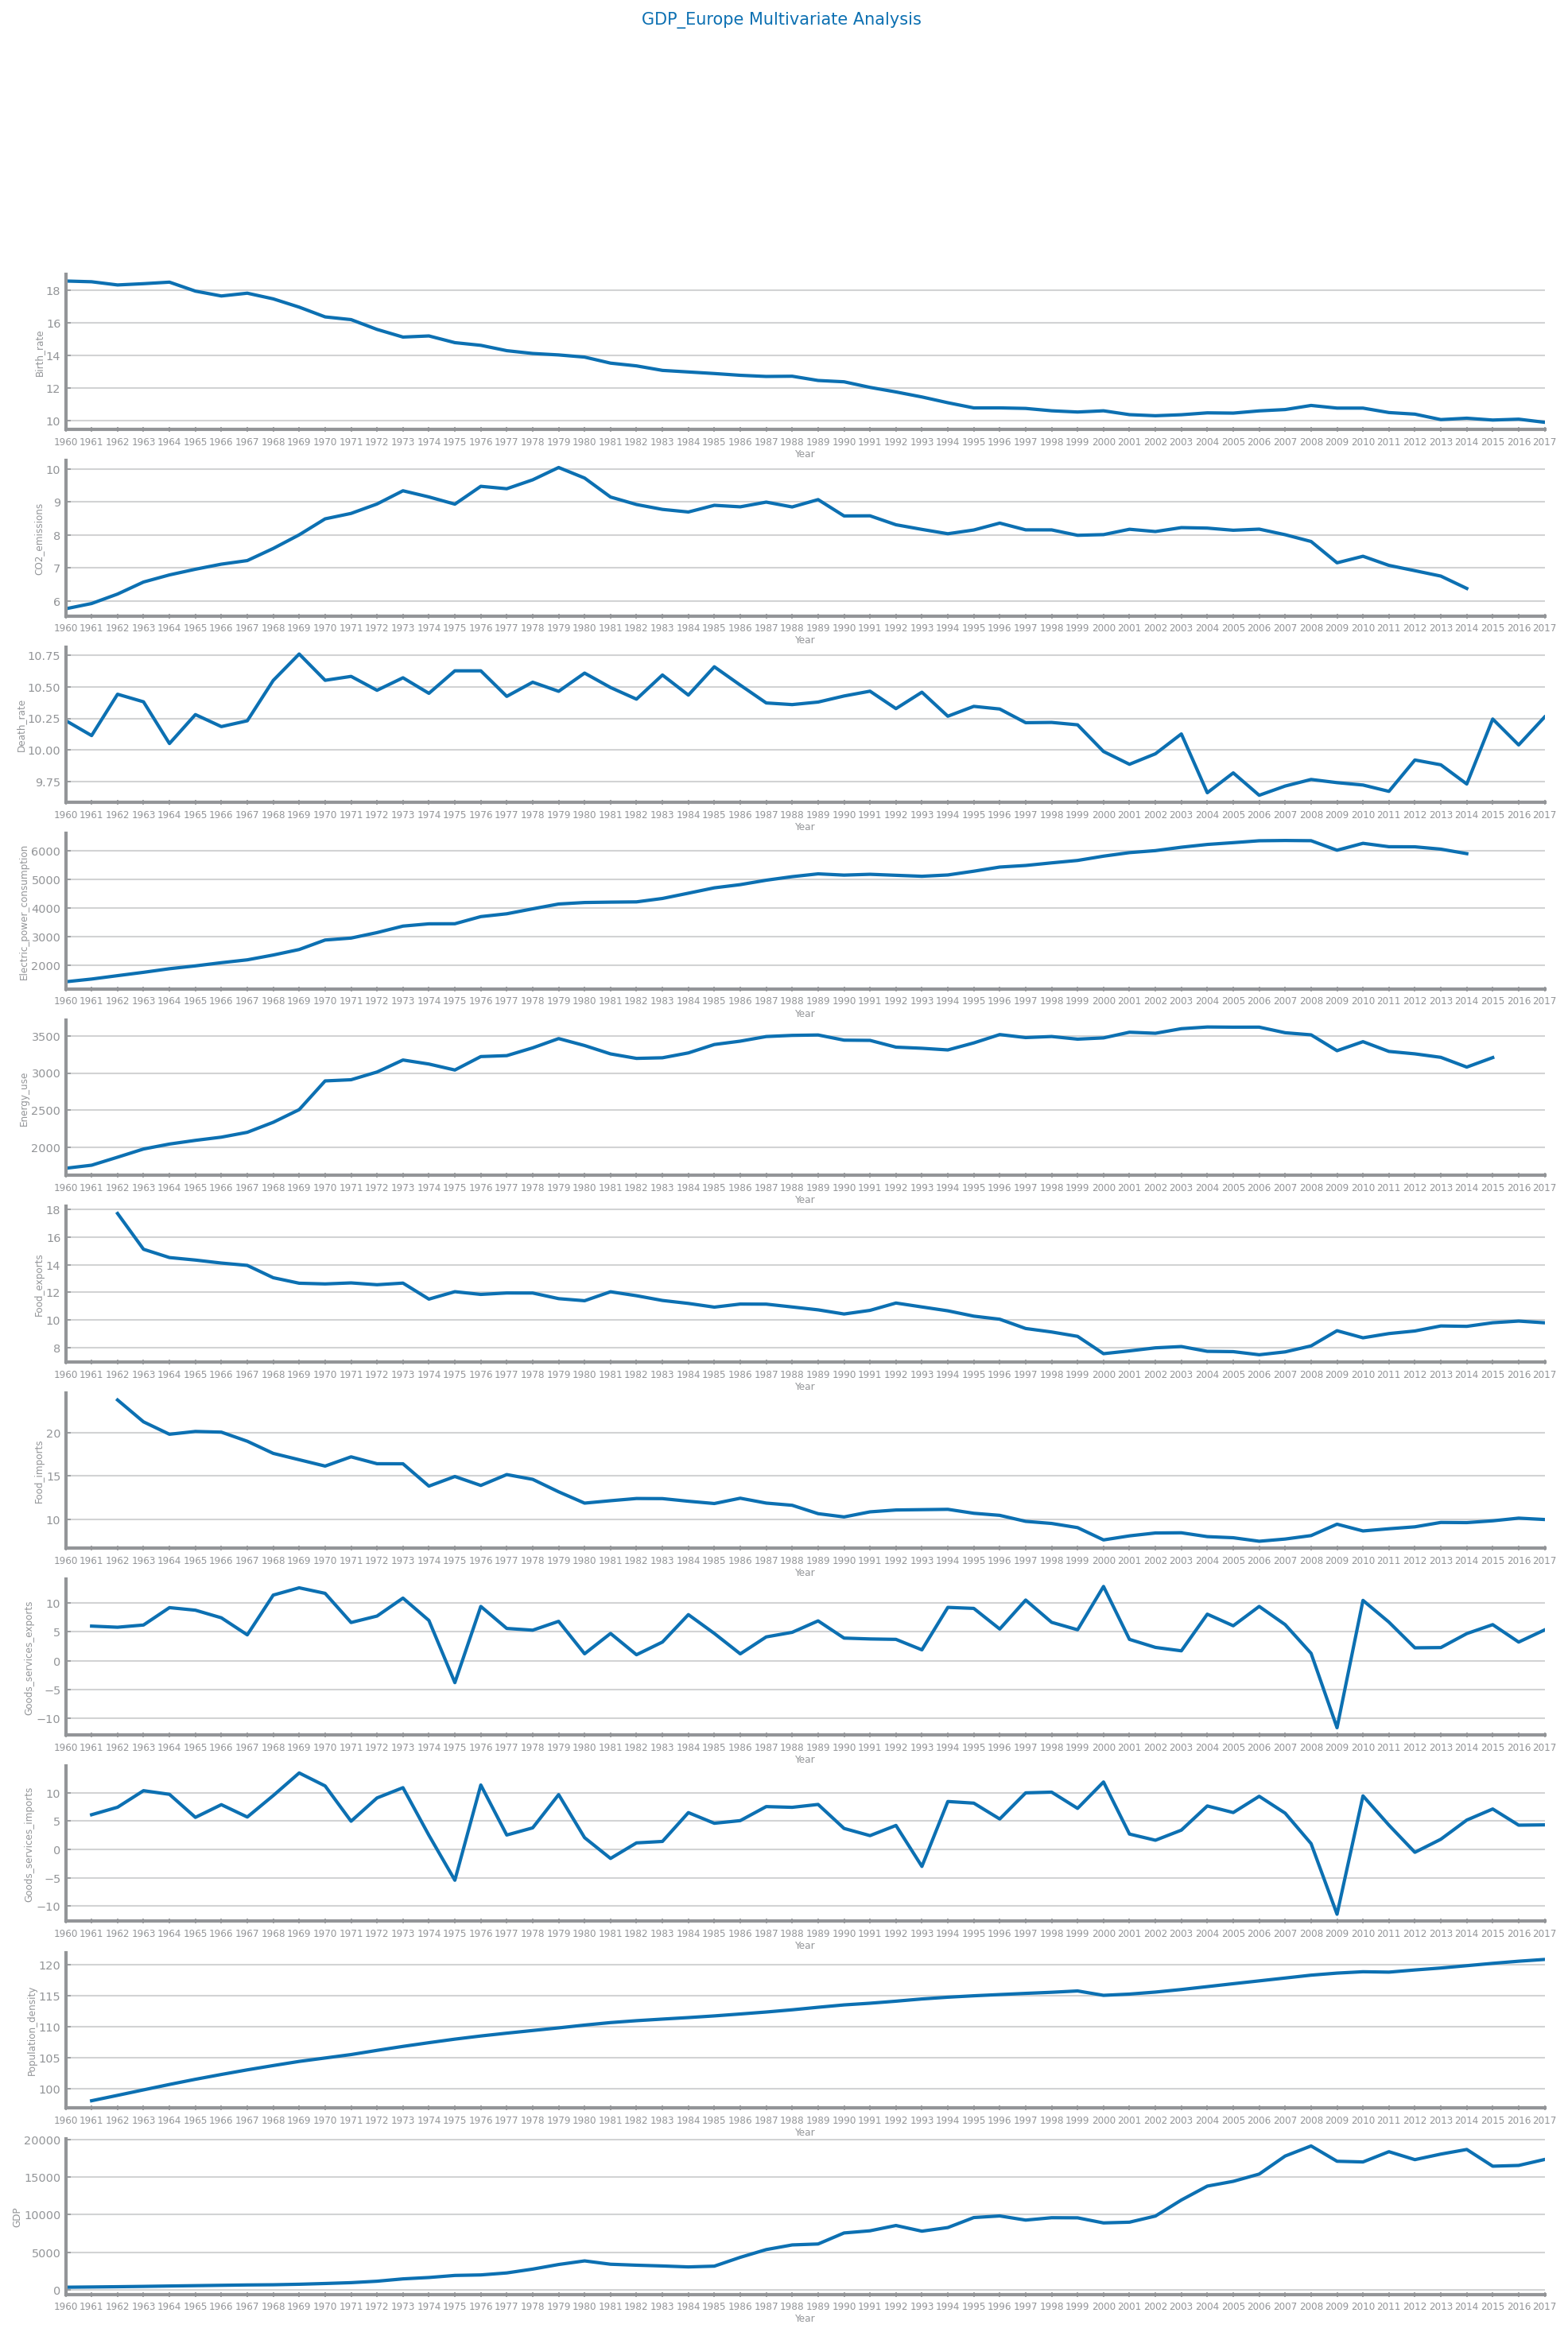

In [8]:
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])

plot_ts_multivariate_chart(data, title=f"{file_tag} Multivariate Analysis")
show()

Data Granularity


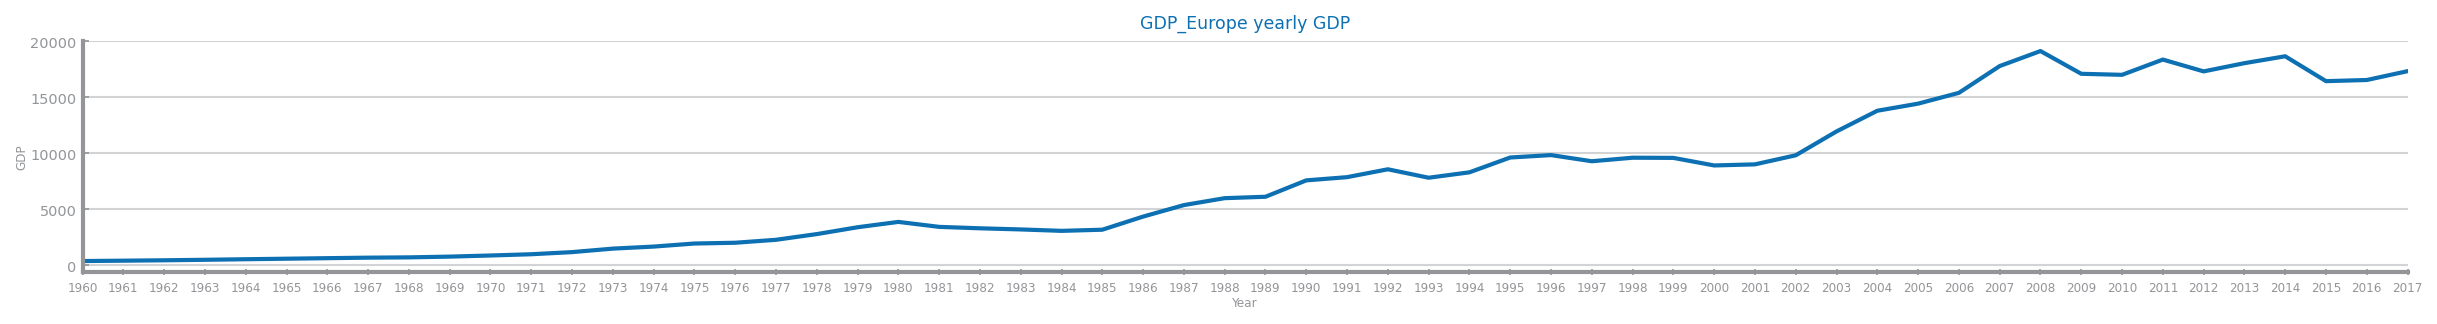

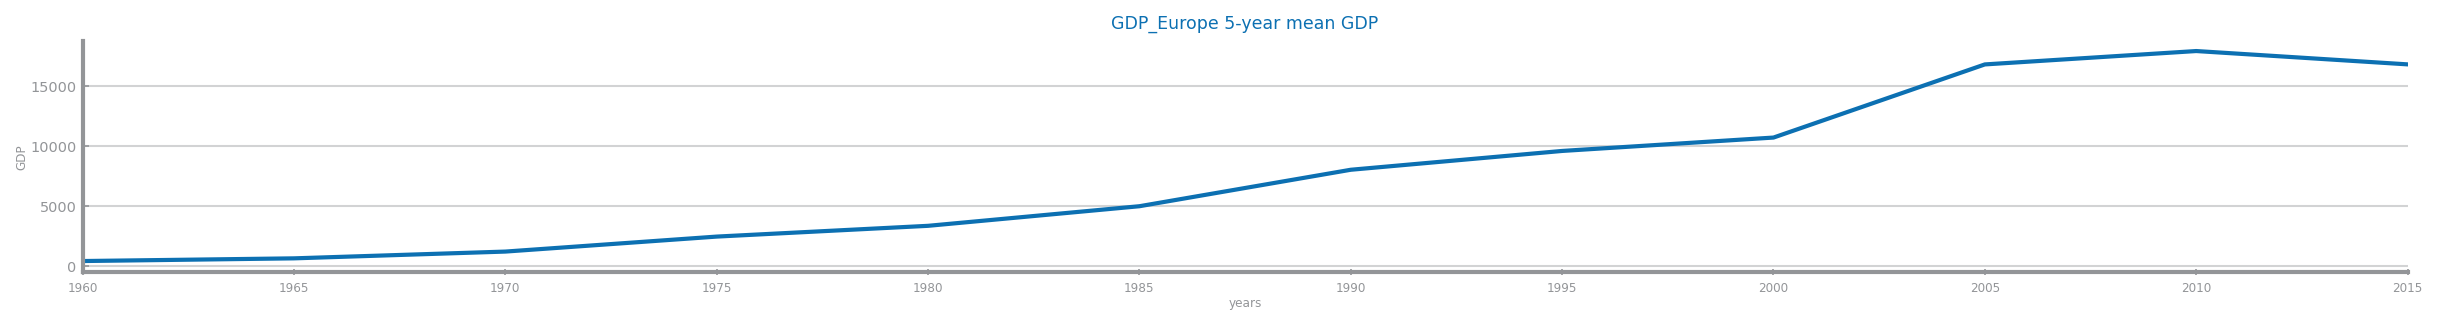

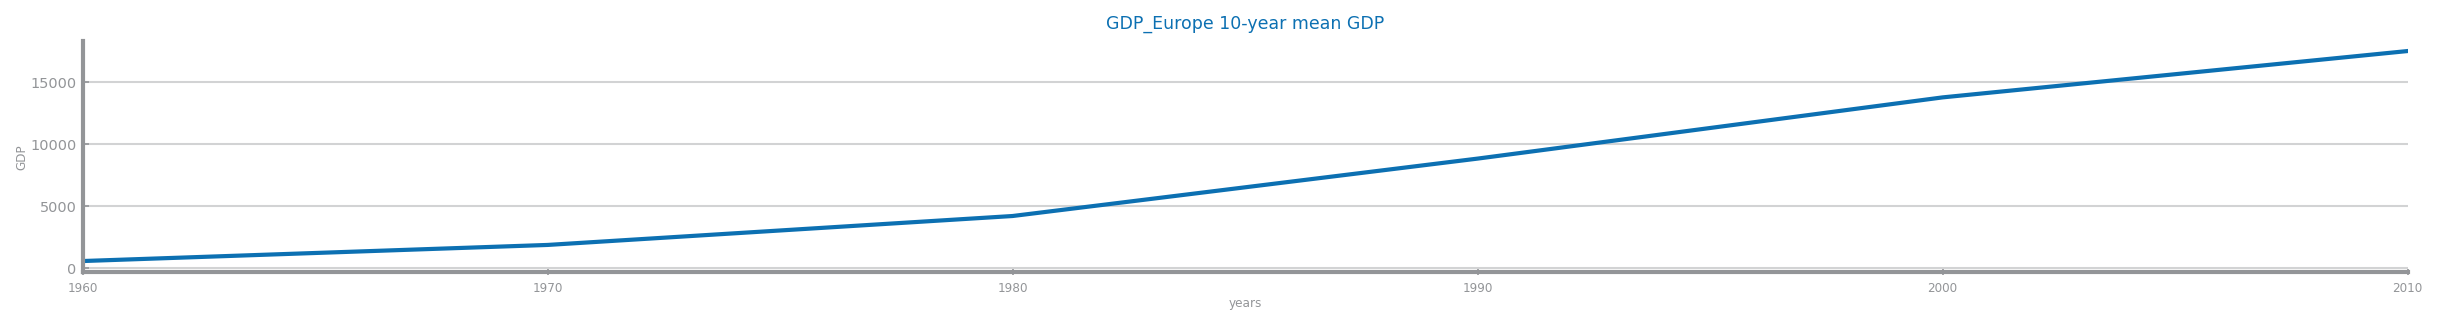

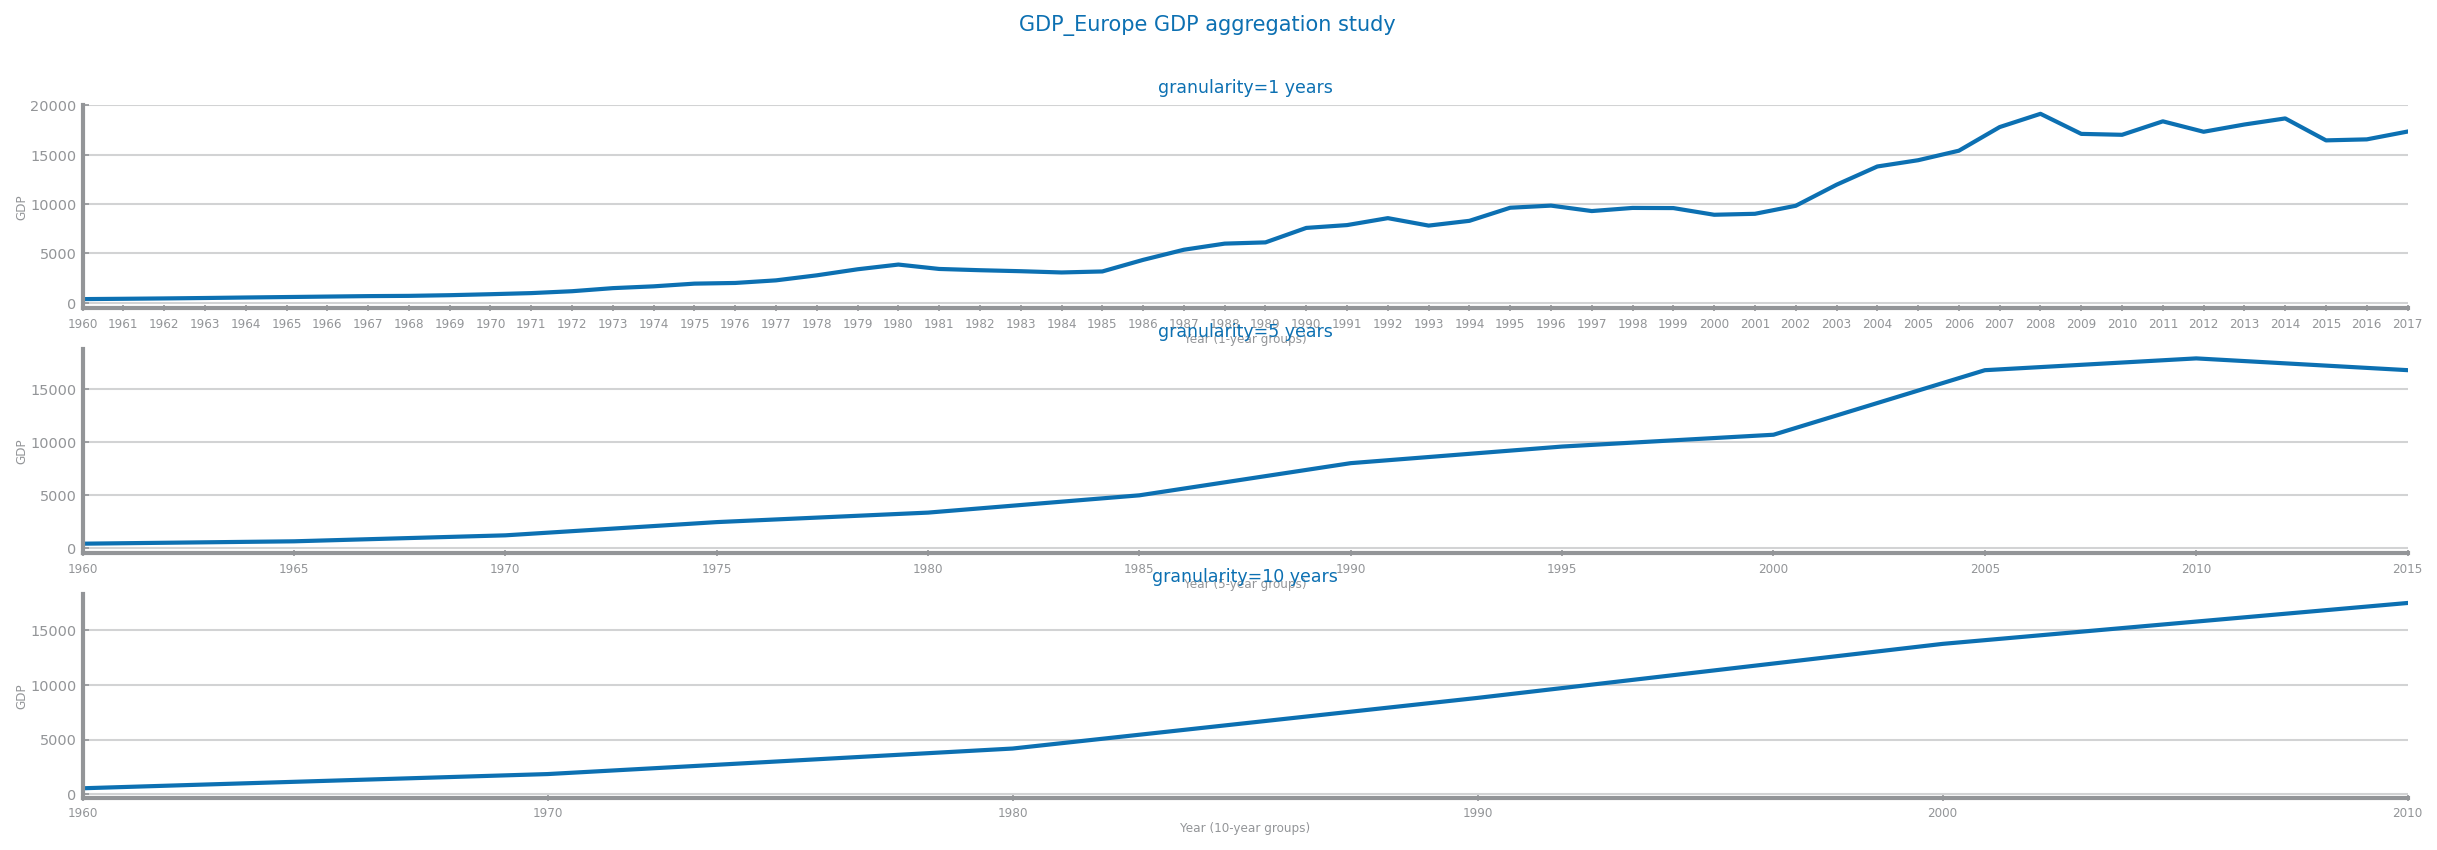

In [9]:
# First plot - Original data
figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} yearly {target}",
)
show()

# Aggregation function - modified to work with yearly data
from pandas import Index, Period
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: int = 5,  # Changed to number of years to group
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    df = df.groupby(df.index // gran_level * gran_level).agg(agg_func)
    return df


# second plot - 5-year aggregation
ss_5year: Series = ts_aggregation_by(series, 5)
figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_5year.index.to_list(),
    ss_5year.to_list(),
    xlabel="years",
    ylabel=target,
    title=f"{file_tag} 5-year mean {target}",
)
show()

# third plot - 10-year aggregation
ss_5year: Series = ts_aggregation_by(series, 10)
figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_5year.index.to_list(),
    ss_5year.to_list(),
    xlabel="years",
    ylabel=target,
    title=f"{file_tag} 10-year mean {target}",
)
show()

# Multiple granularity plots
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

grans: list[int] = [1, 5, 10]  # Changed to year groupings
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(5 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]}-year groups)",
        ylabel=target,
        title=f"granularity={grans[i]} years",
    )
show()

Data Distribution


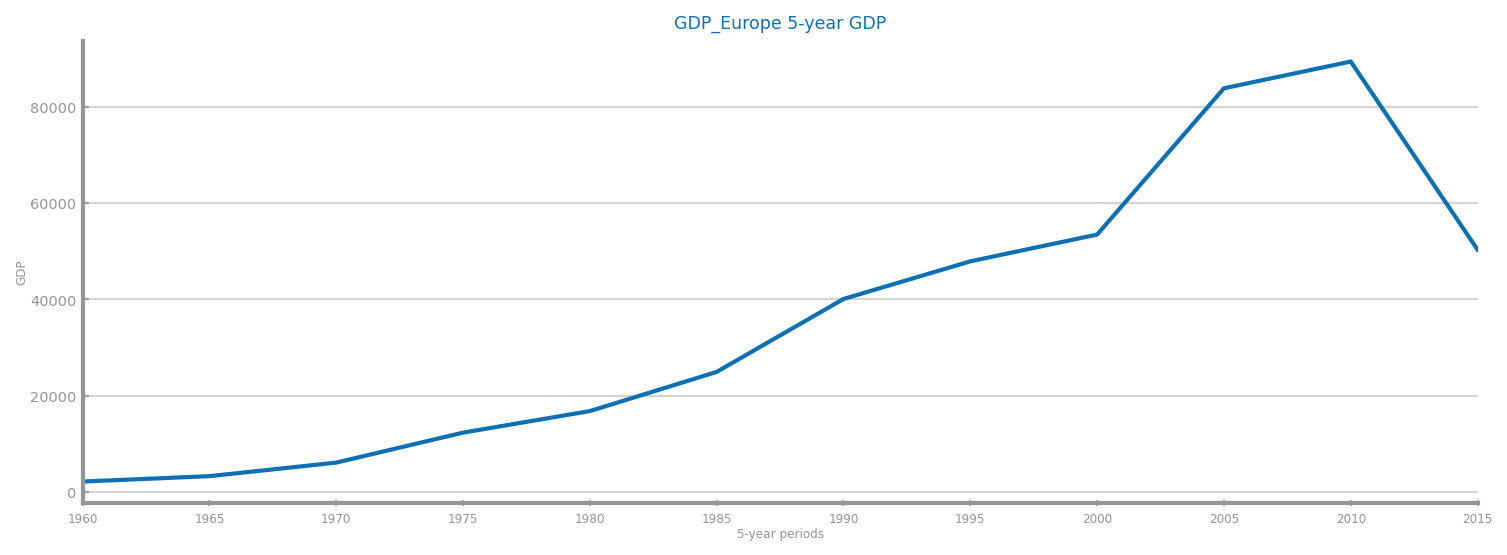

In [10]:
# Simple grouping by 5-year periods using integer division
ss_5year = series.groupby(series.index // 5 * 5).sum()

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_5year.index.to_list(),
    ss_5year.to_list(),
    xlabel="5-year periods",
    ylabel=target,
    title=f"{file_tag} 5-year {target}",
)
show()

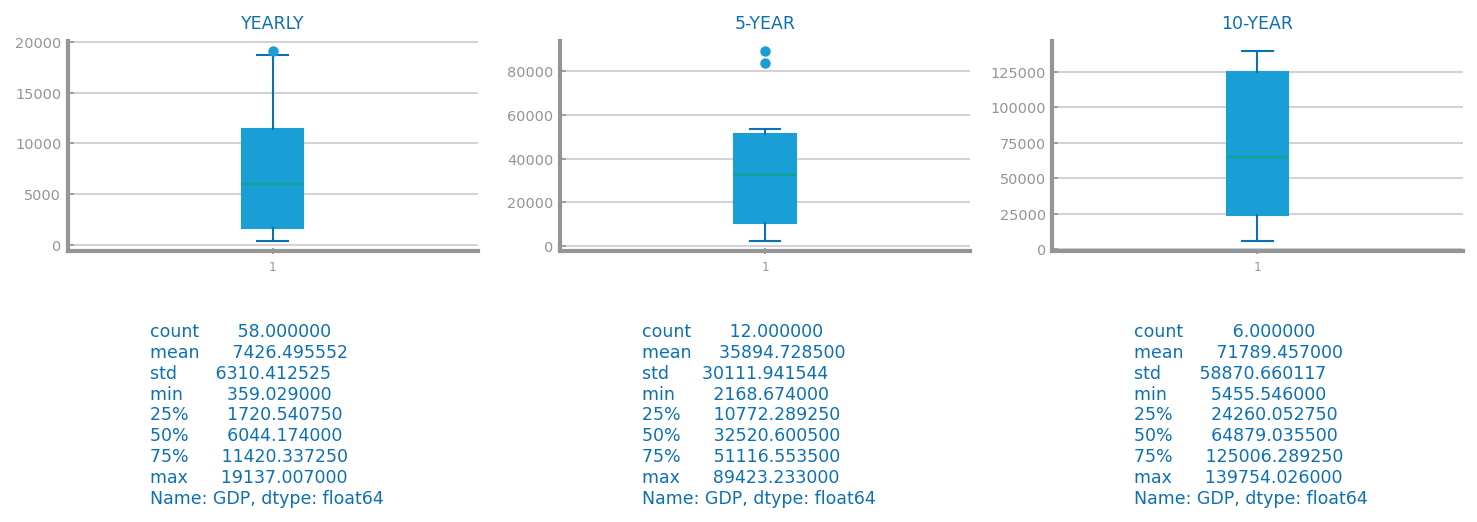

In [11]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels

# Calculate 10-year aggregation similar to 5-year
ss_10year = series.groupby(series.index // 10 * 10).sum()

# Create subplot with 3 columns instead of 2
fig: Figure
axs: array
fig, axs = subplots(2, 3, figsize=(3 * HEIGHT, HEIGHT))  # Changed to 2x3 grid

# First row - box plots
set_chart_labels(axs[0, 0], title="YEARLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="5-YEAR")
axs[0, 1].boxplot(ss_5year)
set_chart_labels(axs[0, 2], title="10-YEAR")
axs[0, 2].boxplot(ss_10year)

# Second row - statistical descriptions
axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 0].text(0.2, 0, str(series.describe()), fontsize="small")

axs[1, 1].grid(False)
axs[1, 1].set_axis_off()
axs[1, 1].text(0.2, 0, str(ss_5year.describe()), fontsize="small")

axs[1, 2].grid(False)
axs[1, 2].set_axis_off()
axs[1, 2].text(0.2, 0, str(ss_10year.describe()), fontsize="small")

show()

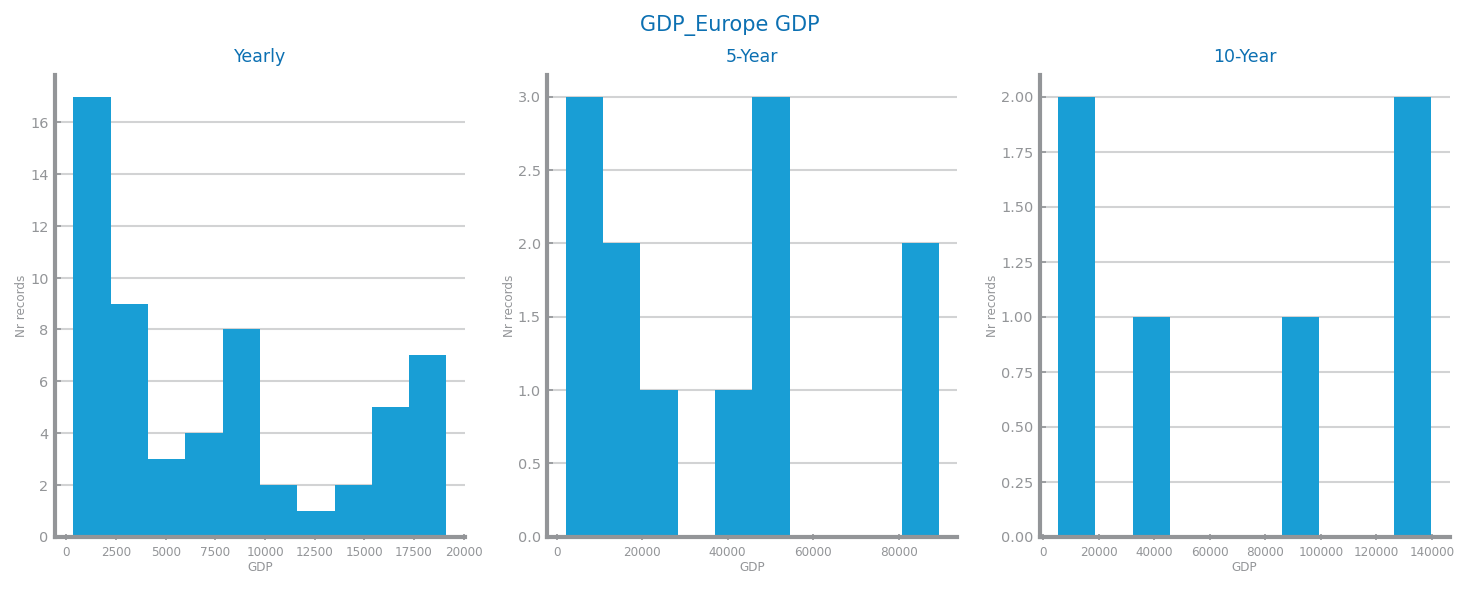

In [12]:
# Calculate different year groupings using integer division
ss_5year = series.groupby(series.index // 5 * 5).sum()
ss_10year = series.groupby(series.index // 10 * 10).sum()

grans: list[Series] = [series, ss_5year, ss_10year]
gran_names: list[str] = ["Yearly", "5-Year", "10-Year"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

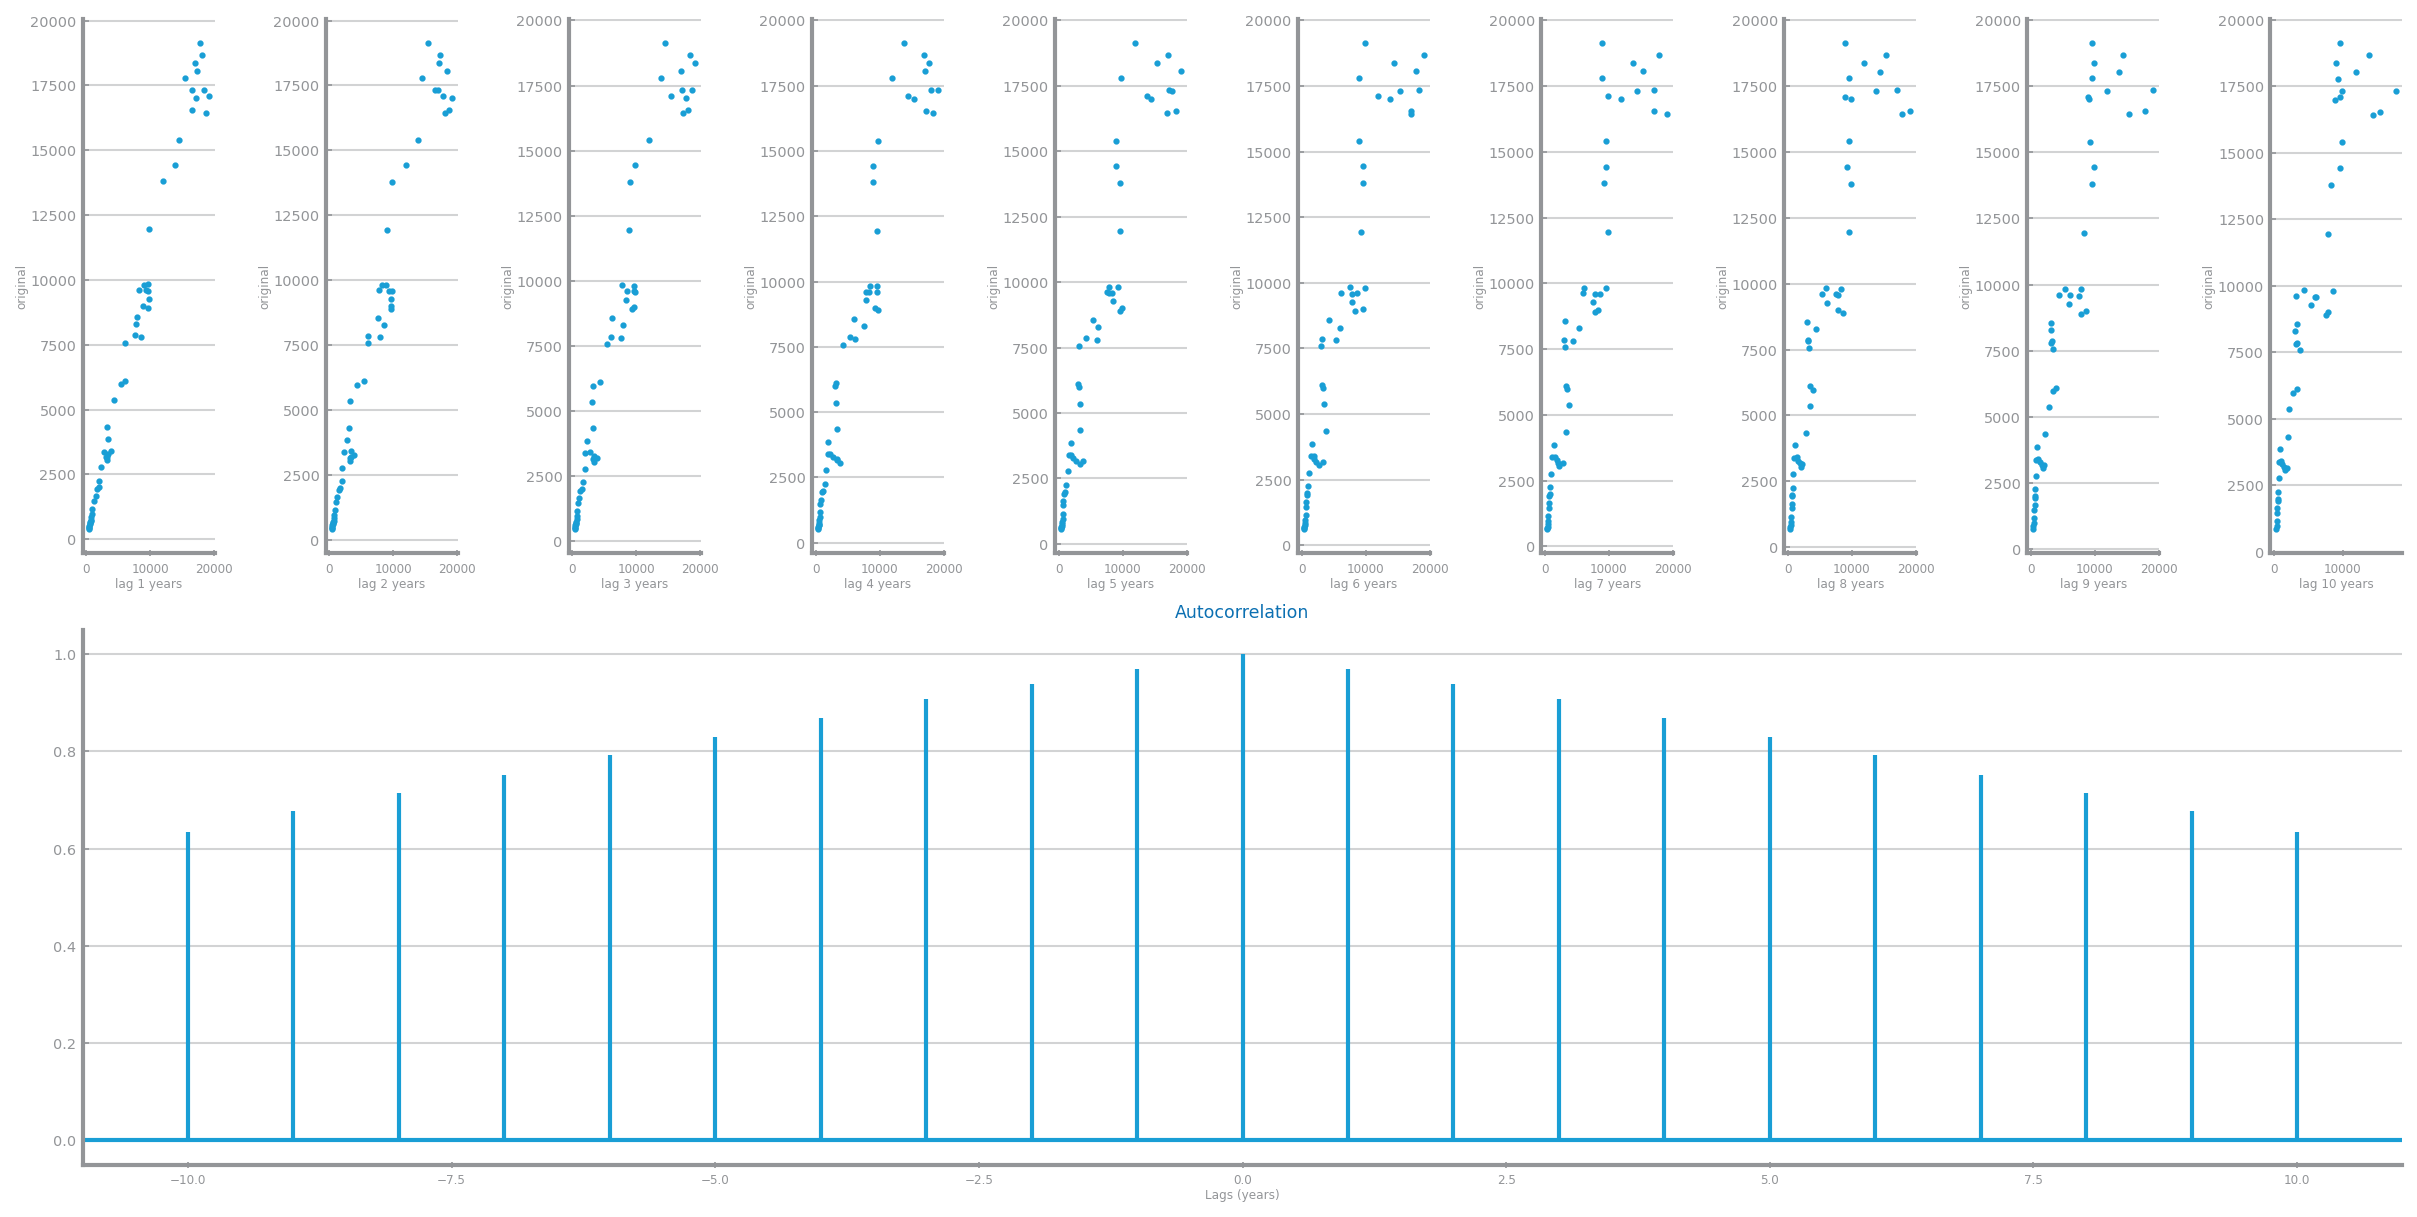

In [13]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag} years")  # Added 'years' to label
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags (years)")  # Added 'years' to label
    return

# Using 5 year max lag with 1 year delta
autocorrelation_study(series, 10, 1)

In [14]:
from pandas import Series
from matplotlib.pyplot import subplots, show, gca
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose
from dslabs_functions import HEIGHT, set_chart_labels

def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
) -> list[Axes]:
    # For yearly data, we need to ensure we have enough periods for decomposition
    # Using period=10 for decade-based seasonality
    decomposition: DecomposeResult = seasonal_decompose(series, period=10, model="add")
    components: dict = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows: int = len(components)
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")
    i: int = 0
    for key in components:
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(components[key])
        i += 1
    return axs

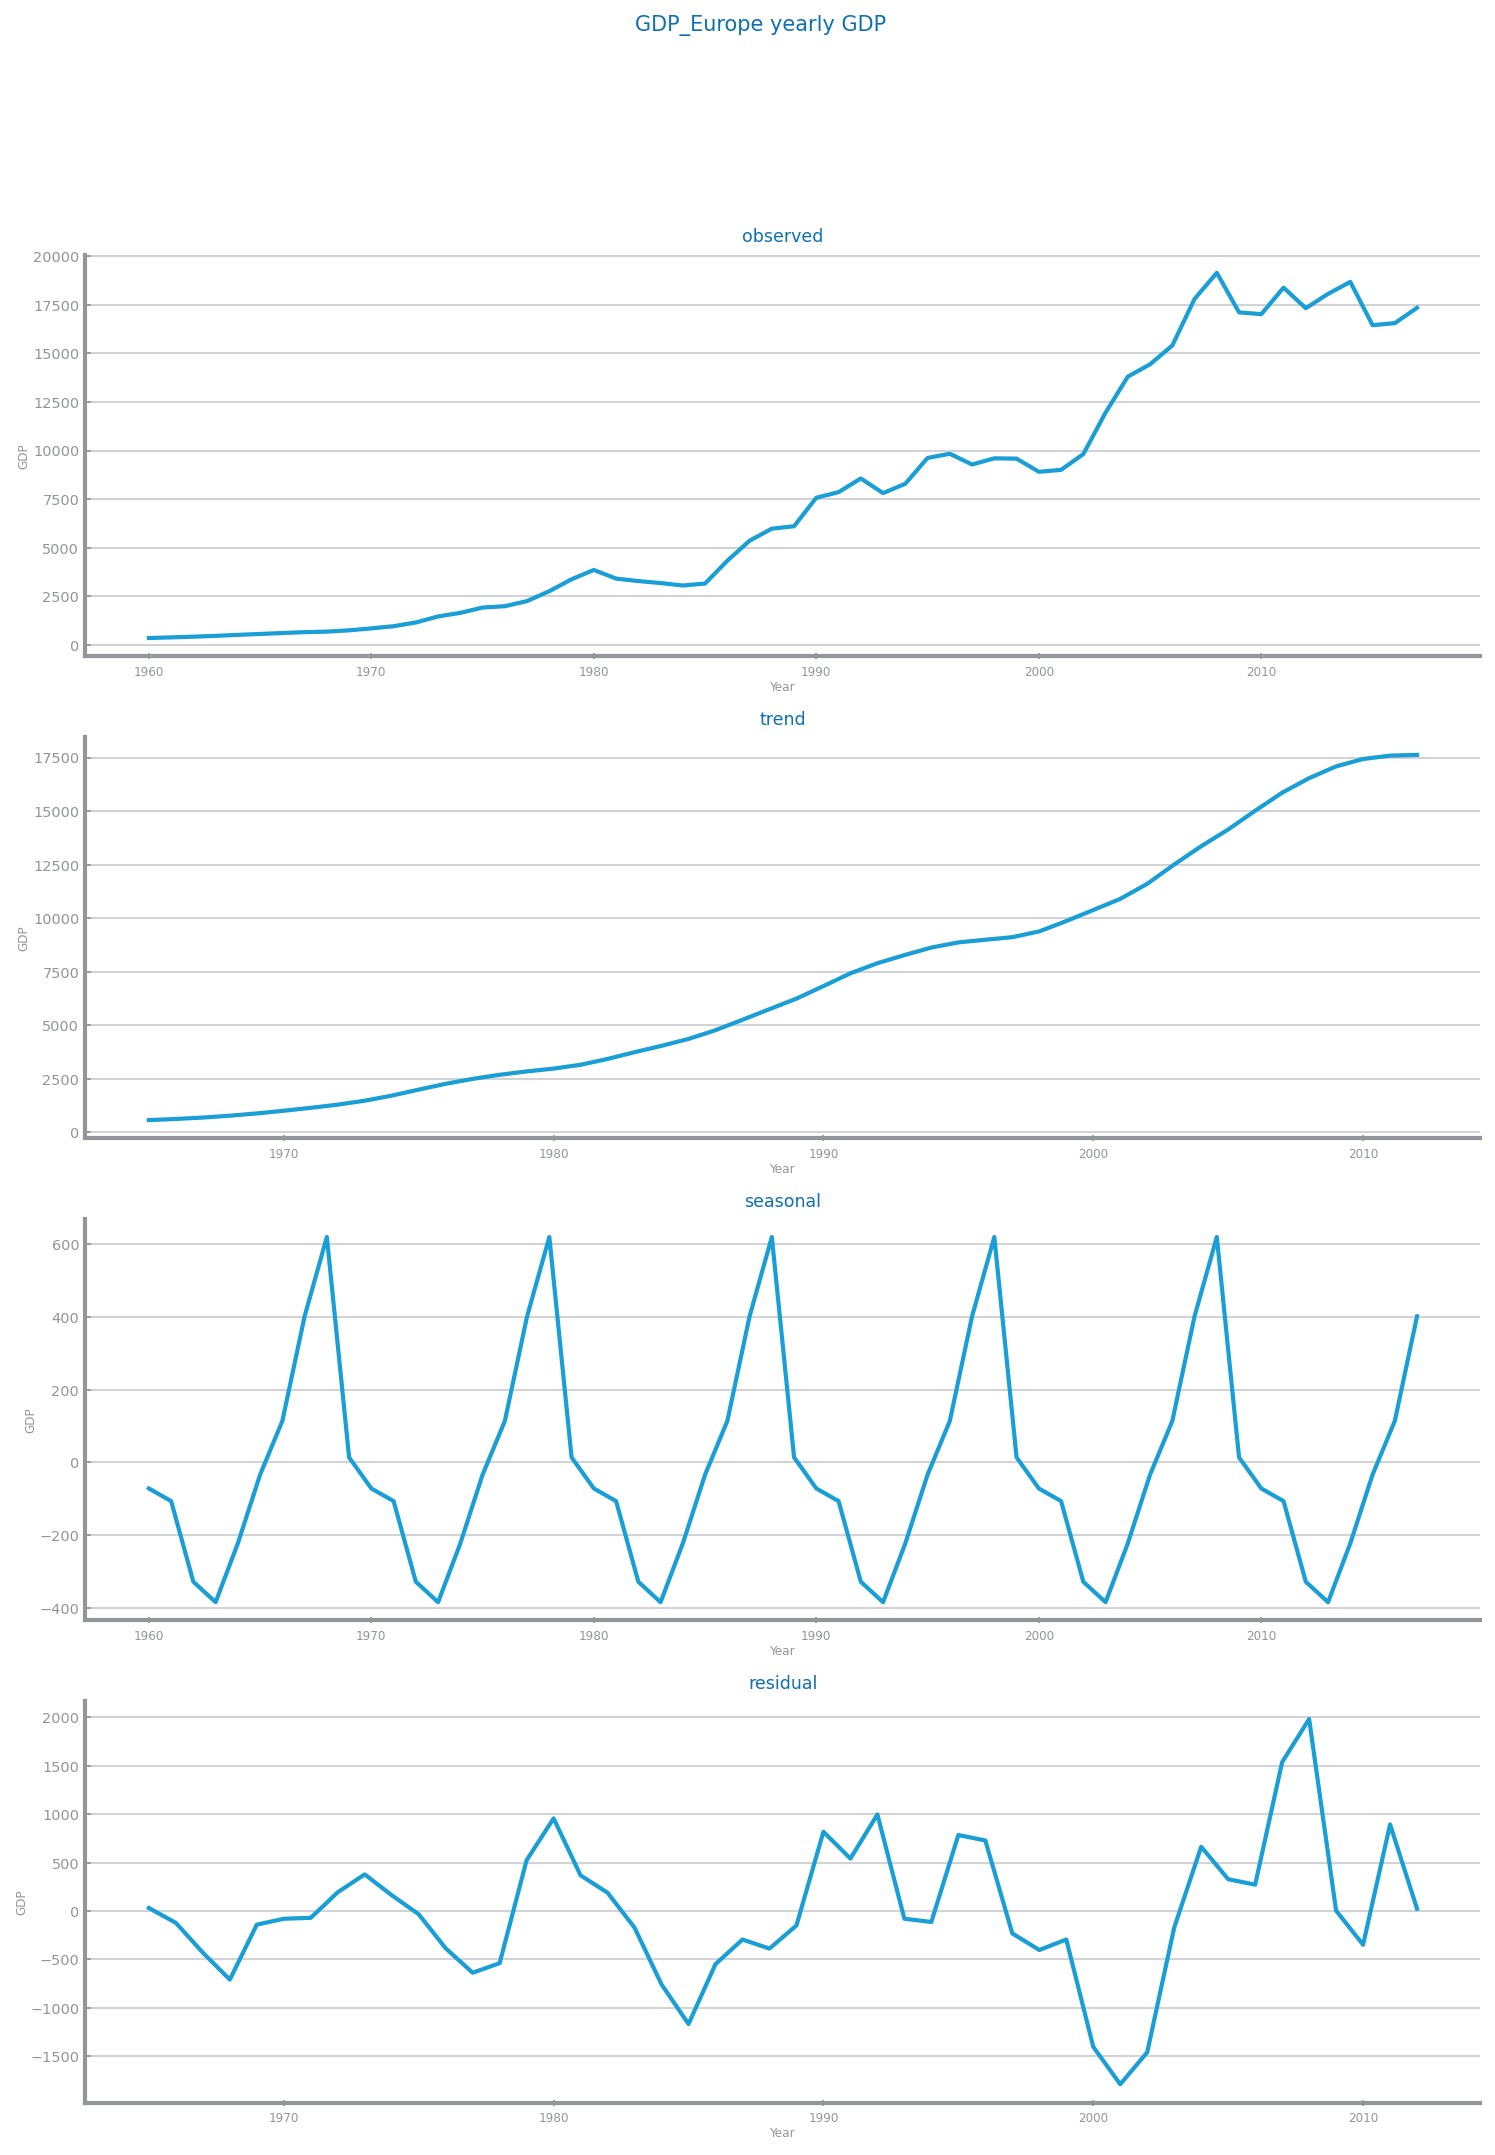

In [15]:
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart


plot_components(
    series,
    title=f"{file_tag} yearly {target}",
    x_label=series.index.name,
    y_label=target,
)
show()

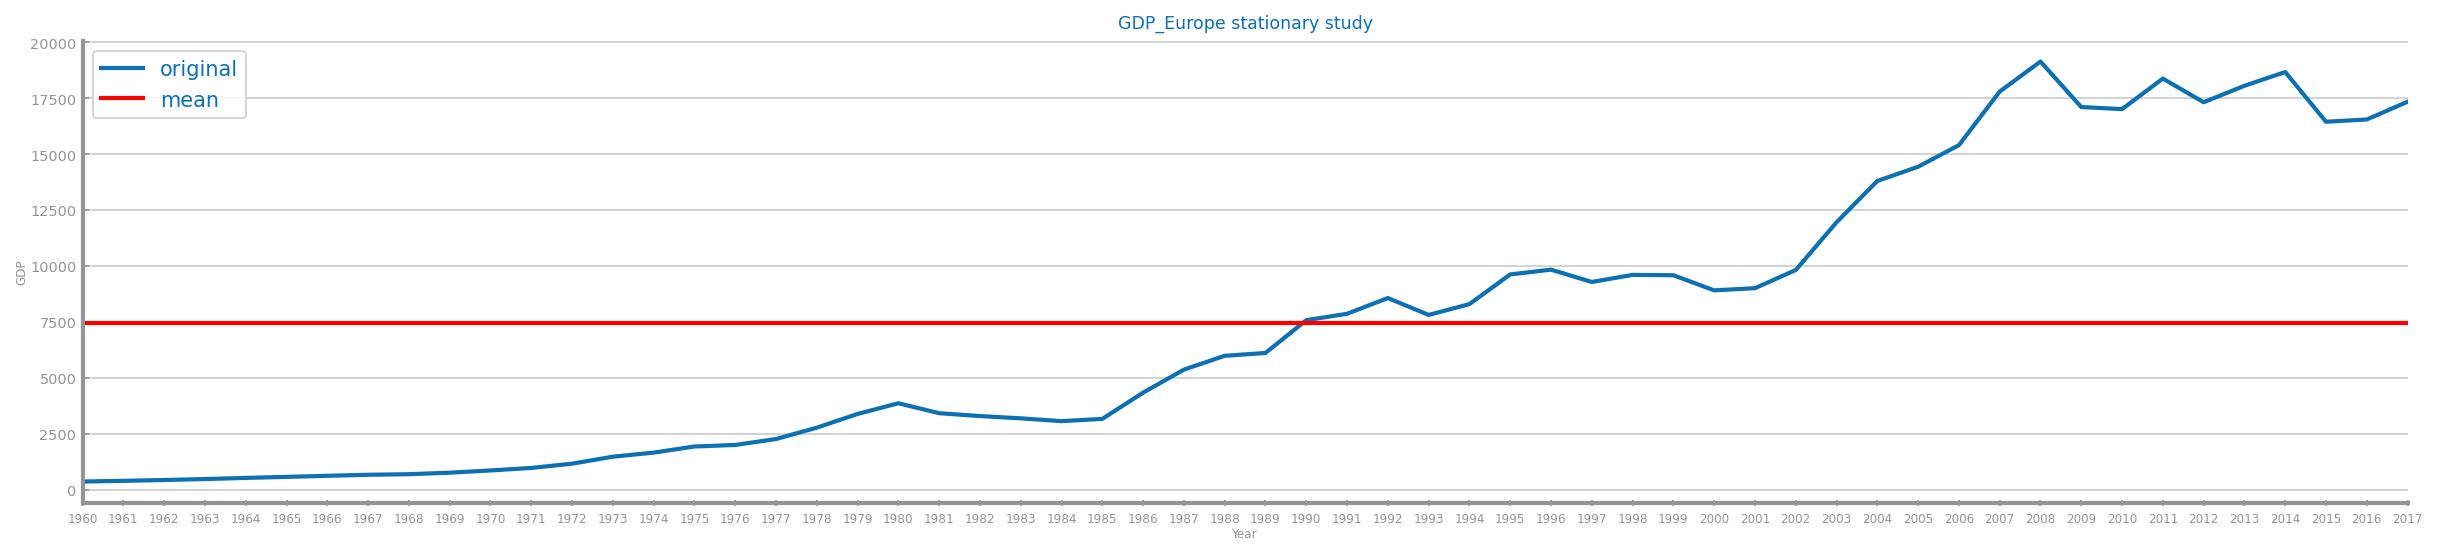

In [16]:
from matplotlib.pyplot import plot, legend

figure(figsize=(5 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
n: int = len(series)
plot(series.index, [series.mean()] * n, "r-", label="mean")
legend()
show()

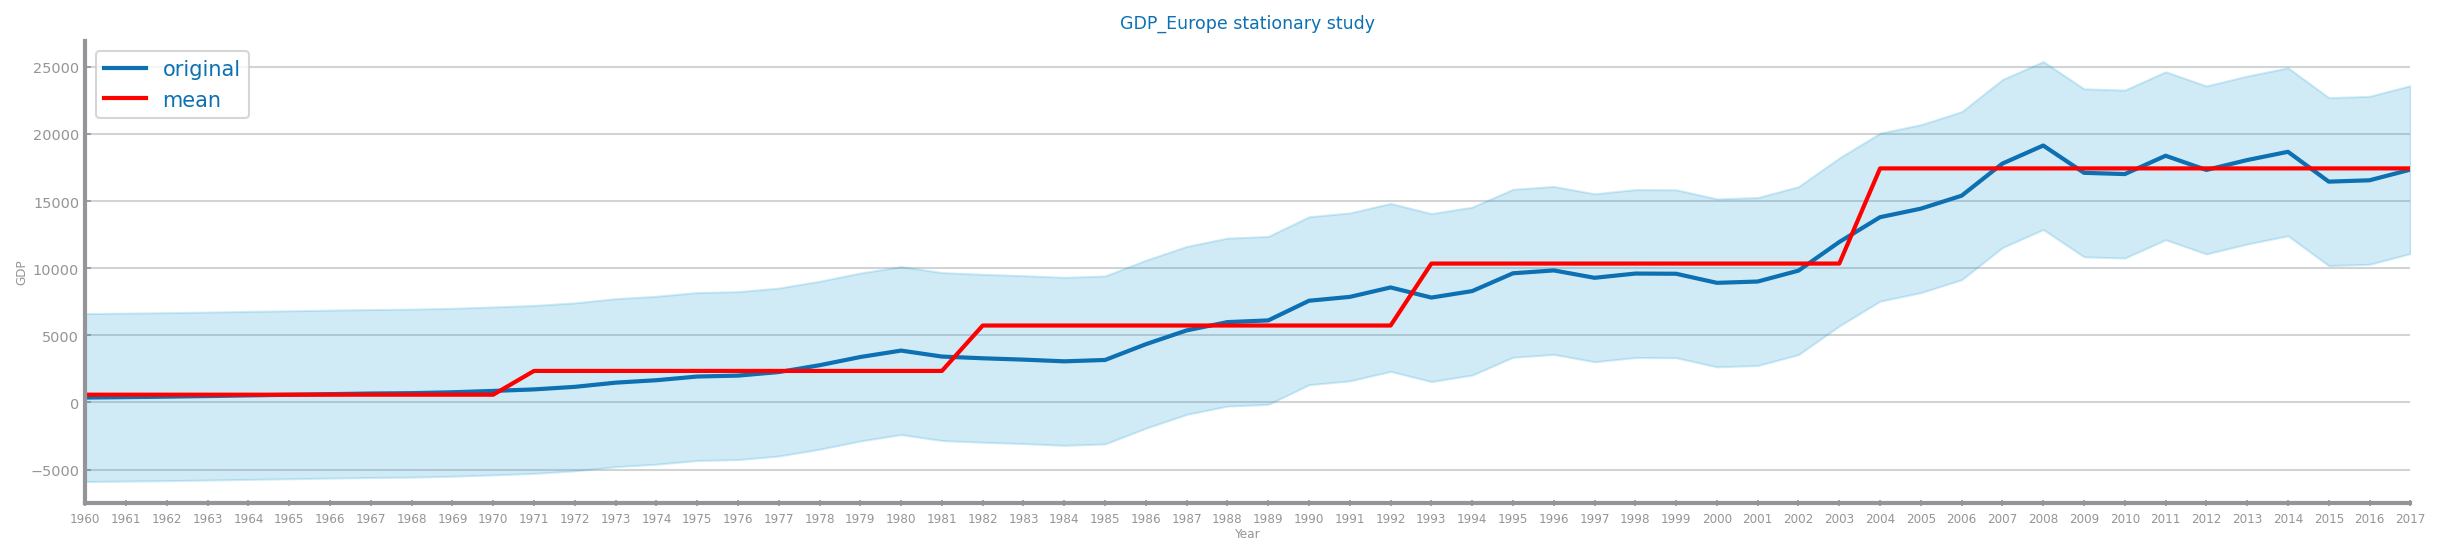

In [17]:
BINS = 5  # Changed to 5 bins since we have yearly data
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = series[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(5 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
    show_stdev=True,
)
n: int = len(series)
plot(series.index, mean_line, "r-", label="mean")
legend()
show()

In [18]:
from statsmodels.tsa.stattools import adfuller

def eval_stationarity(series: Series) -> bool:
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05

print(f"The series {('is' if eval_stationarity(series) else 'is not')} stationary")

ADF Statistic: -0.608
p-value: 0.869
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596
The series is not stationary


Module 2: Transformation

Scaling


In [19]:
from sklearn.preprocessing import StandardScaler

def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()
    transf: StandardScaler = StandardScaler().fit(data)
    df = DataFrame(transf.transform(data), index=data.index)
    df.columns = vars
    return df

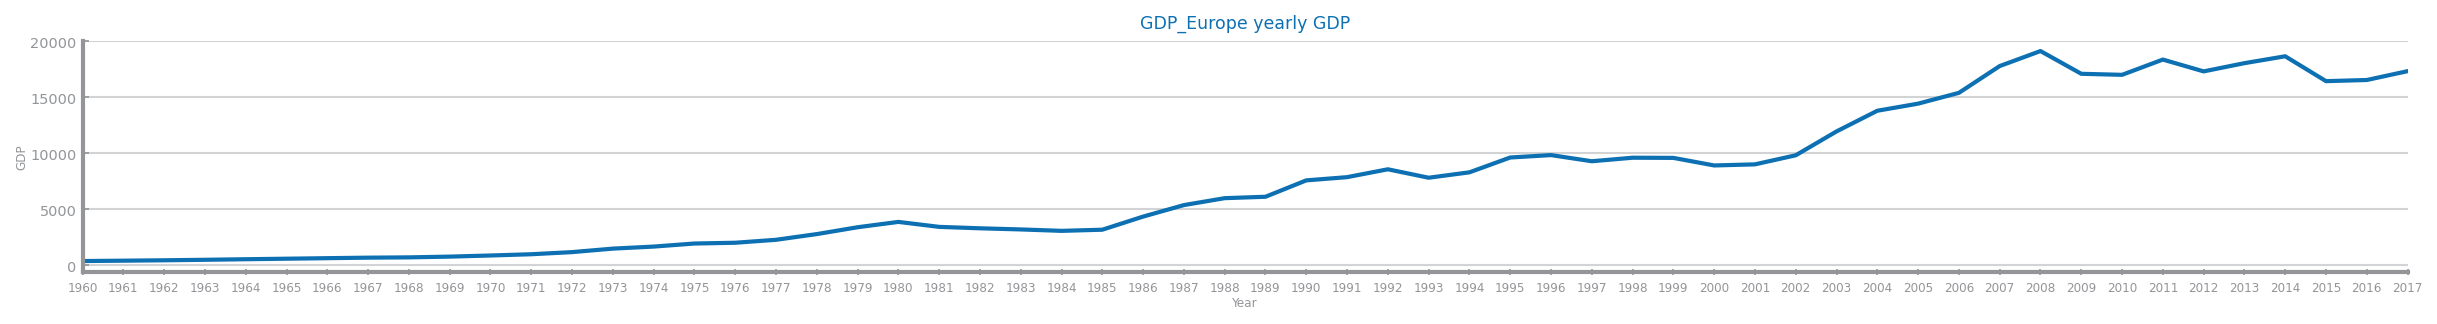

In [40]:
# Plot original data
figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} yearly {target}",
)
show()

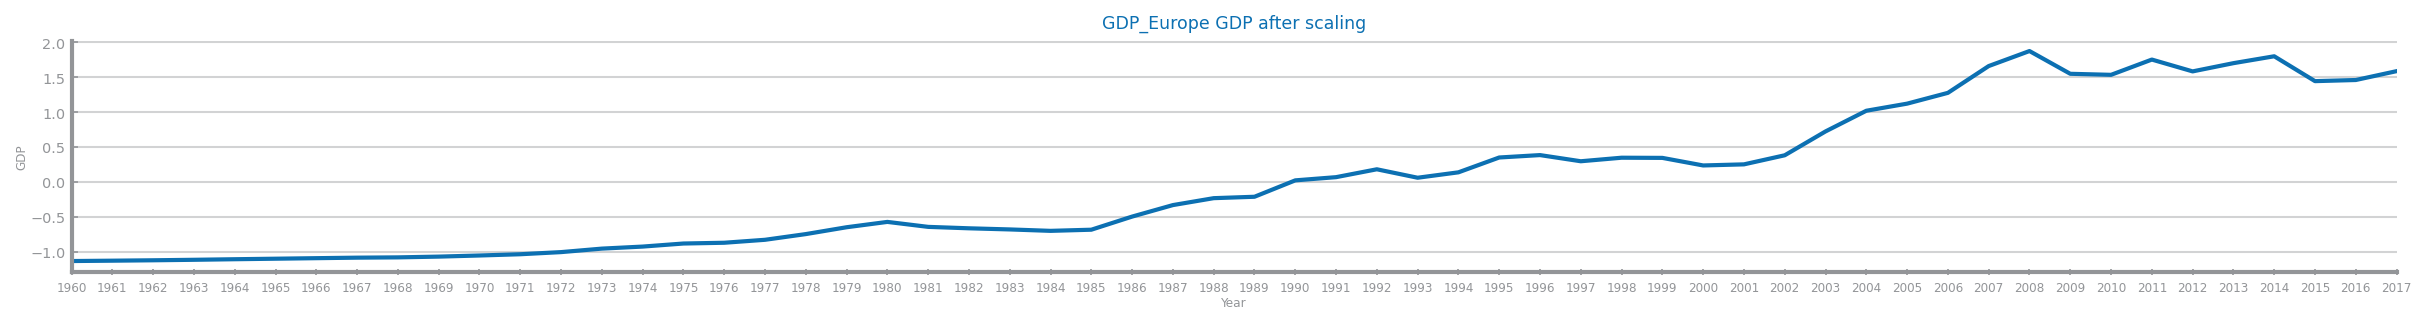

In [20]:
# Scale and plot scaled data
df: DataFrame = scale_all_dataframe(data)

ss: Series = df[target]
figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss.index.to_list(),
    ss.to_list(),
    xlabel=ss.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after scaling",
)
show()

Smoothing

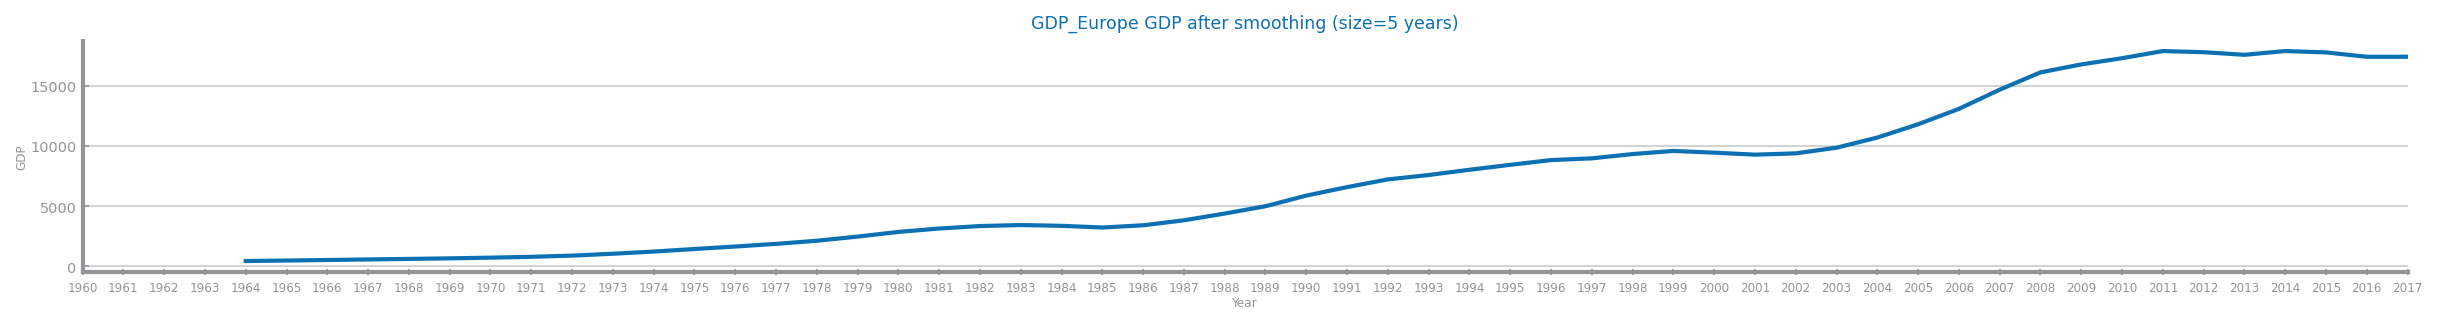

In [21]:
WIN_SIZE = 5  
ss_smooth: Series = series.rolling(window=WIN_SIZE).mean()

figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_smooth.index.to_list(),
    ss_smooth.to_list(),
    xlabel=ss_smooth.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after smoothing (size={WIN_SIZE} years)",  # Added 'years'
)
show()

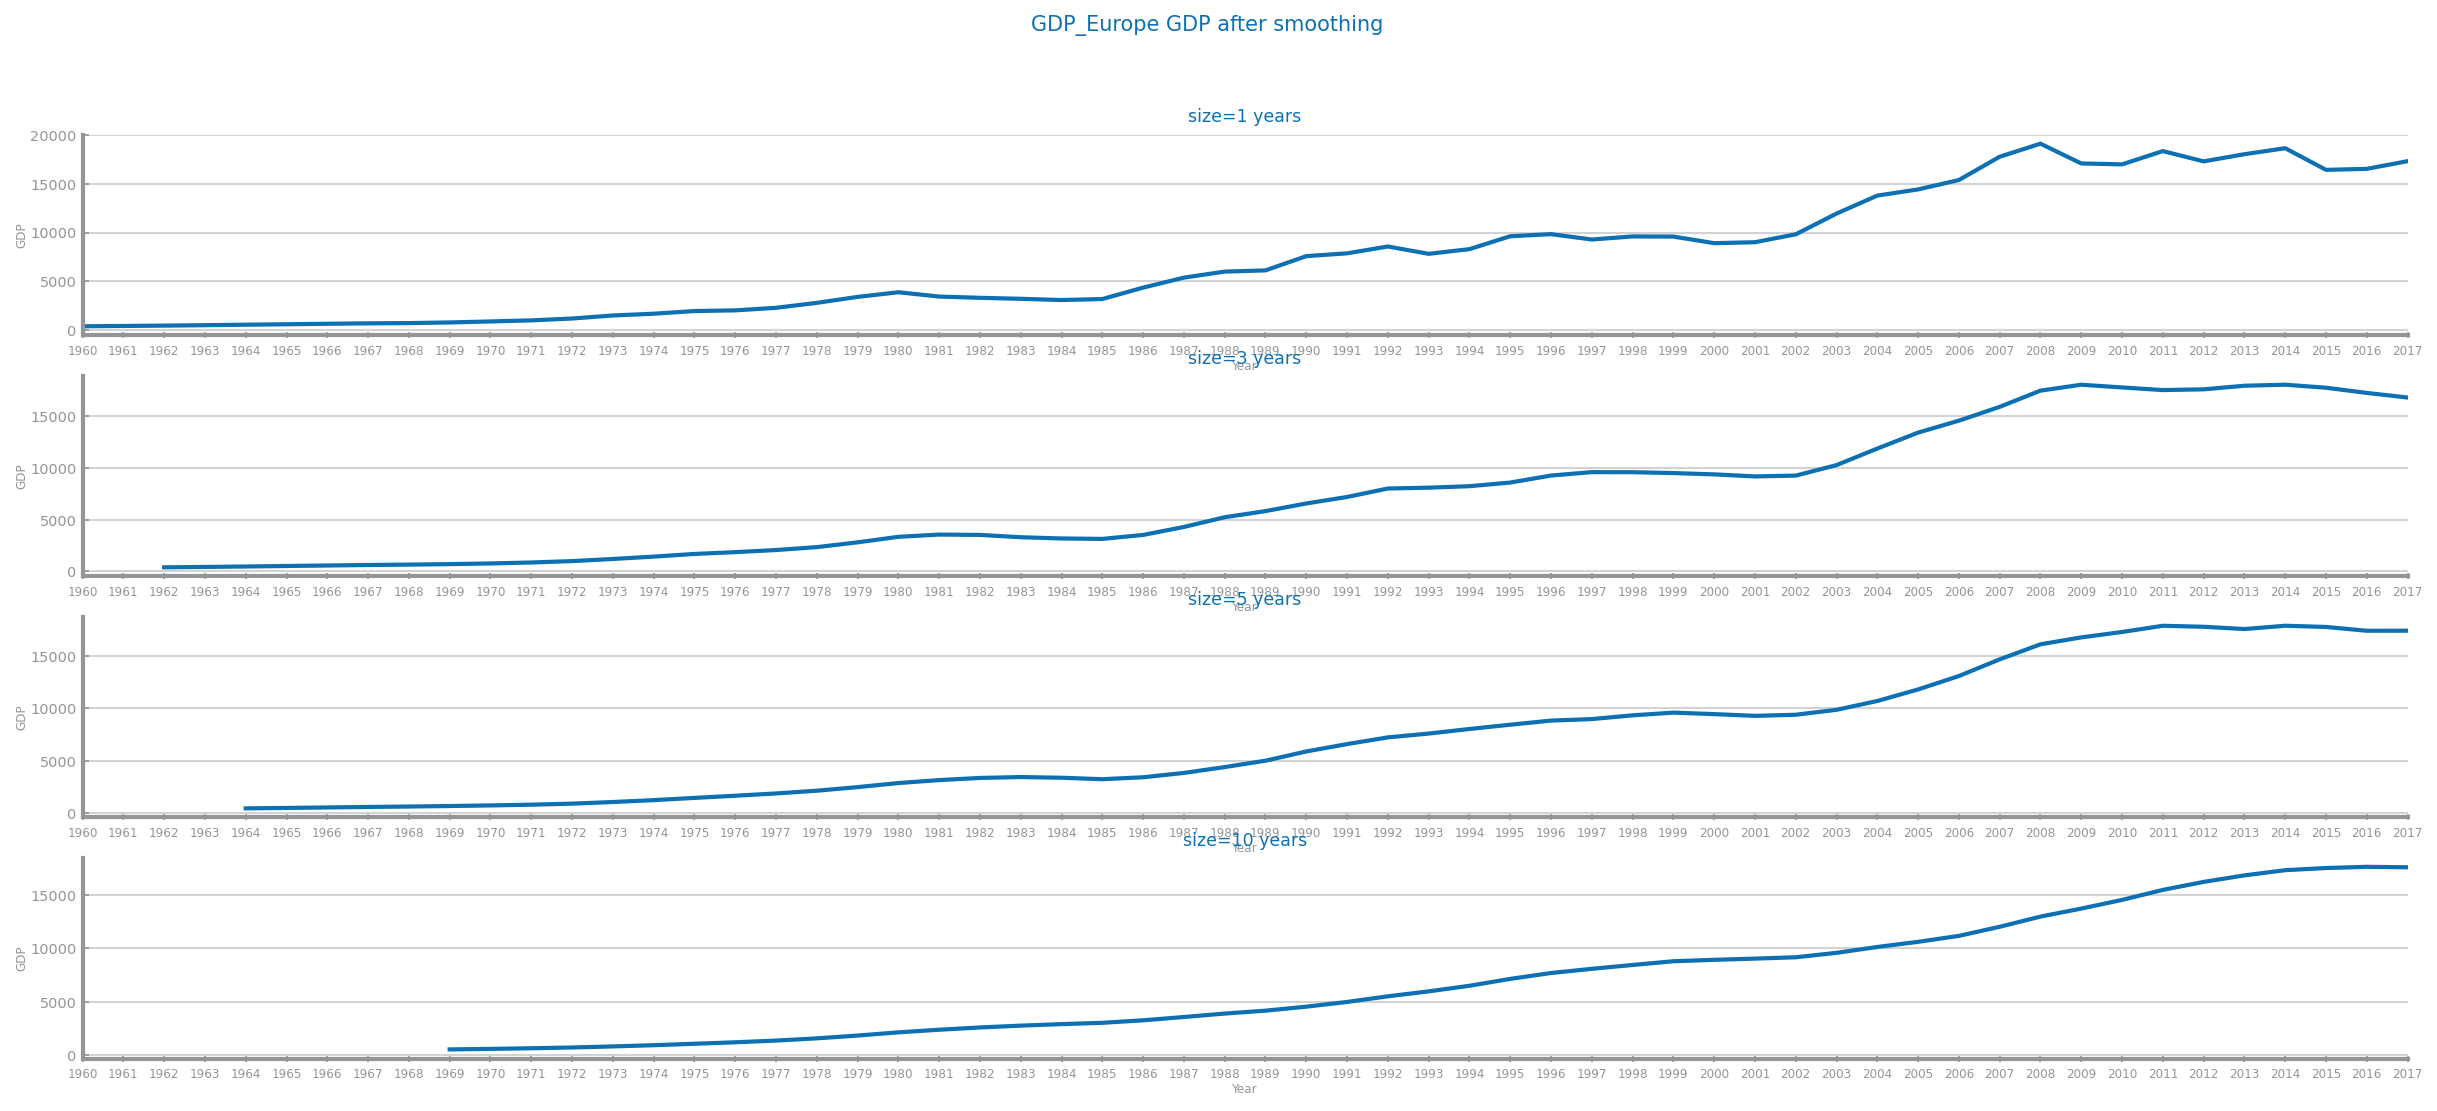

In [22]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

# Modified window sizes for yearly data
sizes: list[int] = [1, 3, 5, 10]  # Changed to smaller windows appropriate for yearly data
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(sizes), 1, figsize=(5 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing")

for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]} years",  # Added 'years'
    )
show()

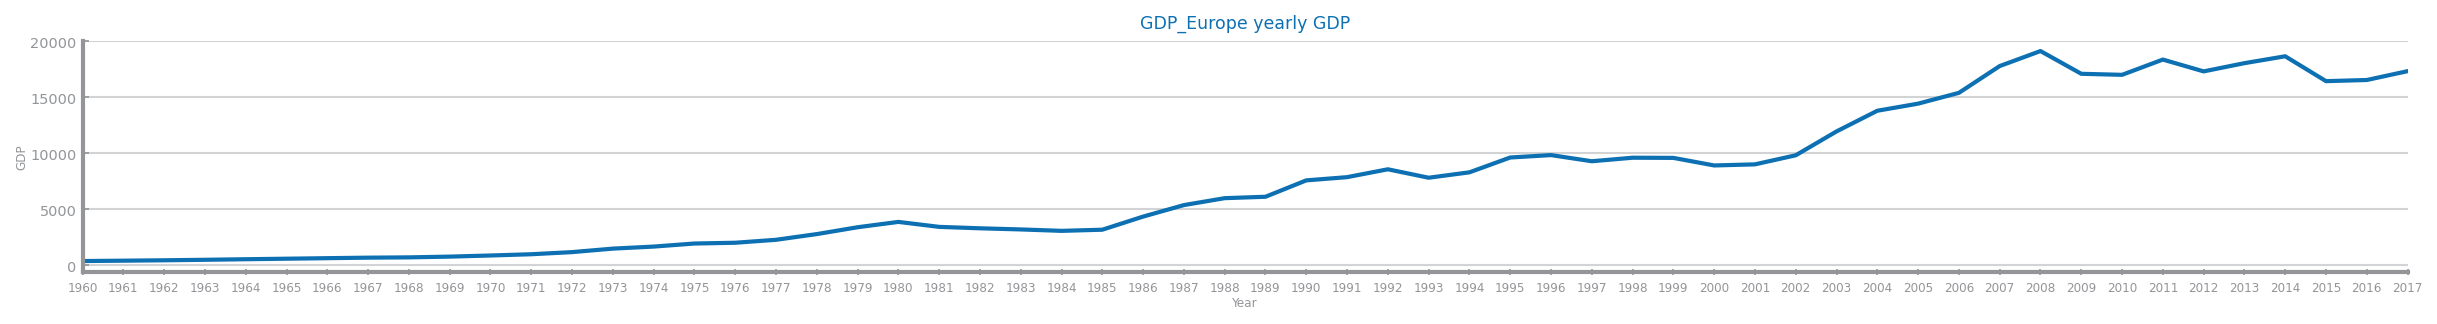

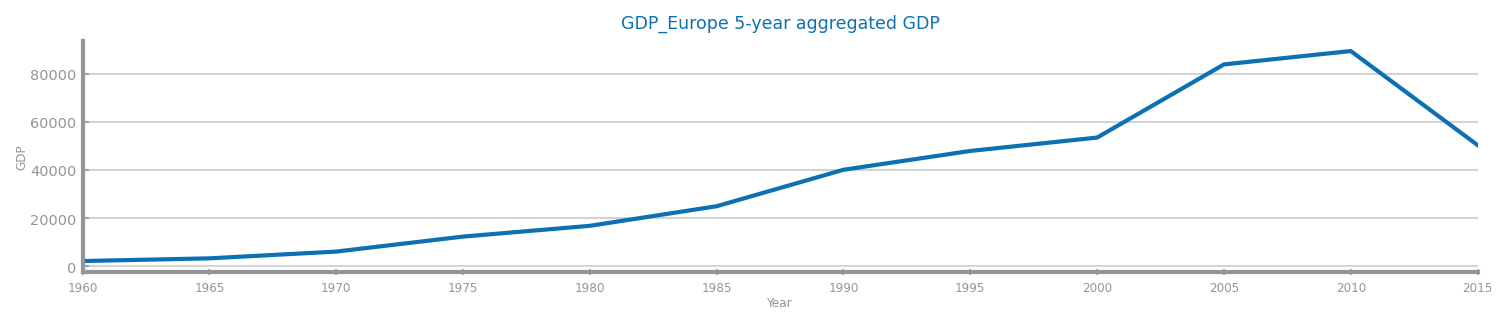

In [23]:
series: Series = data[target]
figure(figsize=(5 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} yearly {target}",
)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
# Using 5-year aggregation instead of daily
ss_agg: Series = series.groupby(series.index // 5 * 5).sum()
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag} 5-year aggregated {target}",
)
show()

In [24]:
data.columns

Index(['Birth_rate', 'CO2_emissions', 'Death_rate',
       'Electric_power_consumption', 'Energy_use', 'Food_exports',
       'Food_imports', 'Goods_services_exports', 'Goods_services_imports',
       'Population_density', 'GDP'],
      dtype='object')

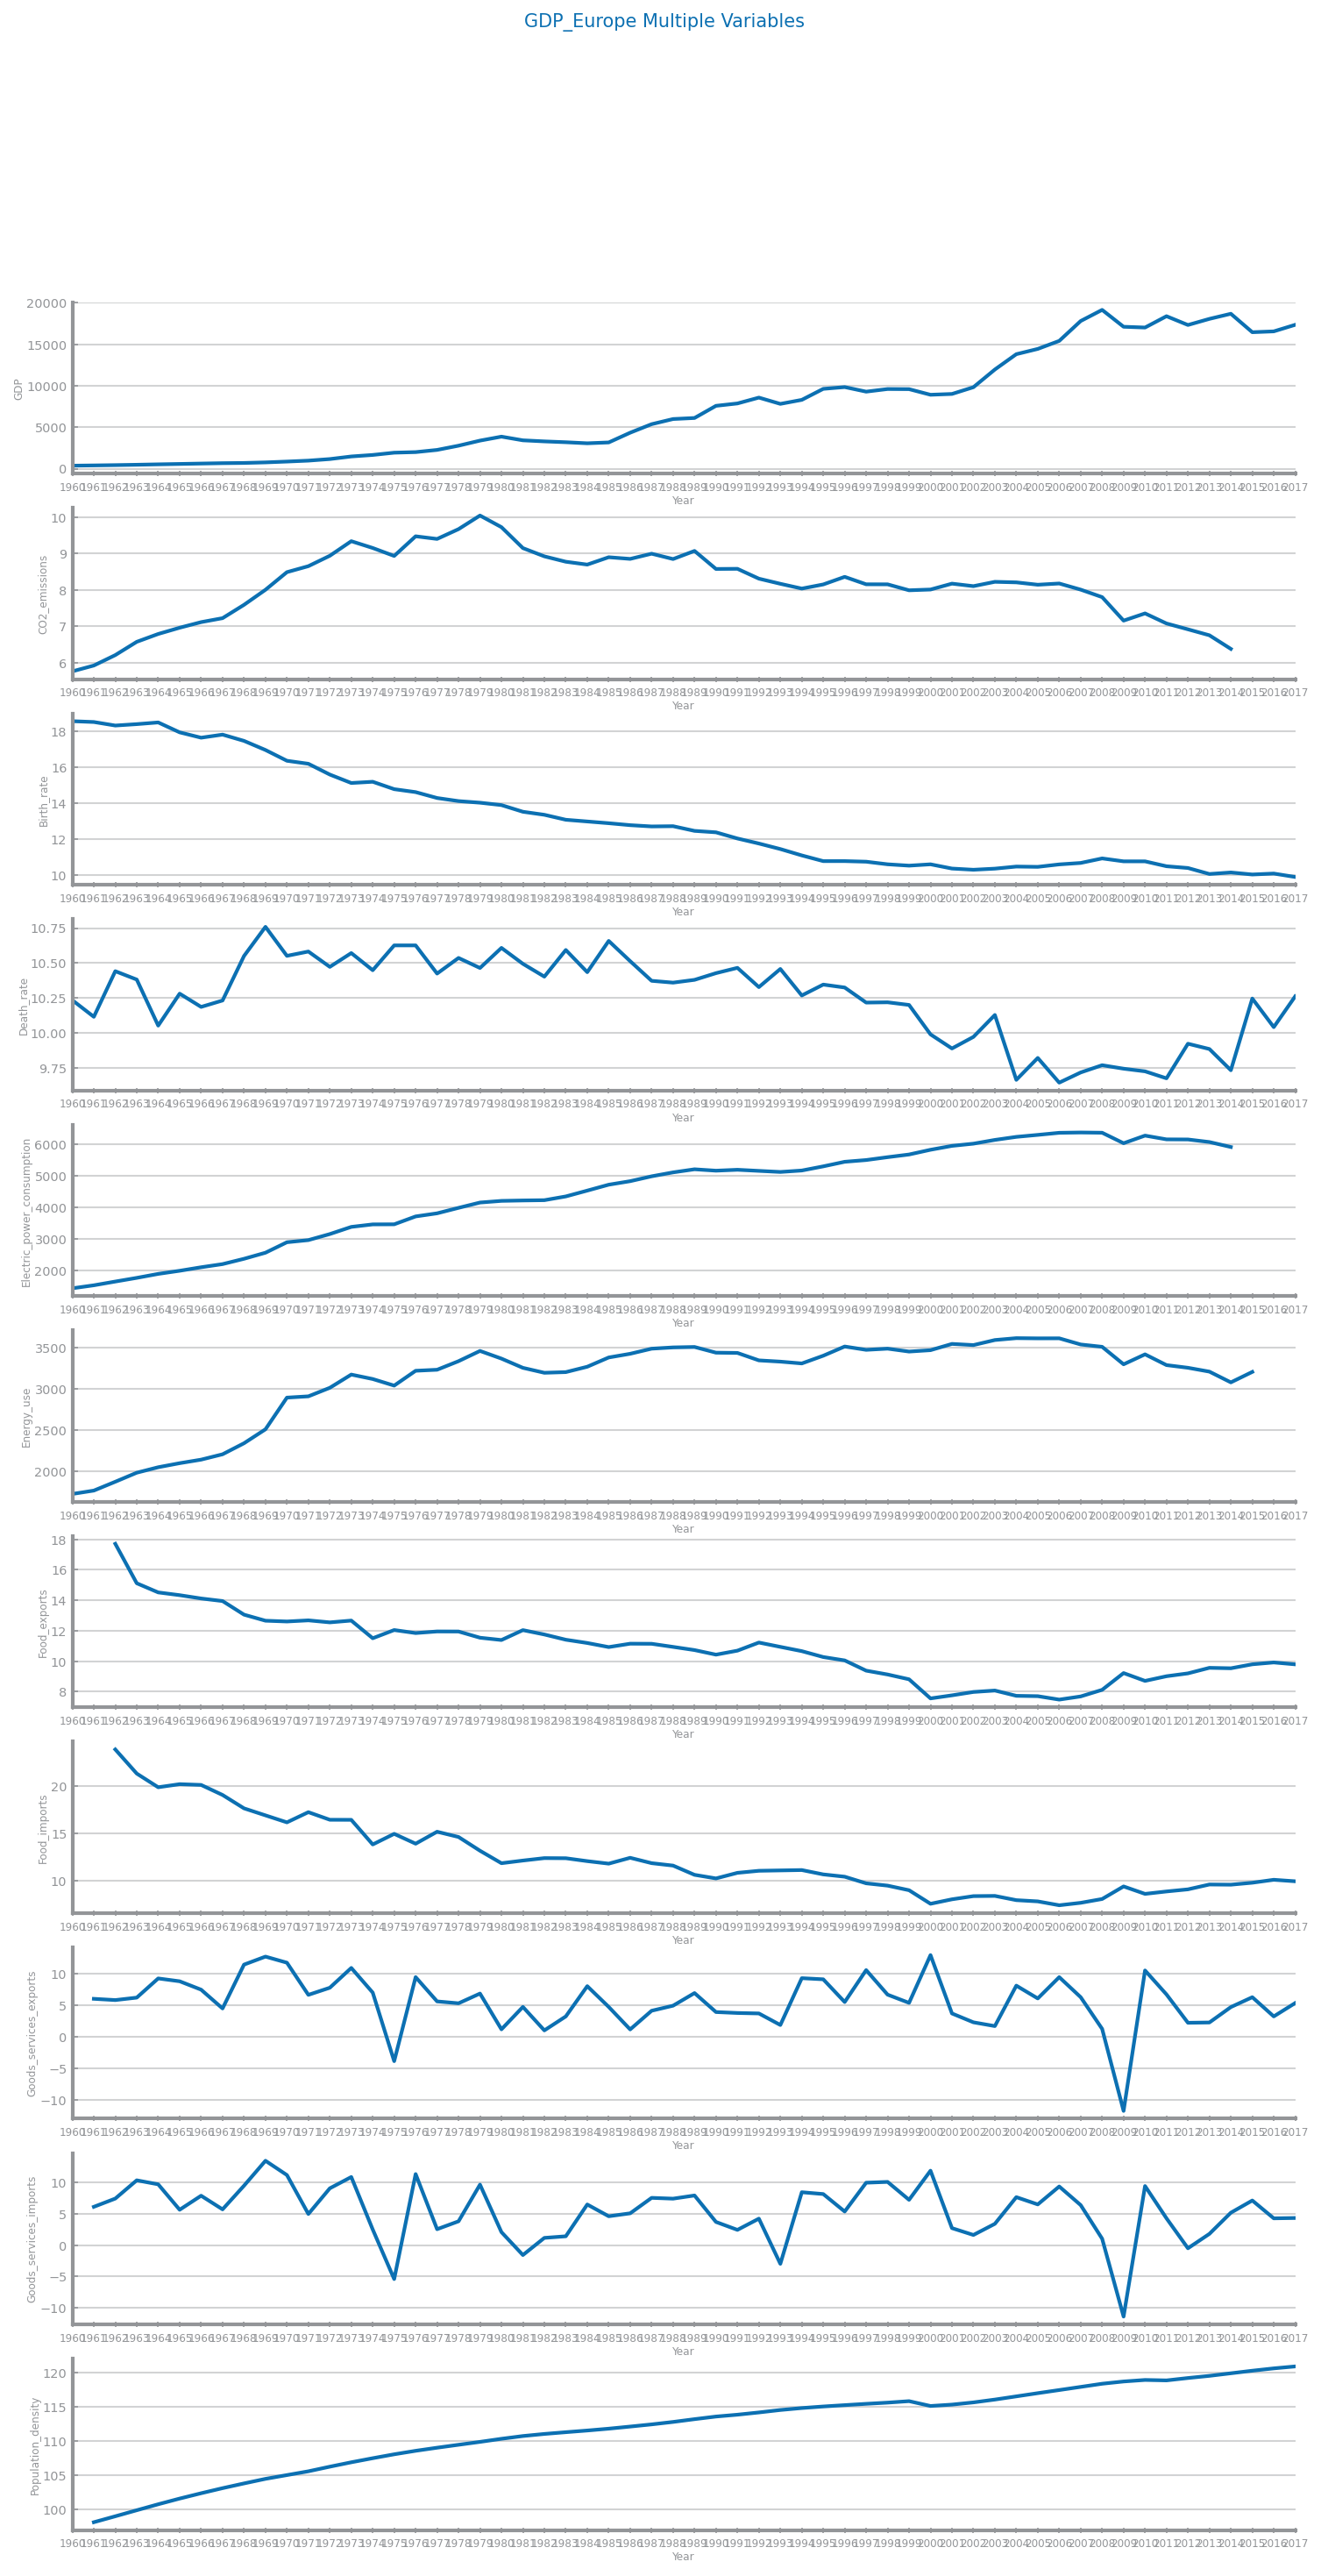

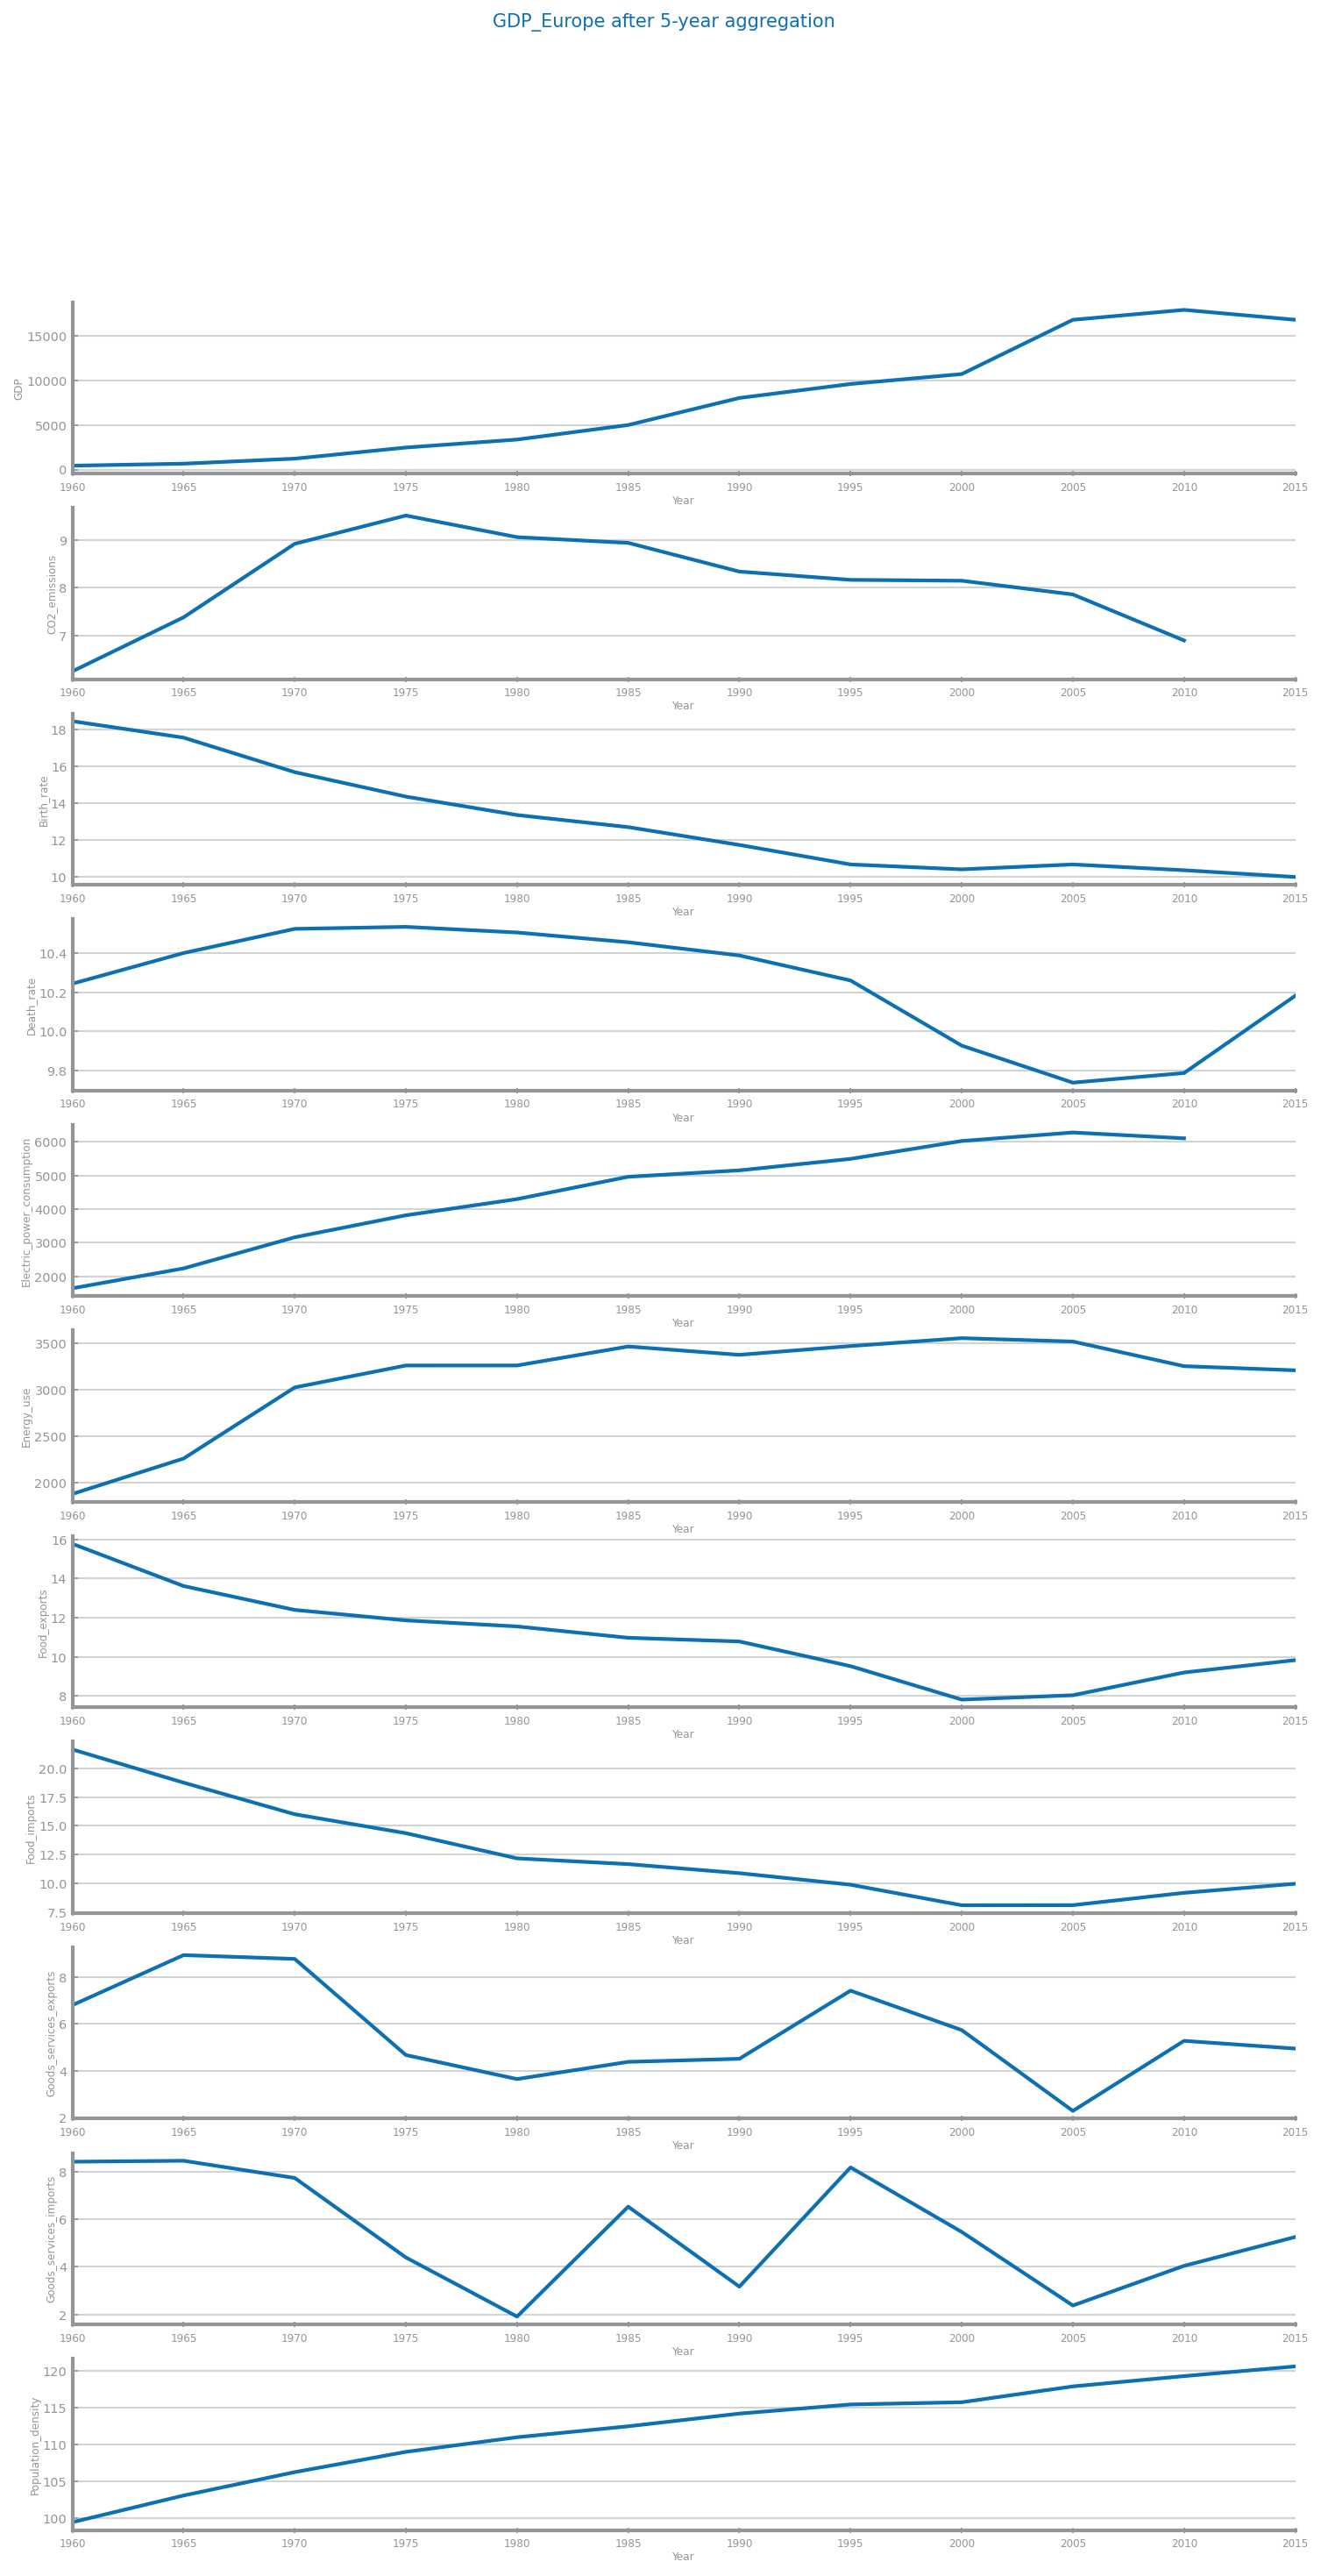

In [25]:
# For multivariate analysis
from dslabs_functions import plot_ts_multivariate_chart

# Select relevant variables for multivariate analysis
selected_columns = ['GDP', 'CO2_emissions', 'Birth_rate', 'Death_rate',
                    'Electric_power_consumption', 'Energy_use', 'Food_exports', 
                    'Food_imports', 'Goods_services_exports', 'Goods_services_imports','Population_density']
data_subset = data[selected_columns]

plot_ts_multivariate_chart(data_subset, title=f"{file_tag} Multiple Variables")

# Aggregate to 5-year periods
agg_df: DataFrame = data_subset.groupby(data_subset.index // 5 * 5).mean()

plot_ts_multivariate_chart(agg_df, title=f"{file_tag} after 5-year aggregation")
show()

Differentiation

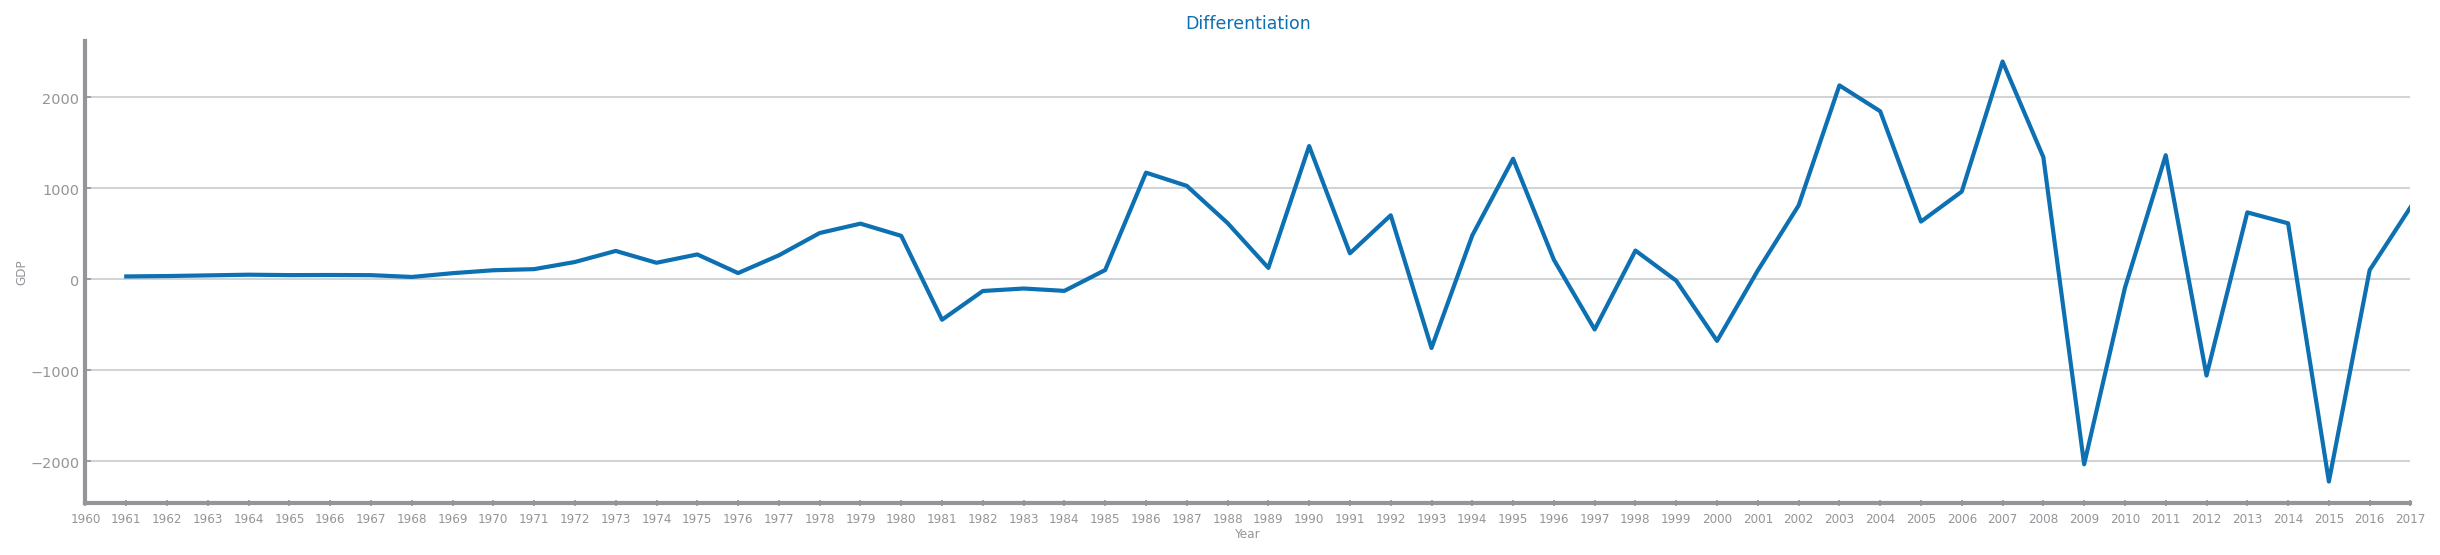

In [26]:
# Plot first difference of GDP
ss_diff: Series = series.diff()
figure(figsize=(5 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_diff.index.to_list(),
    ss_diff.to_list(),
    title="Differentiation",  
    xlabel=series.index.name,
    ylabel=target,
)
show()

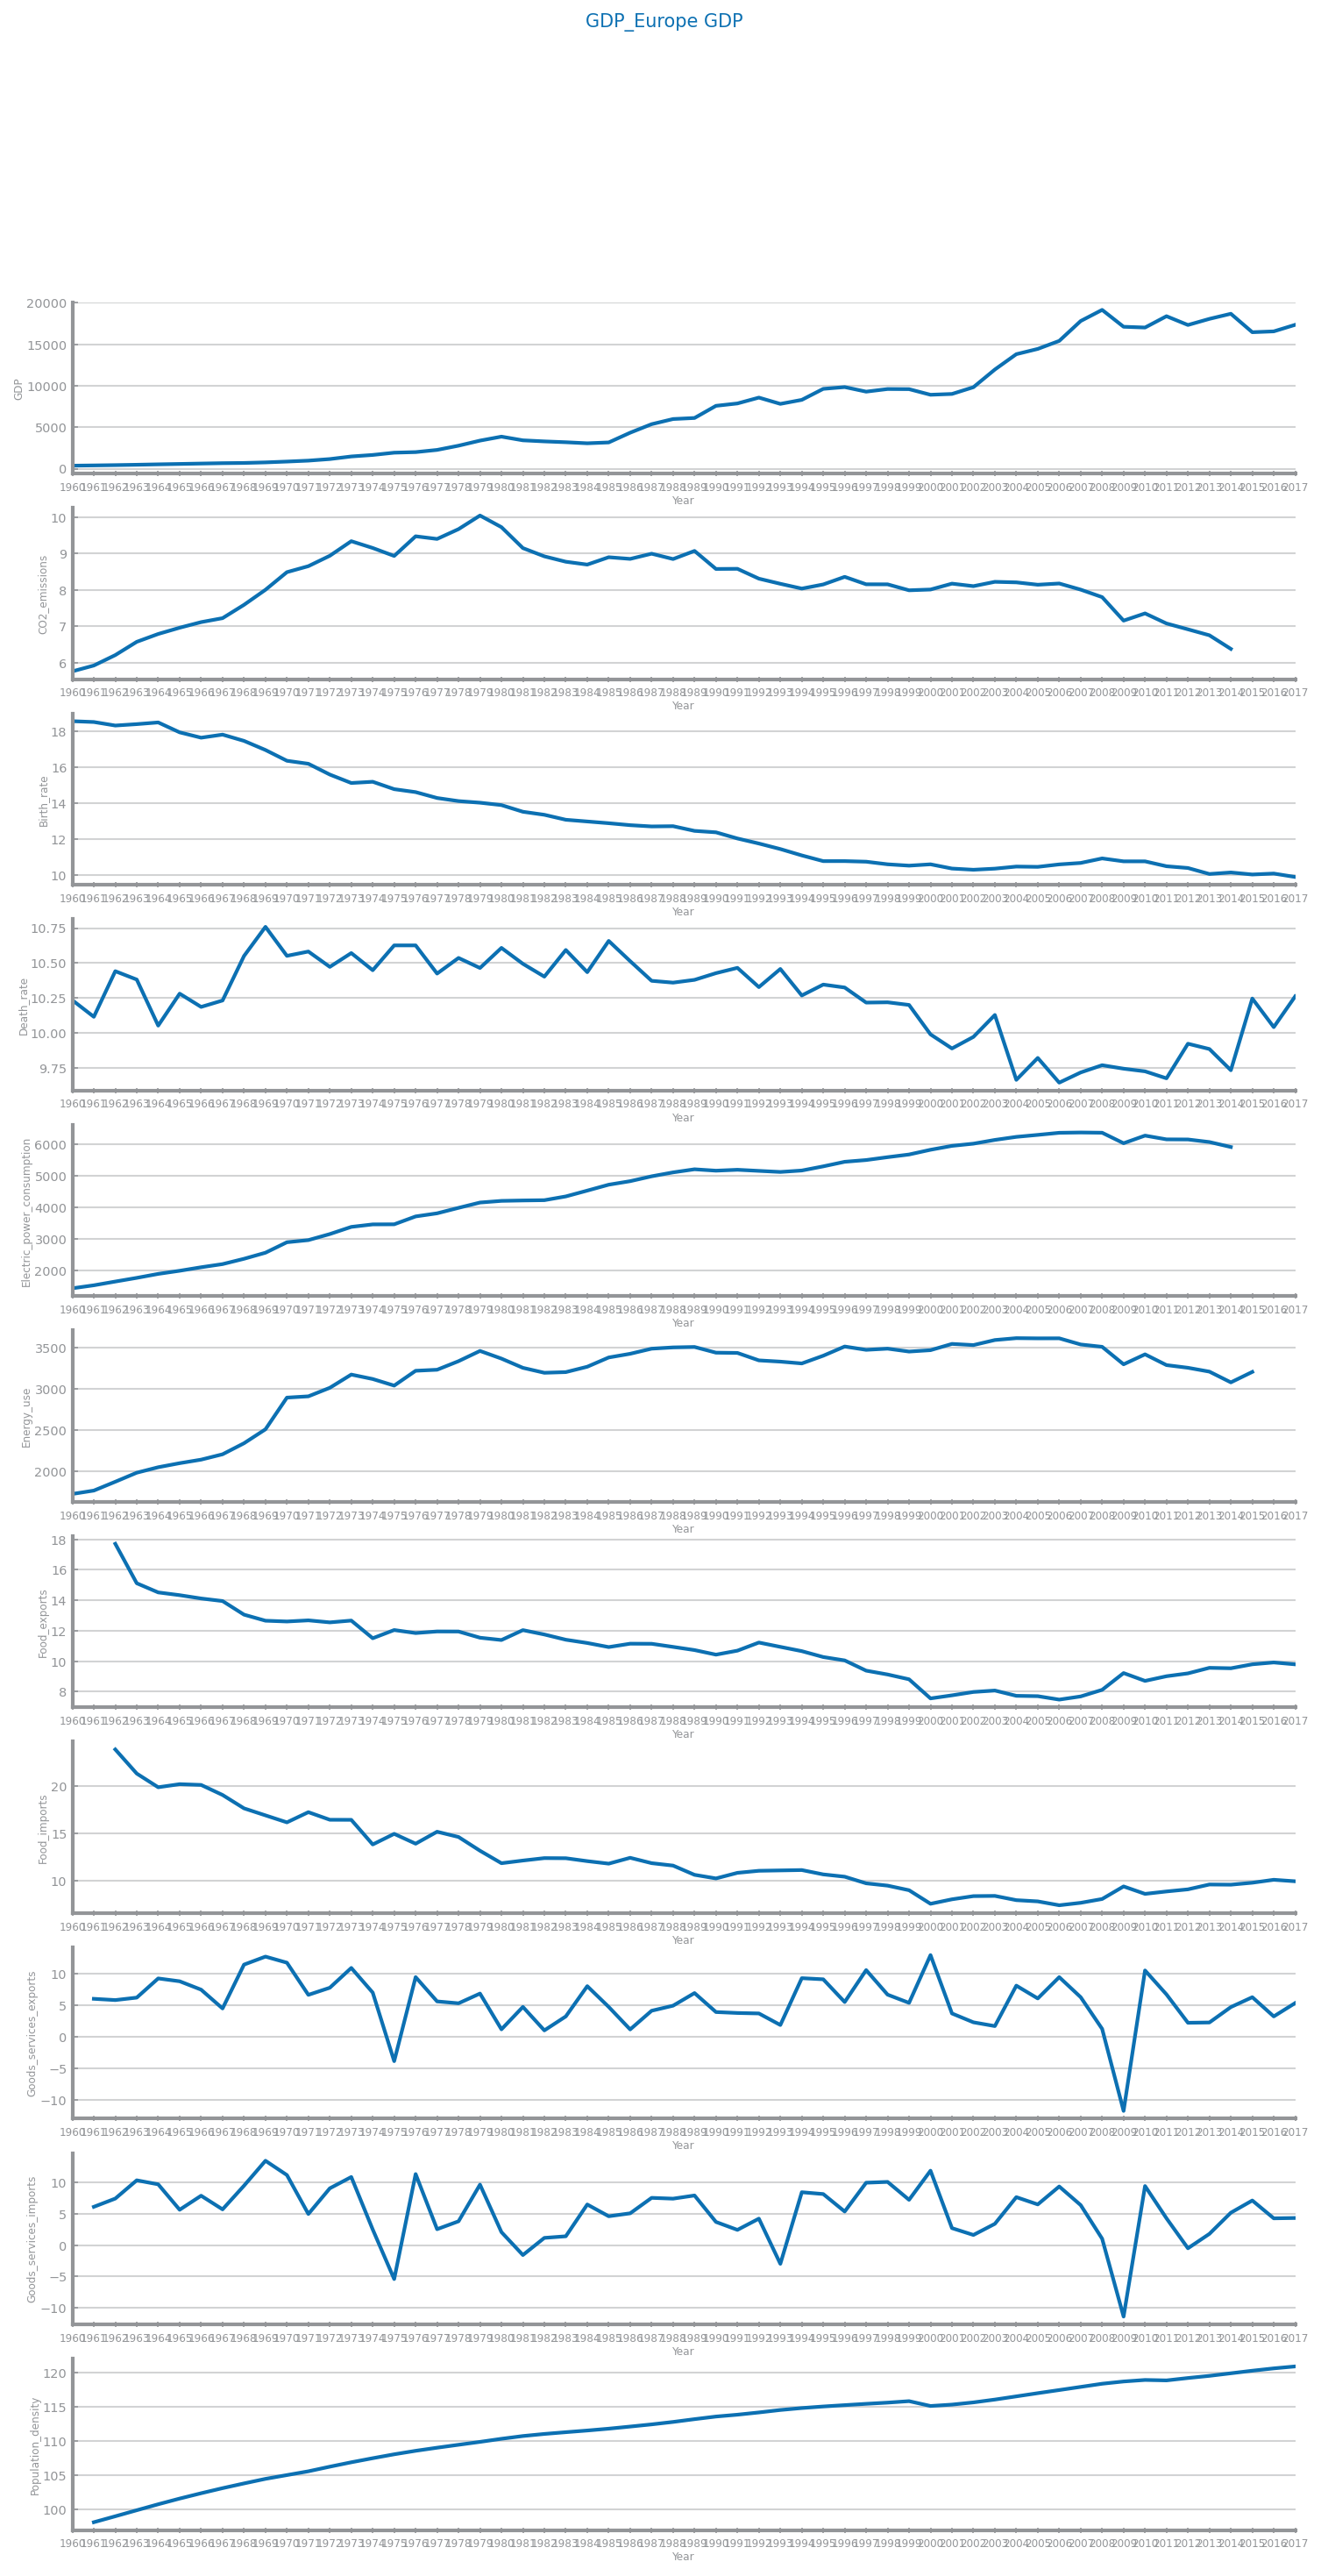

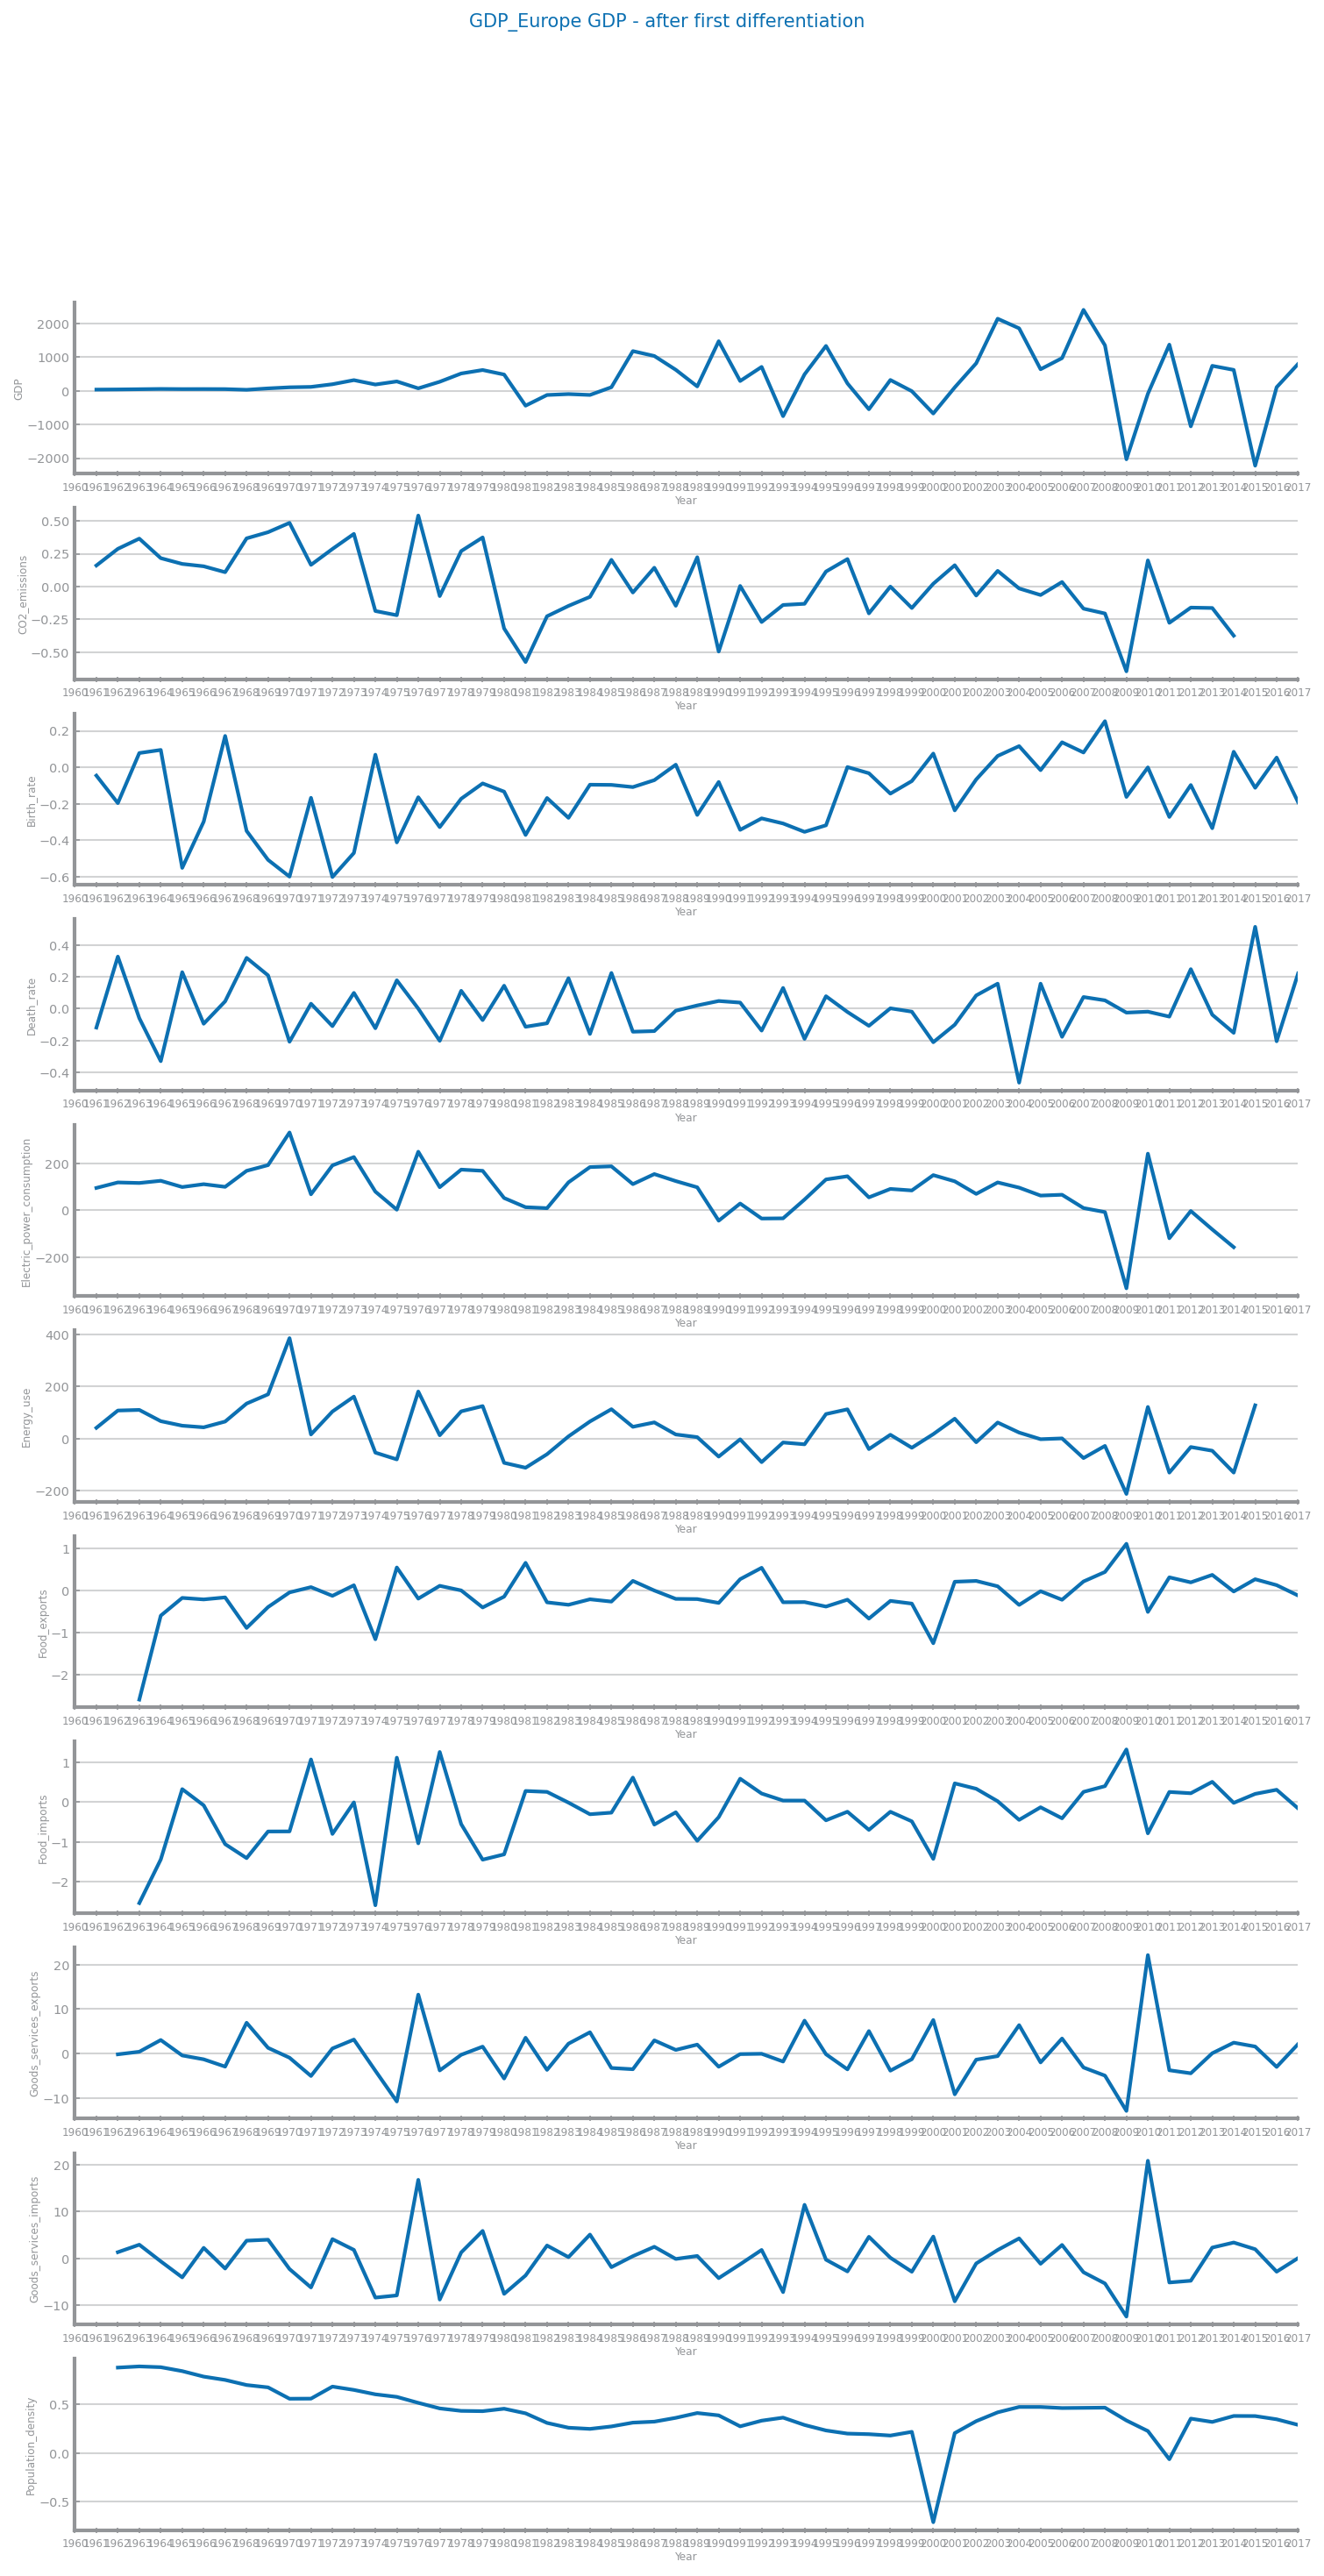

In [27]:
# For multivariate analysis
from dslabs_functions import plot_ts_multivariate_chart

selected_columns = ['GDP', 'CO2_emissions', 'Birth_rate', 'Death_rate',
                    'Electric_power_consumption', 'Energy_use', 'Food_exports', 
                    'Food_imports', 'Goods_services_exports', 'Goods_services_imports','Population_density']
data_subset = data[selected_columns]

plot_ts_multivariate_chart(data_subset, title=f"{file_tag} {target}")
show()

diff_df: DataFrame = data_subset.diff()
plot_ts_multivariate_chart(diff_df, title=f"{file_tag} {target} - after first differentiation")
show()

Forecasting
Training

In [28]:
from pandas import Series

def series_train_test_split(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()
    train: Series = df_cp.iloc[:trn_size]  # Removed :, as we're working with a Series not DataFrame
    test: Series = df_cp.iloc[trn_size:]
    return train, test

In [29]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
from dslabs_functions import PAST_COLOR, FUTURE_COLOR, PRED_PAST_COLOR, PRED_FUTURE_COLOR, HEIGHT

def plot_forecasting_series(
    trn: Series,
    tst: Series,
    prd_tst: Series,
    title: str = "",
    xlabel: str = "time",
    ylabel: str = "",
) -> list[Axes]:
    fig, ax = subplots(1, 1, figsize=(4 * HEIGHT, HEIGHT), squeeze=True)
    fig.suptitle(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(trn.index, trn.values, label="train", color=PAST_COLOR)
    ax.plot(tst.index, tst.values, label="test", color=FUTURE_COLOR)
    ax.plot(prd_tst.index, prd_tst.values, "--", label="test prediction", color=PRED_FUTURE_COLOR)
    ax.legend(prop={"size": 5})
    return ax

In [30]:
from math import sqrt
from dslabs_functions import plot_multibar_chart, FORECAST_MEASURES

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    return axs

In [31]:
from sklearn.base import RegressorMixin


class SimpleAvgRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean: float = 0.0
        return

    def fit(self, X: Series):
        self.mean = X.mean()
        return

    def predict(self, X: Series) -> Series:
        prd: list = len(X) * [self.mean]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

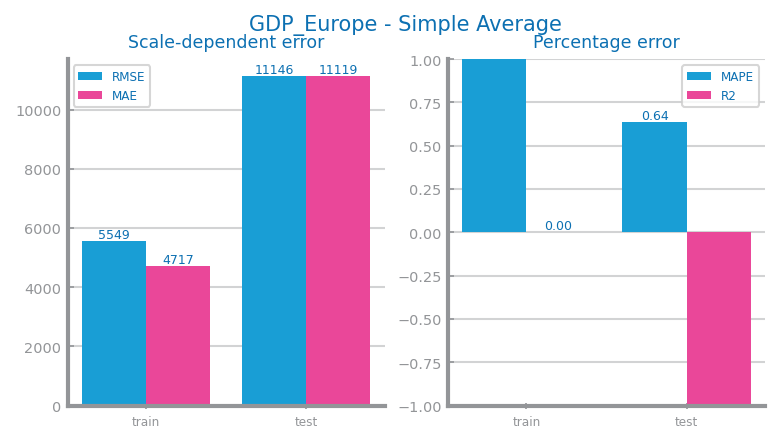

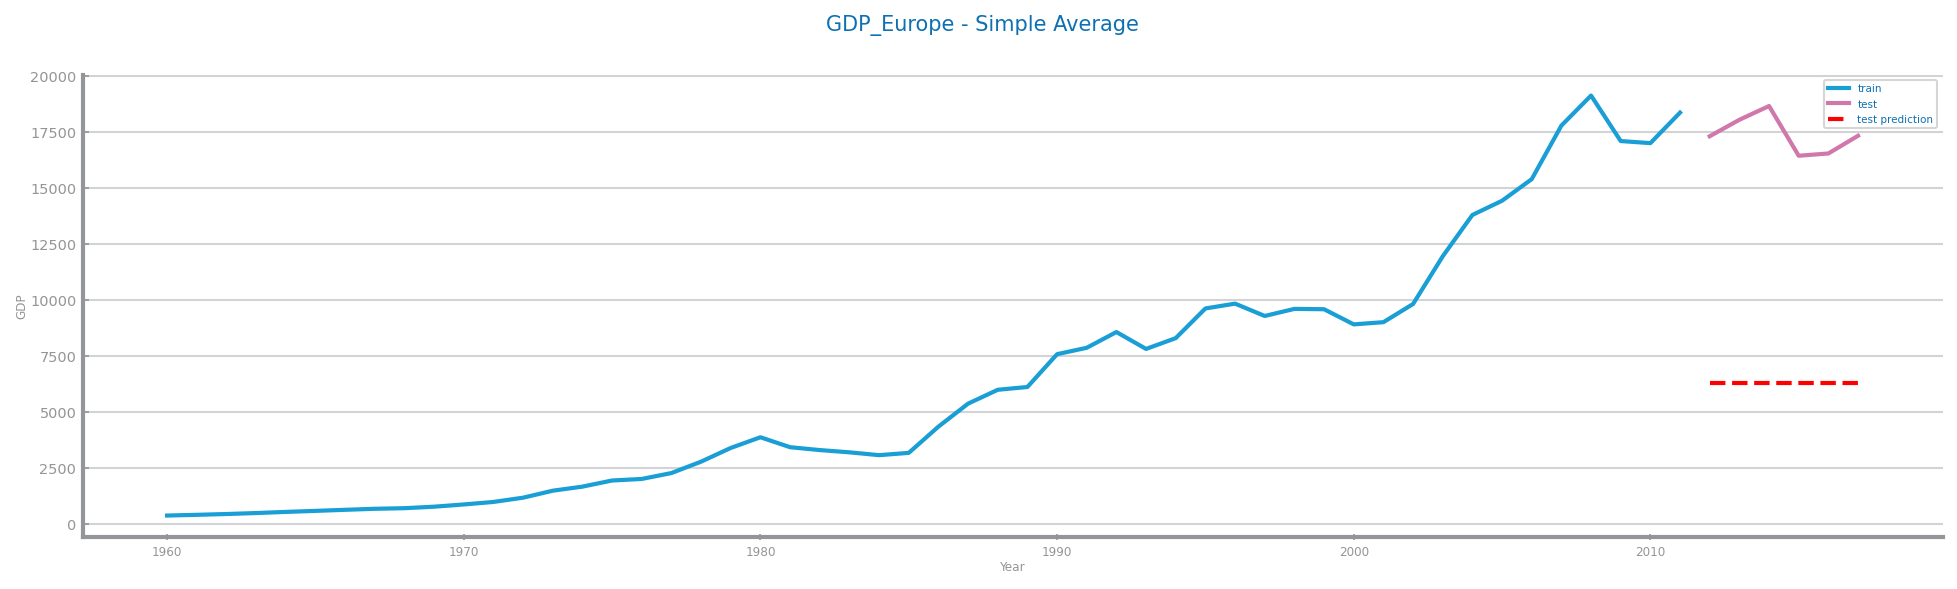

In [48]:
# Get train and test sets
train, test = series_train_test_split(series, trn_pct=0.90)

# Create and fit the model
fr_mod = SimpleAvgRegressor()
fr_mod.fit(train)

# Make predictions
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

# Plot evaluation metrics
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Simple Average")
#savefig(f"images/{file_tag}_simpleAvg_eval.png")
savefig(f"{save_path}/{file_tag}_simpleAvg_eval.png")

# Plot forecasting results
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Simple Average",
    xlabel=index,    # Changed from timecol to index
    ylabel=target,
)
#savefig(f"images/{file_tag}_simpleAvg_forecast.png")
#savefig(f"{save_path}/{file_tag}_simpleAvg_forecast.png")
savefig(f"{save_path}/{file_tag}_simpleAvg_forecast.png")


=== Evaluating Yearly granularity ===
Training set size: 46
Test set size: 12
Model coefficient: 1.0456
Model intercept: 103.0753


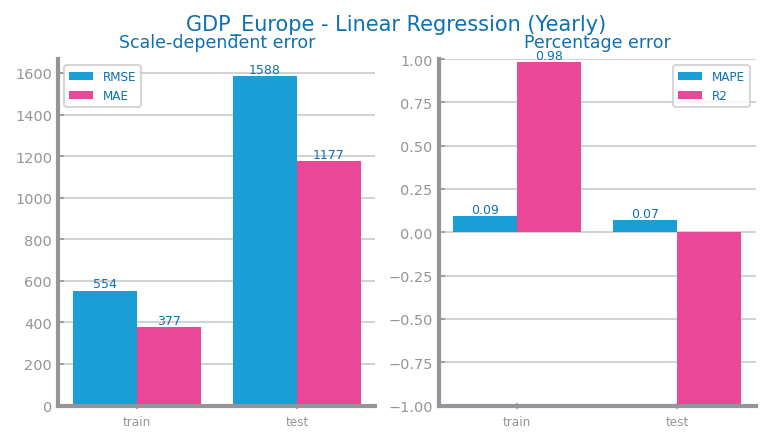

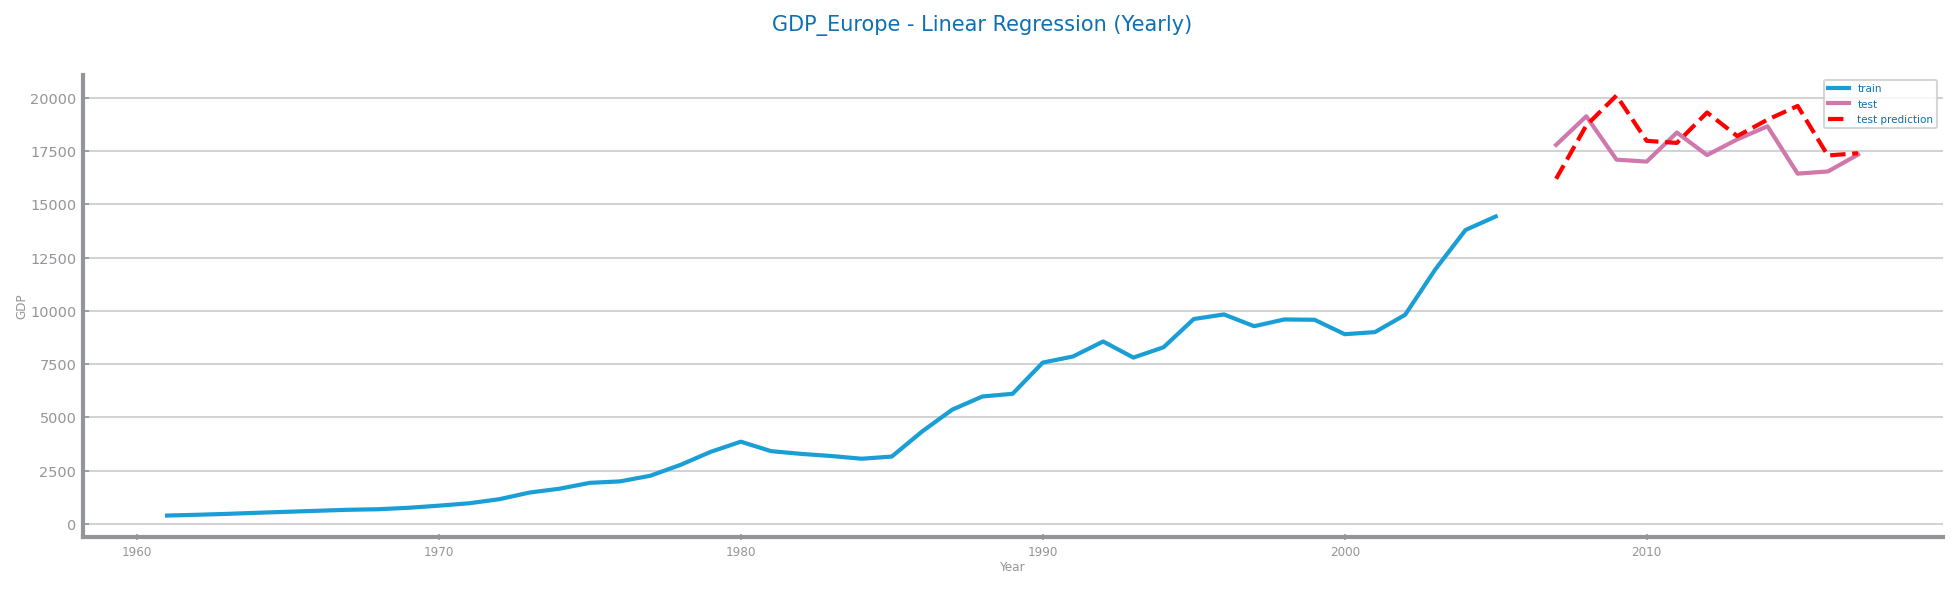


=== Evaluating 5-Year granularity ===
Training set size: 9
Test set size: 3
Model coefficient: 1.1038
Model intercept: 883.7736


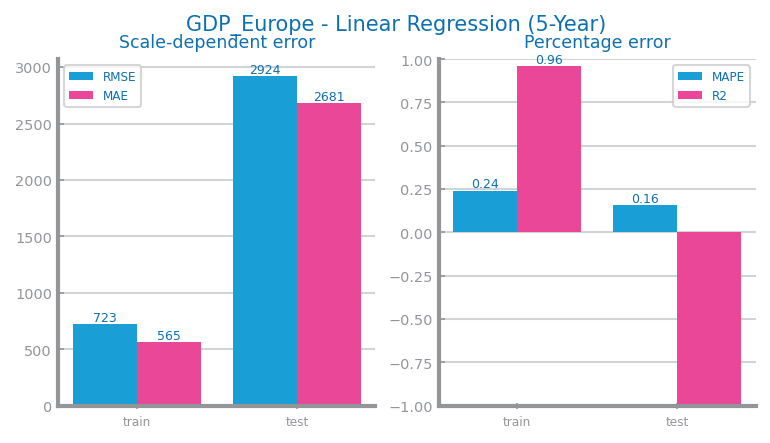

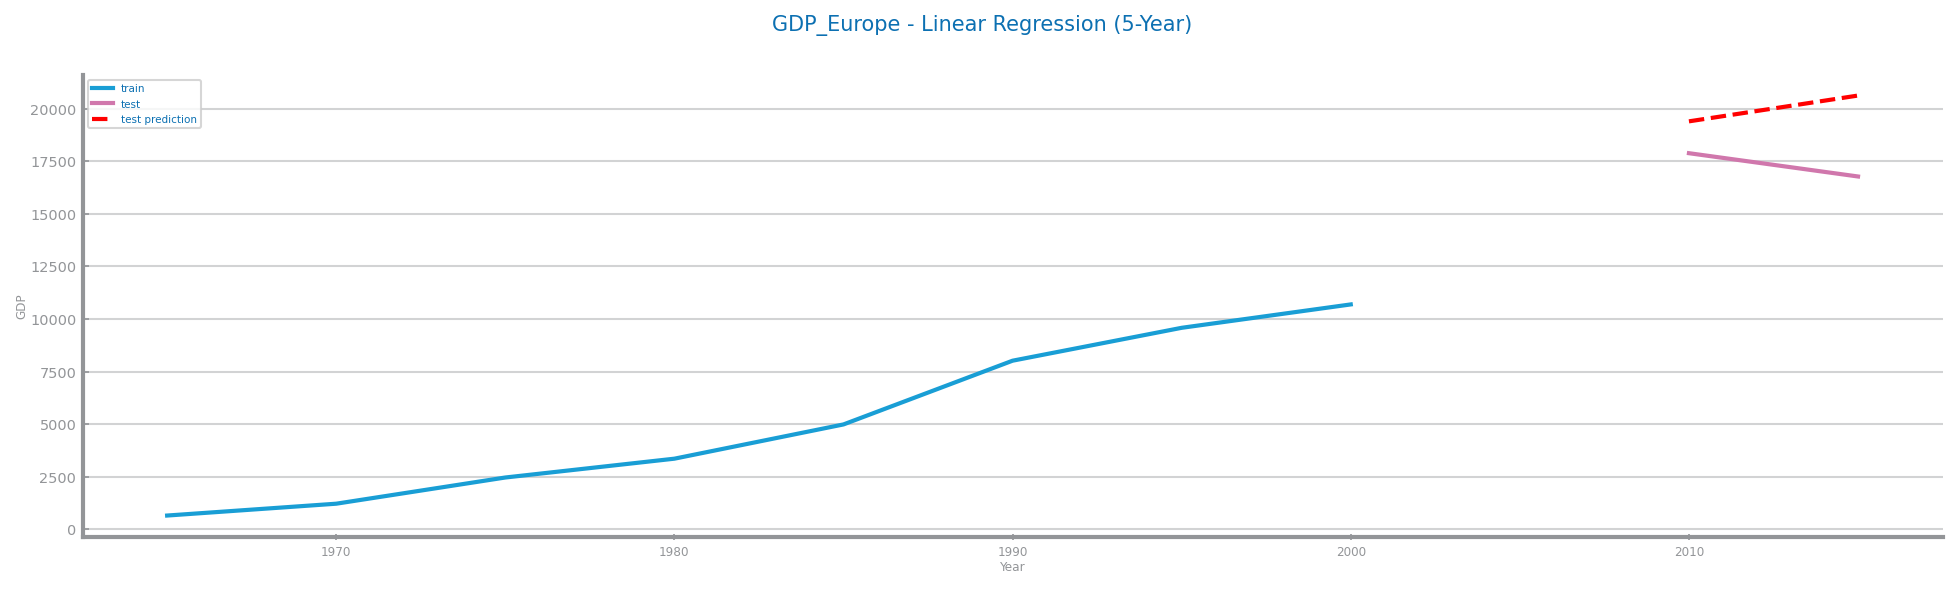

In [33]:
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import numpy as np

def prepare_data_for_lr(series: Series, lookback: int = 1):
    values = series.values
    X, y = [], []
    for i in range(lookback, len(values)):
        X.append(values[i-lookback:i])
        y.append(values[i])
    return np.array(X), np.array(y)

# Create different granularities
yearly_data = series
five_year_data = series.groupby(series.index // 5 * 5).mean()

# Let's only use yearly and 5-year granularities since 10-year gives too little data
granularities = [('Yearly', yearly_data), ('5-Year', five_year_data)]

# For each granularity
for gran_name, data in granularities:
    print(f"\n=== Evaluating {gran_name} granularity ===")
    
    # Use a smaller train percentage for more test data
    train, test = series_train_test_split(data, trn_pct=0.80)  # Changed from 0.90 to 0.80
    print(f"Training set size: {len(train)}")
    print(f"Test set size: {len(test)}")
    
    # Only proceed if we have enough data
    if len(train) <= 2 or len(test) <= 2:
        print(f"Not enough data for {gran_name} granularity")
        continue
        
    # Prepare data for linear regression
    X_train, y_train = prepare_data_for_lr(train, lookback=1)
    X_test, y_test = prepare_data_for_lr(test, lookback=1)
    
    # Reshape for sklearn
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    
    # Train model and print details
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    print(f"Model coefficient: {lr_model.coef_[0]:.4f}")
    print(f"Model intercept: {lr_model.intercept_:.4f}")
    
    # Make predictions
    prd_trn = Series(lr_model.predict(X_train), index=train.index[1:])
    prd_tst = Series(lr_model.predict(X_test), index=test.index[1:])
    
    # Plot evaluation and forecasting
    plot_forecasting_eval(
        train[1:], 
        test[1:], 
        prd_trn, 
        prd_tst, 
        title=f"{file_tag} - Linear Regression ({gran_name})"
    )
    
    plot_forecasting_series(
        train[1:],
        test[1:],
        prd_tst,
        title=f"{file_tag} - Linear Regression ({gran_name})",
        xlabel=index,
        ylabel=target,
    )
    show()


=== Evaluating Yearly granularity ===
Training set size: 46
Test set size: 12
Model coefficient: 1.0456
Model intercept: 103.0753


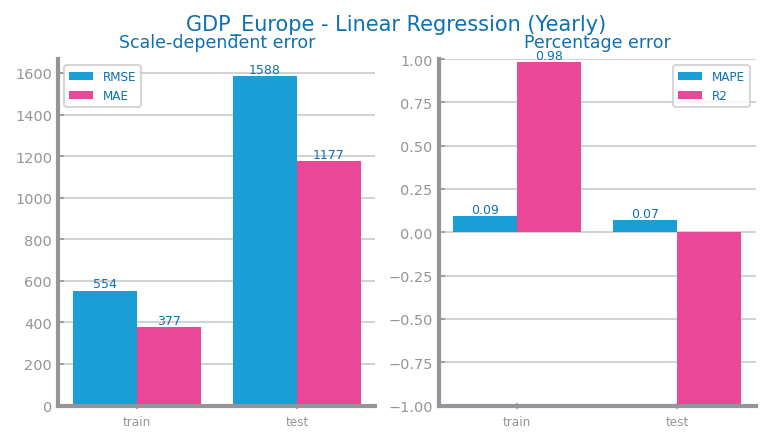

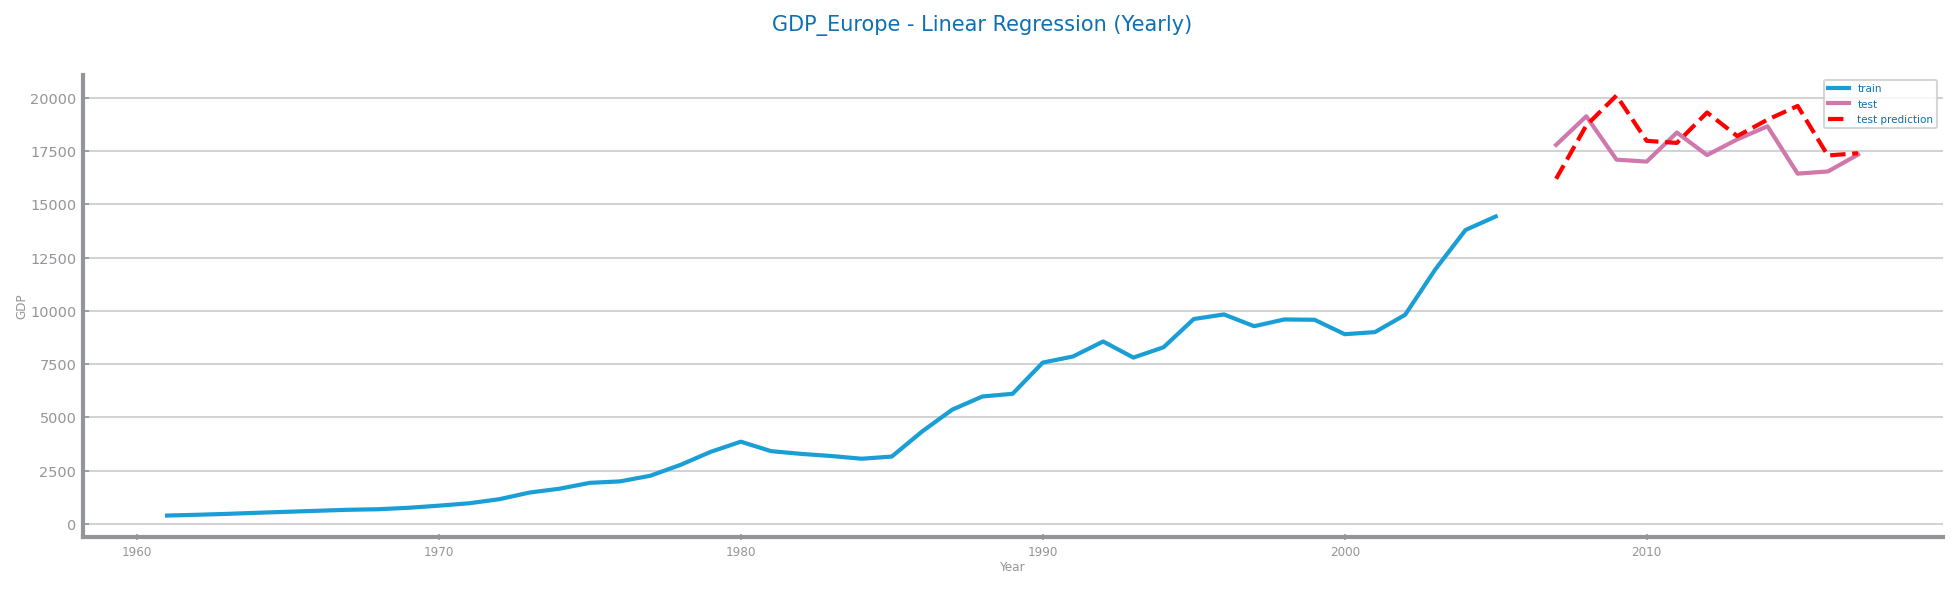


=== Evaluating 5-Year granularity ===
Training set size: 9
Test set size: 3
Model coefficient: 1.1038
Model intercept: 883.7736


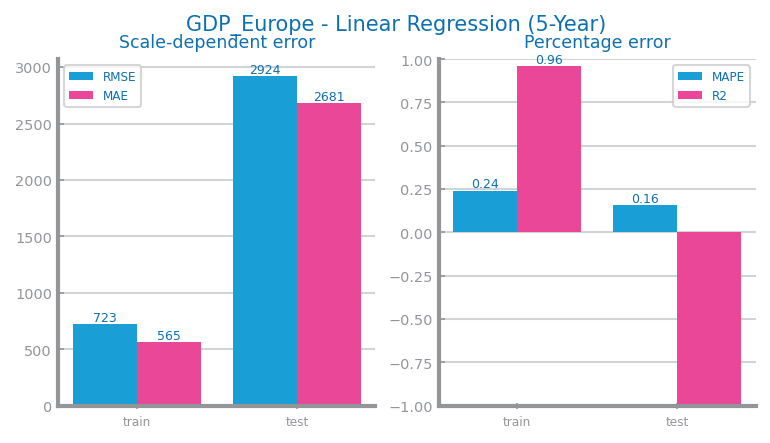

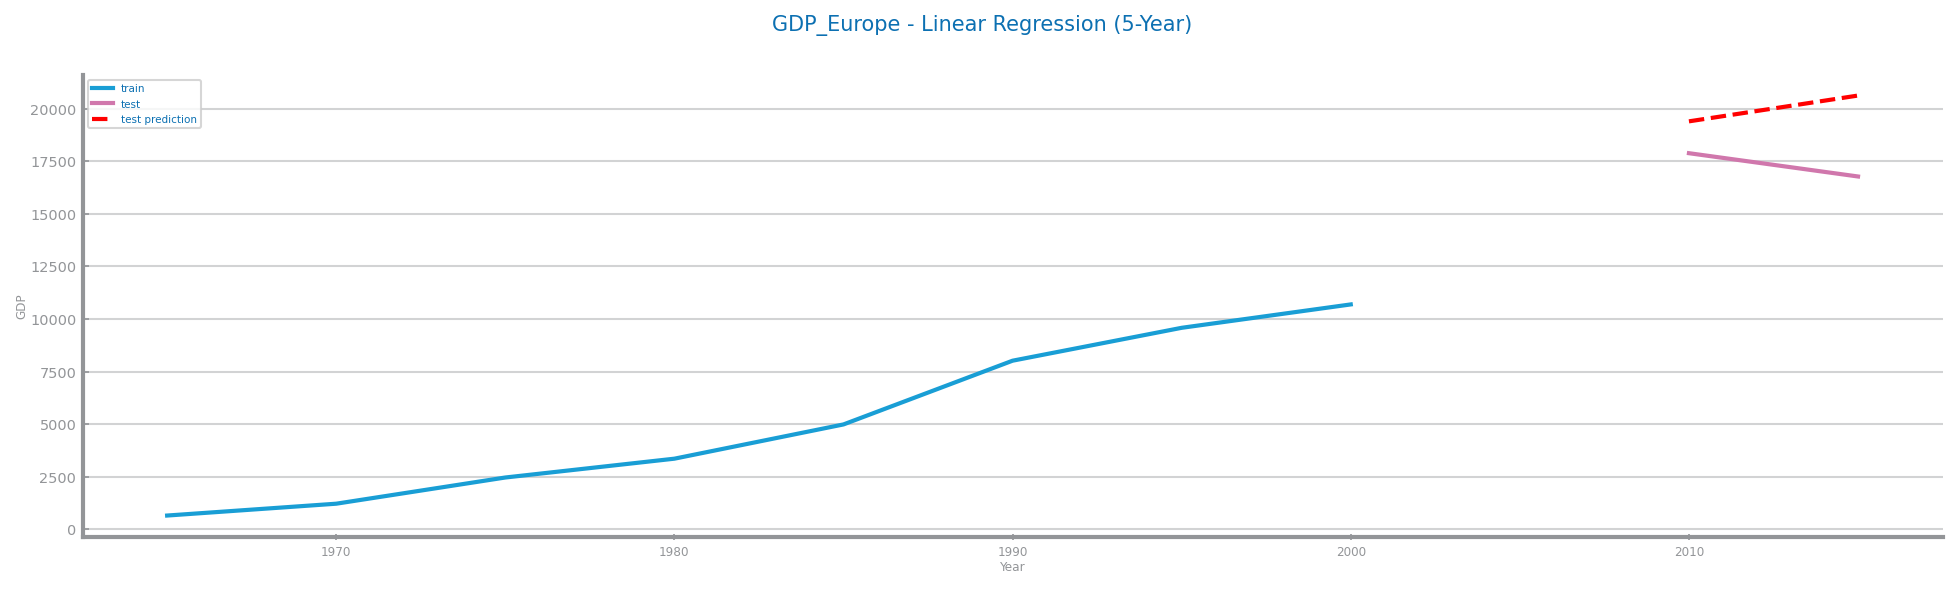

In [34]:
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import numpy as np

def prepare_data_for_lr(series: Series, lookback: int = 1):
    values = series.values
    X, y = [], []
    for i in range(lookback, len(values)):
        X.append(values[i-lookback:i])
        y.append(values[i])
    return np.array(X), np.array(y)

# Create different granularities
yearly_data = series
five_year_data = series.groupby(series.index // 5 * 5).mean()

# Let's only use yearly and 5-year granularities since 10-year gives too little data
granularities = [('Yearly', yearly_data), ('5-Year', five_year_data)]

# For each granularity
for gran_name, data in granularities:
    print(f"\n=== Evaluating {gran_name} granularity ===")
    
    # Use a smaller train percentage for more test data
    train, test = series_train_test_split(data, trn_pct=0.80)  # Changed from 0.90 to 0.80
    print(f"Training set size: {len(train)}")
    print(f"Test set size: {len(test)}")
    
    # Only proceed if we have enough data
    if len(train) <= 2 or len(test) <= 2:
        print(f"Not enough data for {gran_name} granularity")
        continue
        
    # Prepare data for linear regression
    X_train, y_train = prepare_data_for_lr(train, lookback=1)
    X_test, y_test = prepare_data_for_lr(test, lookback=1)
    
    # Reshape for sklearn
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    
    # Train model and print details
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    print(f"Model coefficient: {lr_model.coef_[0]:.4f}")
    print(f"Model intercept: {lr_model.intercept_:.4f}")
    
    # Make predictions
    prd_trn = Series(lr_model.predict(X_train), index=train.index[1:])
    prd_tst = Series(lr_model.predict(X_test), index=test.index[1:])
    
    # Plot evaluation and forecasting
    plot_forecasting_eval(
        train[1:], 
        test[1:], 
        prd_trn, 
        prd_tst, 
        title=f"{file_tag} - Linear Regression ({gran_name})"
    )
    
    plot_forecasting_series(
        train[1:],
        test[1:],
        prd_tst,
        title=f"{file_tag} - Linear Regression ({gran_name})",
        xlabel=index,
        ylabel=target,
    )
    show()

Forecasting
Persistence Model

In [49]:
from pandas import Series
from sklearn.base import RegressorMixin

class PersistenceOptimistRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last: float = 0.0
        return

    def fit(self, X: Series):
        self.last = X.iloc[-1]
        # print(self.last)
        return

    def predict(self, X: Series):
        prd: list = X.shift().values.ravel()
        prd[0] = self.last
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

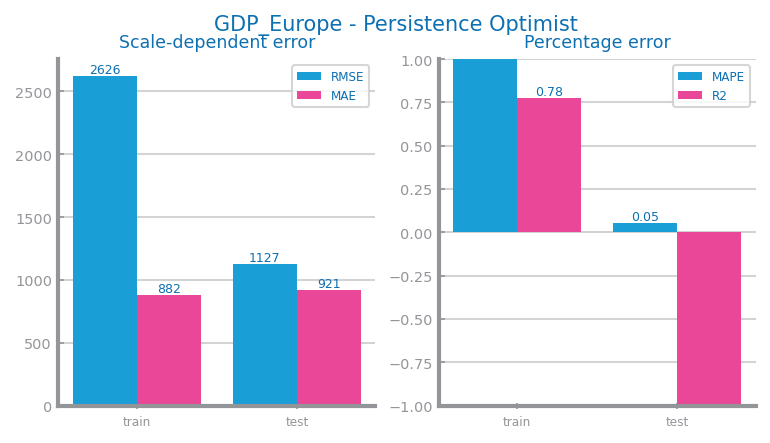

In [50]:
#train, test = series_train_test_split(series, trn_pct=0.90)  # Changed from data to series
train = series[:int(len(series) * 0.90)]
test = series[int(len(series) * 0.90):]

fr_mod = PersistenceOptimistRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Persistence Optimist")
#savefig(f"images/{file_tag}_persistence_optim_eval.png")
savefig(f"{save_path}/{file_tag}_persistence_optim_eval.png")

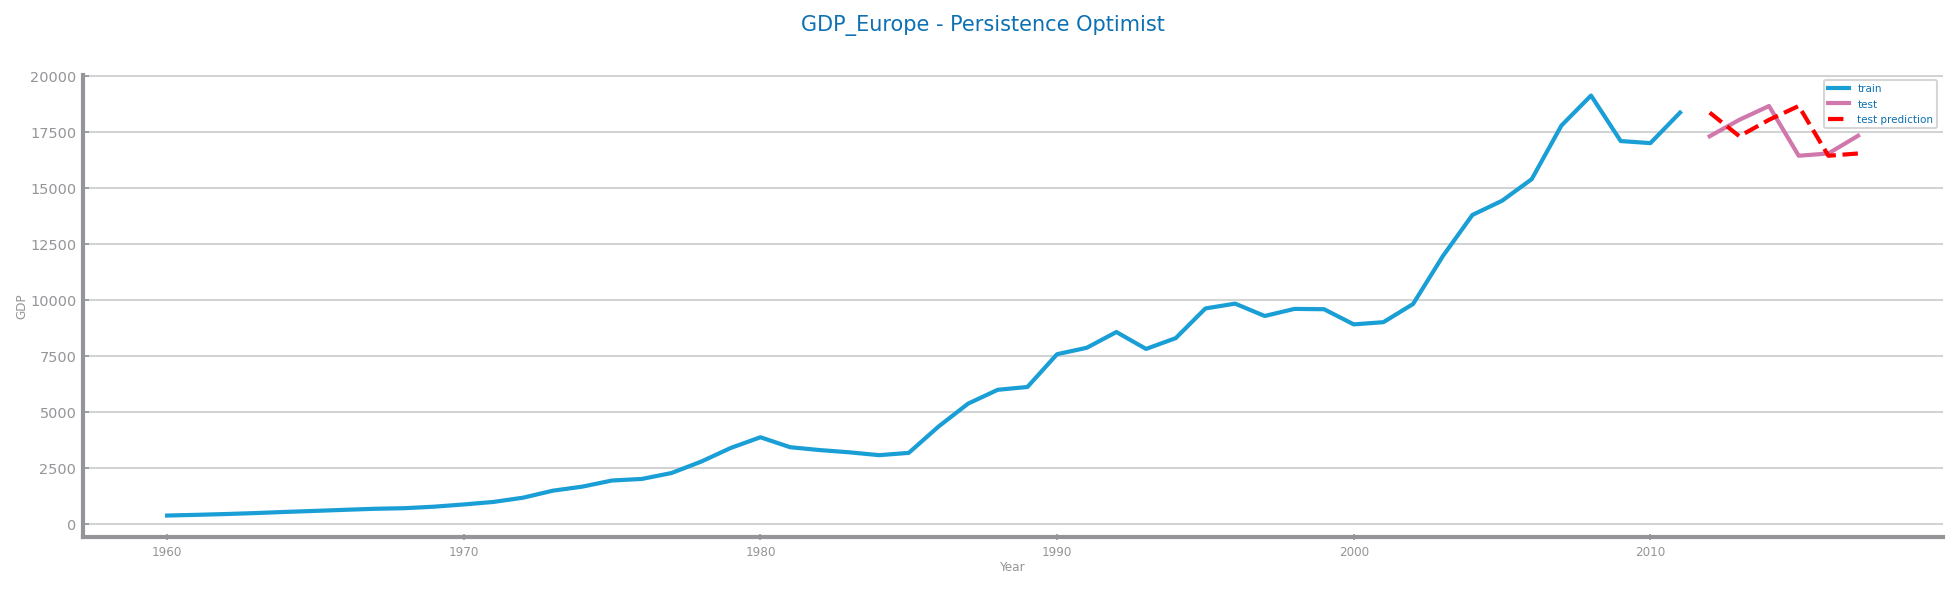

In [53]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Persistence Optimist",
    xlabel=index,    # Changed from timecol to index
    ylabel=target,
)
#savefig(f"images/{file_tag}_persistence_optim_forecast.png")
savefig(f"{save_path}/{file_tag}_persistence_optim_forecast.png")

In [54]:
class PersistenceRealistRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last = 0
        self.estimations = [0]
        self.obs_len = 0

    def fit(self, X: Series):
        for i in range(1, len(X)):
            self.estimations.append(X.iloc[i - 1])
        self.obs_len = len(self.estimations)
        self.last = X.iloc[len(X) - 1]
        prd_series: Series = Series(self.estimations)
        prd_series.index = X.index
        return prd_series

    def predict(self, X: Series):
        prd: list = len(X) * [self.last]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series


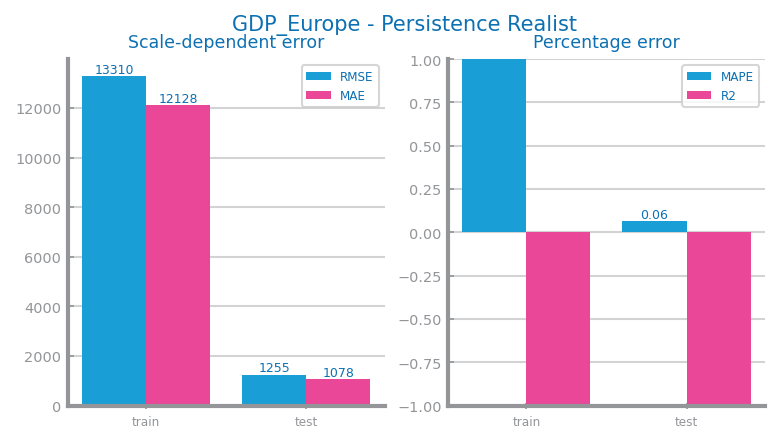

In [56]:
fr_mod = PersistenceRealistRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Persistence Realist")
#savefig(f"images/{file_tag}_persistence_real_eval.png")
savefig(f"{save_path}/{file_tag}_persistence_real_eval.png")

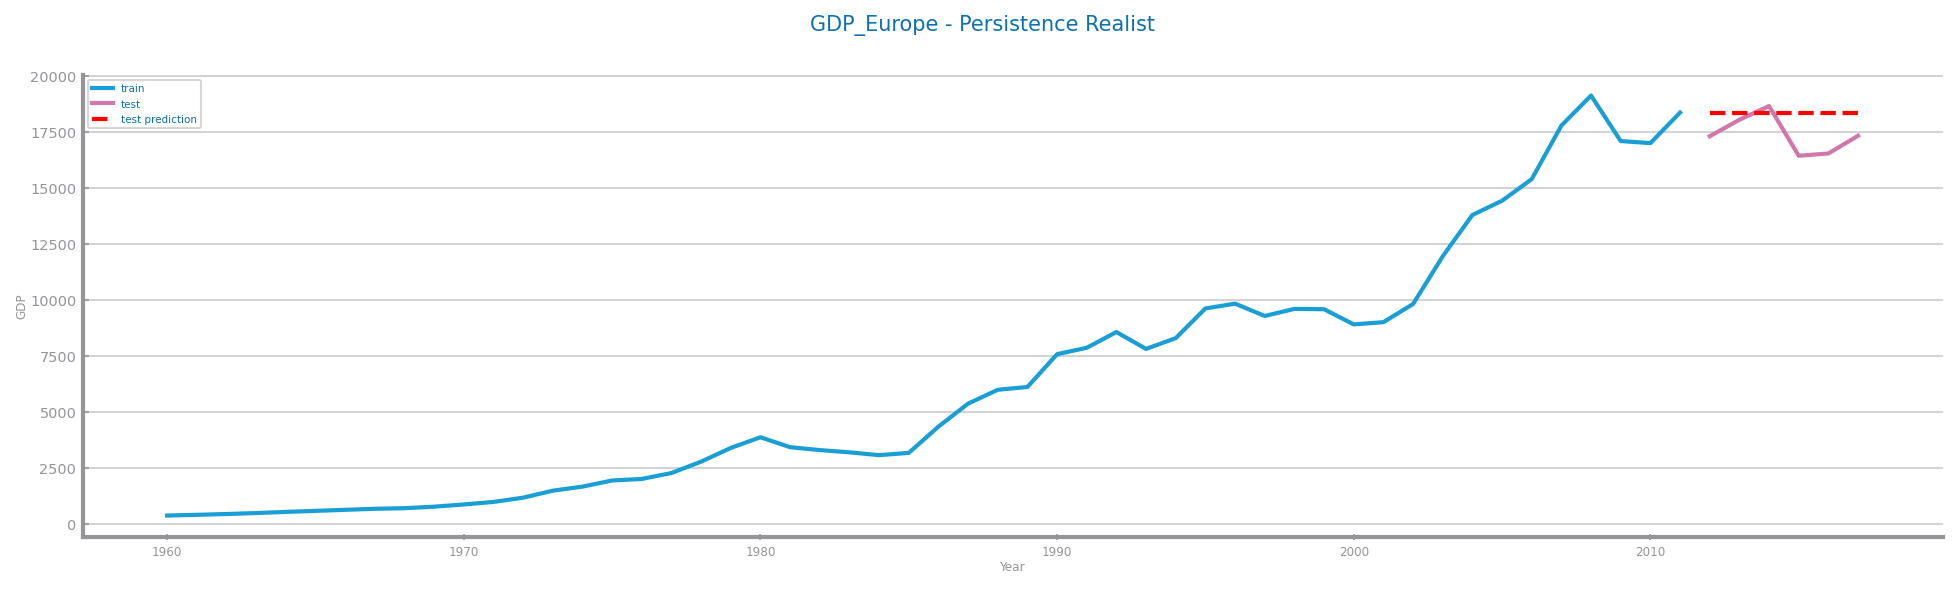

In [58]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Persistence Realist",
    xlabel=index,
    ylabel=target,
)
#savefig(f"images/{file_tag}_persistence_real_forecast.png")
savefig(f"{save_path}/{file_tag}_persistence_real_forecast.png")

Forecasting
Exponential Smoothing

In [62]:
import pandas as pd
from pandas import read_csv, DataFrame, Series, date_range
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from dslabs_functions import series_train_test_split, HEIGHT

filename: str = "data/forecast_gdp_europe.csv"
file_tag: str = "GDP_Europe"
target: str = "GDP"
index: str = "Year"
measure: str = "R2"

# First read data without setting index
data: DataFrame = read_csv(filename, sep=",", decimal=".")
# Convert Year to datetime index
data.index = pd.date_range(start=str(data[index].min()), periods=len(data), freq='Y')
series: Series = data[target]

#train, test = series_train_test_split(series, trn_pct=0.90)



In [63]:
train = series[:int(len(series) * 0.90)]
test = series[int(len(series) * 0.90):]

Exponential Smoothing best with alpha=0.40 -> R2=-0.0384


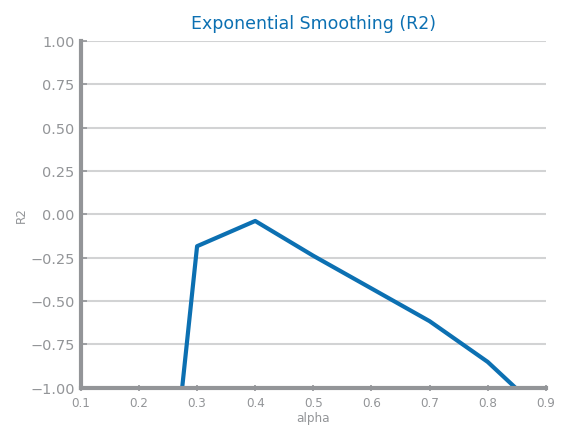

In [65]:


from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_line_chart

def exponential_smoothing_study(train: Series, test: Series, measure: str = "R2"):
    alpha_values = [i / 10 for i in range(1, 10)]
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "Exponential Smoothing", "metric": measure, "params": ()}
    best_performance: float = -100000

    yvalues = []
    for alpha in alpha_values:
        tool = SimpleExpSmoothing(train)
        model = tool.fit(smoothing_level=alpha, optimized=False)
        prd_tst = model.forecast(steps=len(test))

        eval: float = FORECAST_MEASURES[measure](test, prd_tst)
        if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
            best_performance = eval
            best_params["params"] = (alpha,)
            best_model = model
        yvalues.append(eval)

    print(f"Exponential Smoothing best with alpha={best_params['params'][0]:.2f} -> {measure}={best_performance:.4f}")
    plot_line_chart(
        alpha_values,
        yvalues,
        title=f"Exponential Smoothing ({measure})",
        xlabel="alpha",
        ylabel=measure,
        percentage=flag,
    )

    return best_model, best_params

from matplotlib.pyplot import savefig

best_model, best_params = exponential_smoothing_study(train, test, measure=measure)
#savefig(f"images/{file_tag}_exponential_smoothing_{measure}_study.png")
savefig(f"{save_path}/{file_tag}_exponential_smoothing_{measure}_study.png")

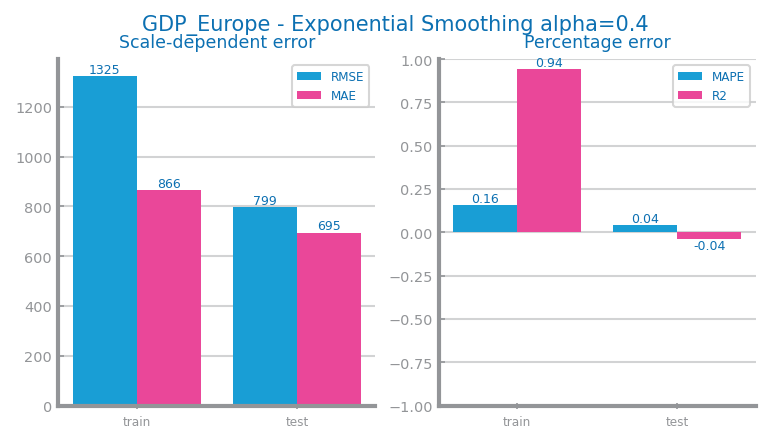

In [67]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Exponential Smoothing alpha={params[0]}")
#savefig(f"images/{file_tag}_exponential_smoothing_{measure}_eval.png")
savefig(f"{save_path}/{file_tag}_exponential_smoothing_{measure}_eval.png")

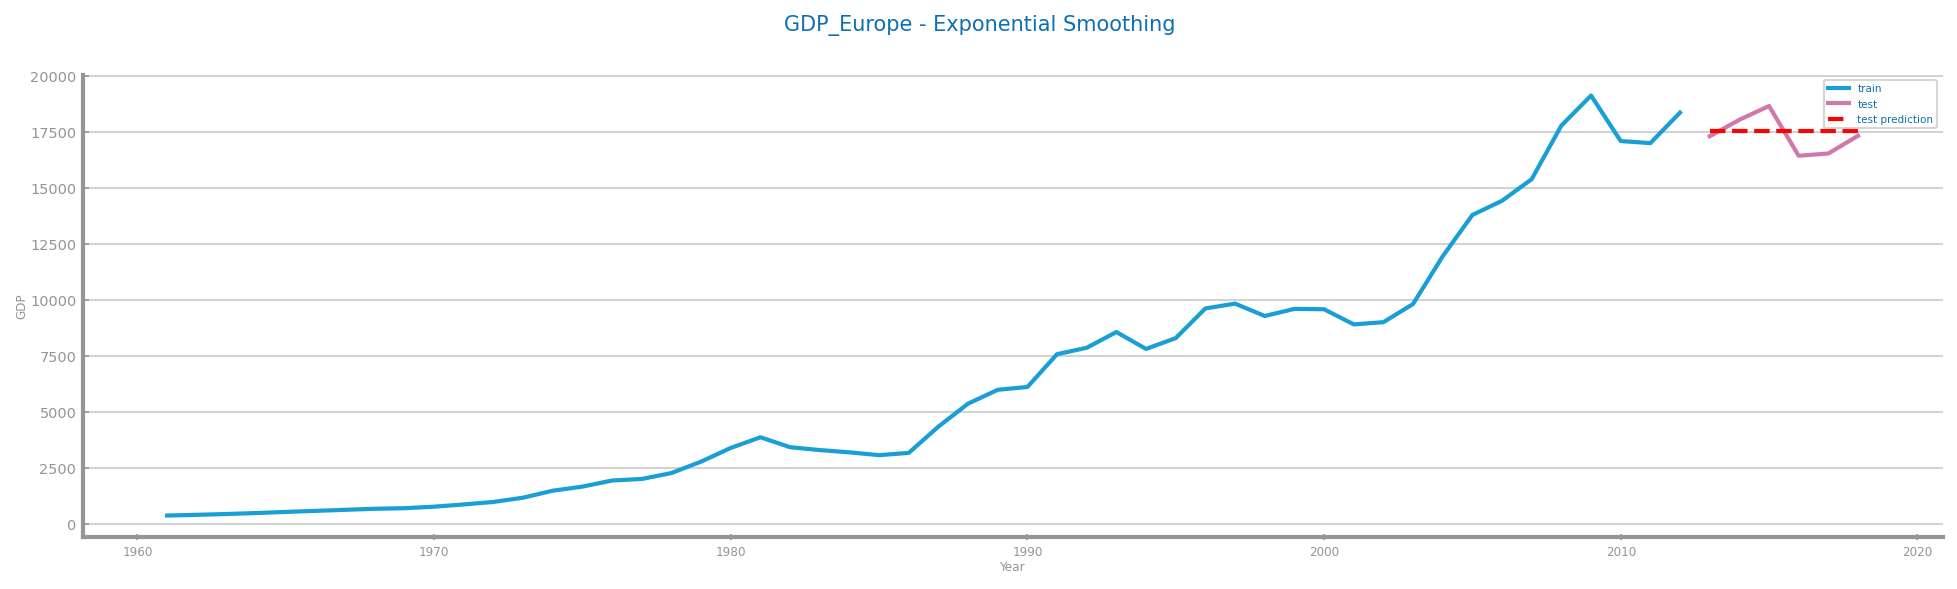

In [69]:
from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Exponential Smoothing ",
    xlabel=index,
    ylabel=target,
)
#savefig(f"images/{file_tag}_exponential_smoothing_{measure}_forecast.png")
savefig(f"{save_path}/{file_tag}_exponential_smoothing_{measure}_forecast.png")

Forecasting
Rolling Mean

In [70]:
from numpy import mean
from pandas import Series
from sklearn.base import RegressorMixin


class RollingMeanRegressor(RegressorMixin):
    def __init__(self, win: int = 3):
        super().__init__()
        self.win_size = win
        self.memory: list = []

    def fit(self, X: Series):
        self.memory = X.iloc[-self.win_size :]
        # print(self.memory)
        return

    def predict(self, X: Series):
        estimations = self.memory.tolist()
        for i in range(len(X)):
            new_value = mean(estimations[len(estimations) - self.win_size - i :])
            estimations.append(new_value)
        prd_series: Series = Series(estimations[self.win_size :])
        prd_series.index = X.index
        return prd_series

In [71]:
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_line_chart

def rolling_mean_study(train: Series, test: Series, measure: str = "R2"):
    # Modified window sizes for yearly data
    win_size = (2, 3, 4, 5, 7, 10, 15)  # Changed to smaller windows appropriate for yearly data
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "Rolling Mean", "metric": measure, "params": ()}
    best_performance: float = -100000

    yvalues = []
    for w in win_size:
        pred = RollingMeanRegressor(win=w)
        pred.fit(train)
        prd_tst = pred.predict(test)

        eval: float = FORECAST_MEASURES[measure](test, prd_tst)
        # print(w, eval)
        if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["params"] = (w,)
            best_model = pred
        yvalues.append(eval)

    print(f"Rolling Mean best with win={best_params['params'][0]:.0f} -> {measure}={best_performance}")
    plot_line_chart(
        win_size, yvalues, title=f"Rolling Mean ({measure})", xlabel="window size (years)", ylabel=measure, percentage=flag
    )

    return best_model, best_params

Rolling Mean best with win=3 -> R2=-0.016465656677195017


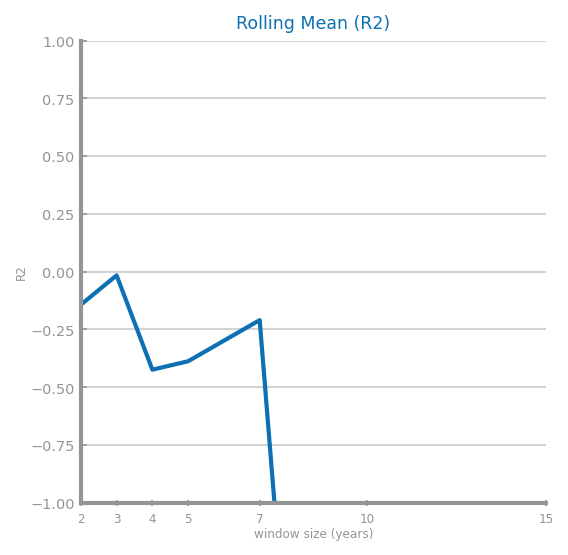

In [73]:
fig = figure(figsize=(HEIGHT, HEIGHT))
best_model, best_params = rolling_mean_study(train, test)
#savefig(f"images/{file_tag}_rollingmean_{measure}_study.png")
savefig(f"{save_path}/{file_tag}_rollingmean_{measure}_study.png")

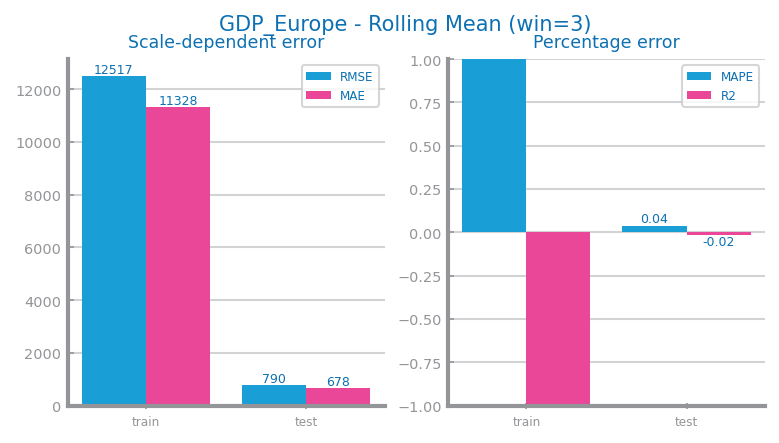

In [75]:
params = best_params["params"]
prd_trn: Series = best_model.predict(train)
prd_tst: Series = best_model.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Rolling Mean (win={params[0]})")
savefig(f"{save_path}/{file_tag}_rollingmean_{measure}_win{params[0]}_eval.png")


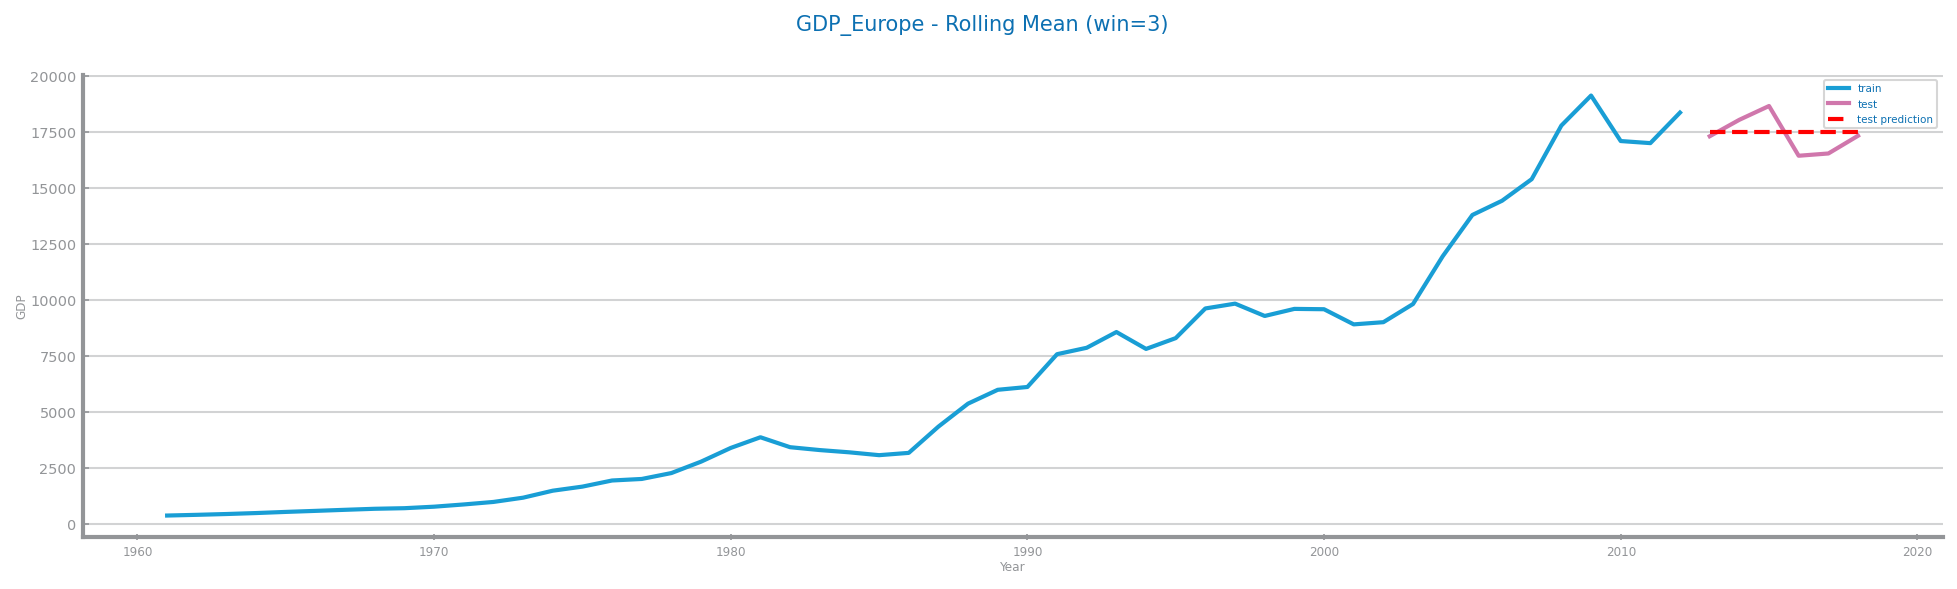

In [77]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Rolling Mean (win={params[0]})",
    xlabel=index,
    ylabel=target,
)
savefig(f"{save_path}/{file_tag}_rollingmean_{measure}_forecast.png")


=== Window Size: 2 years ===


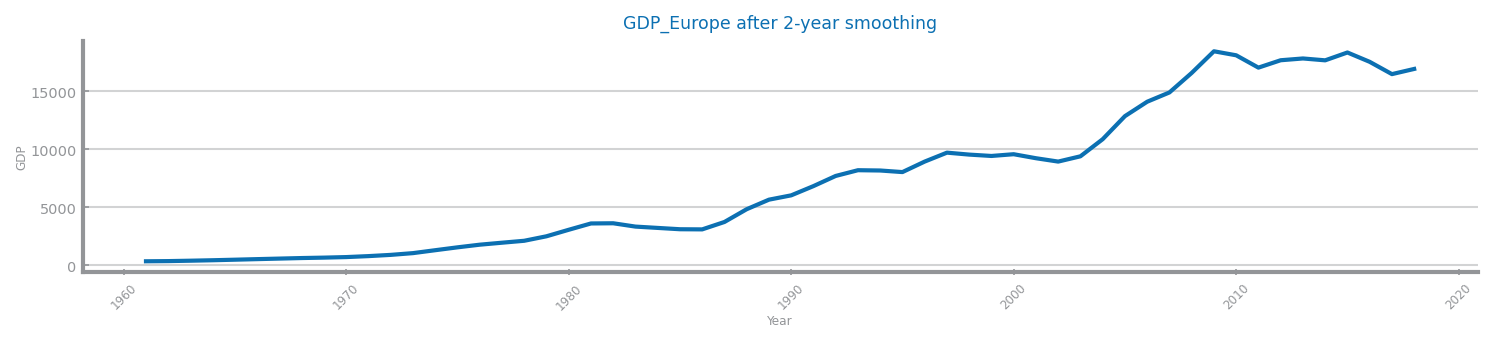

Coefficient: 1.0507
Intercept: 80.0024


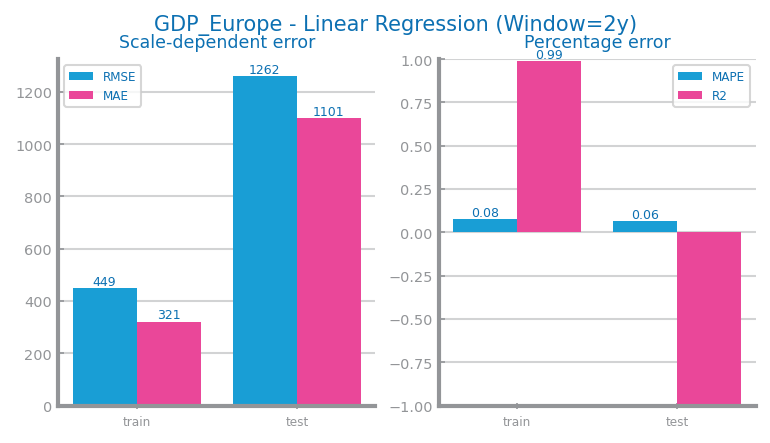

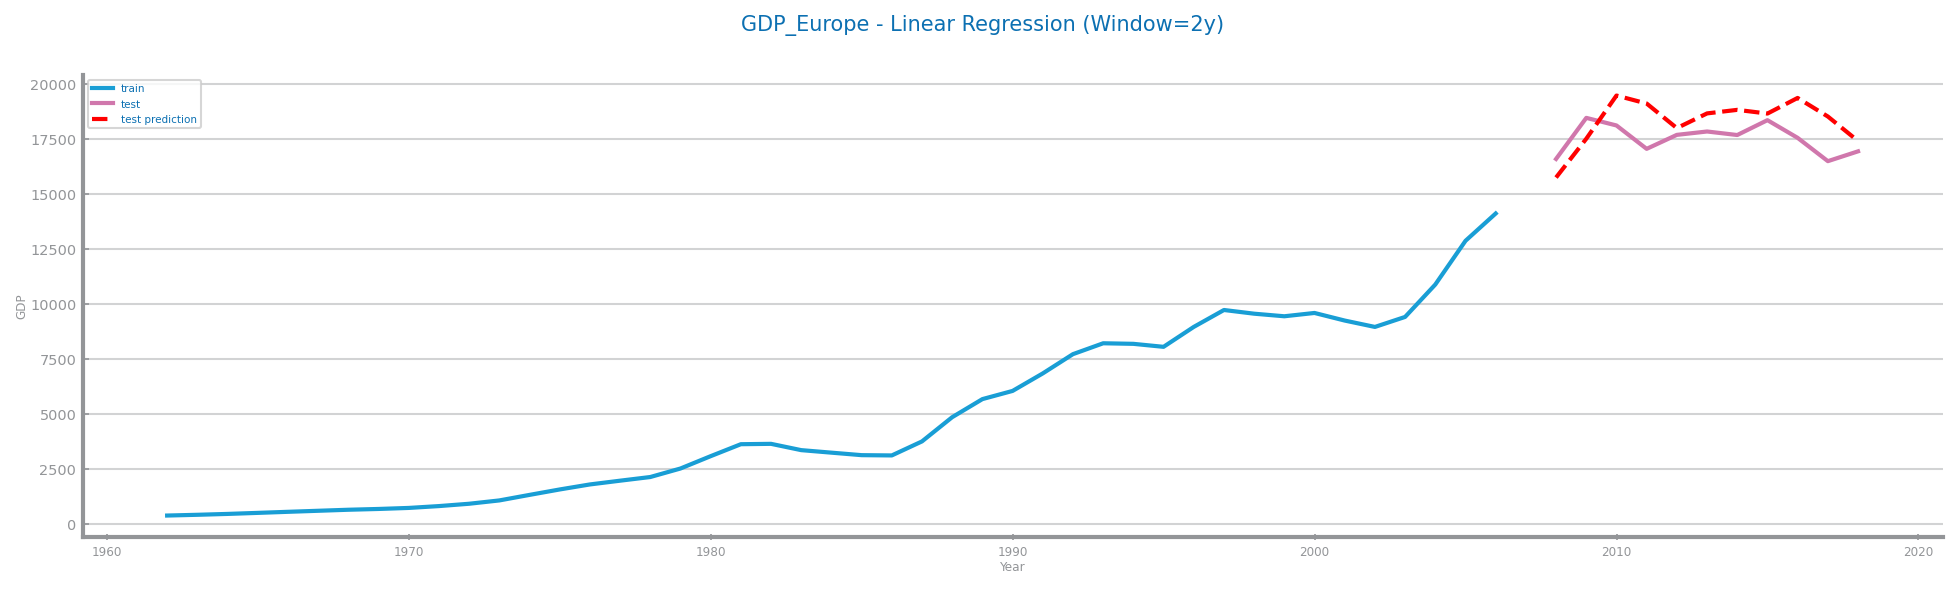


=== Window Size: 3 years ===


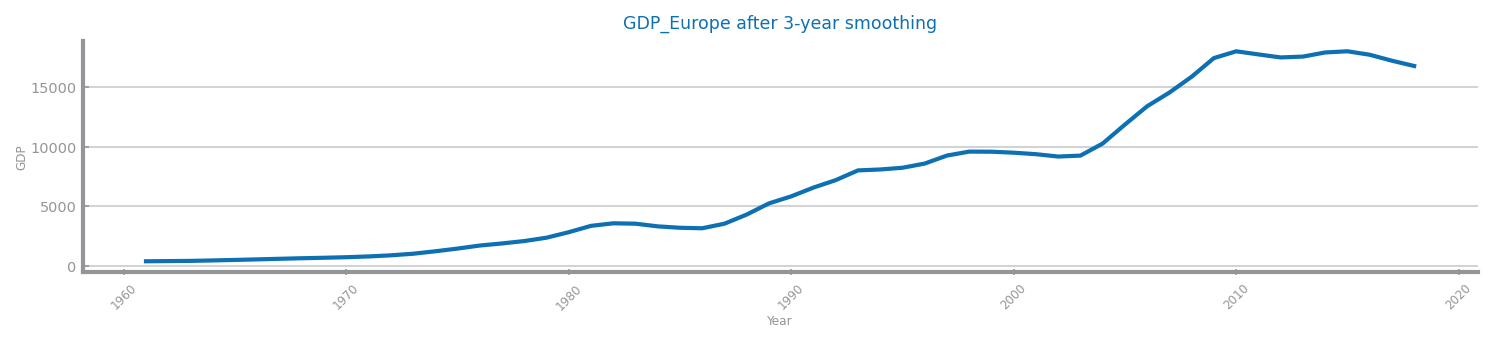

Coefficient: 1.0479
Intercept: 82.8844


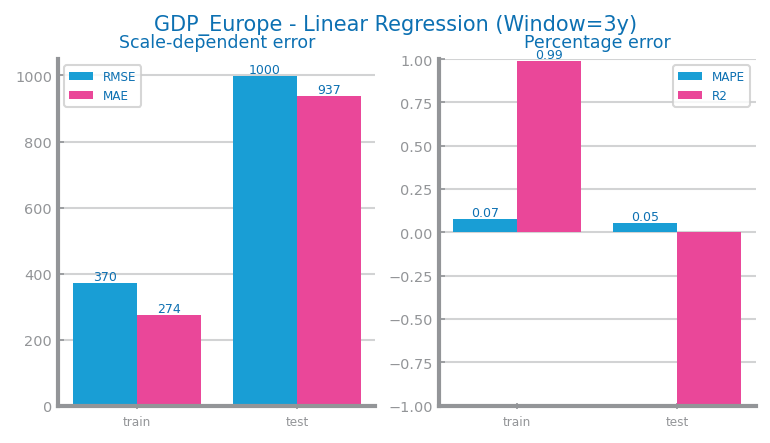

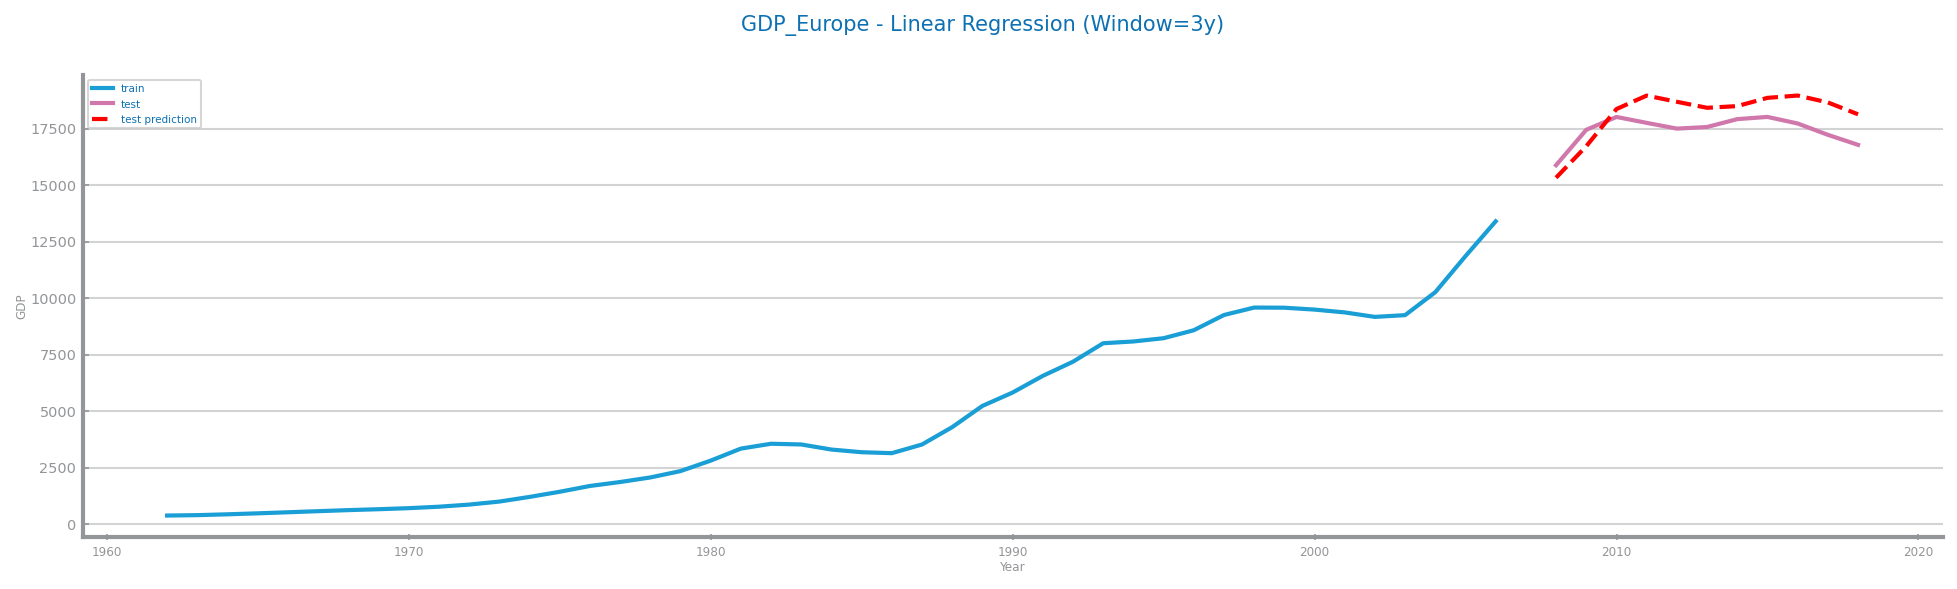


=== Window Size: 5 years ===


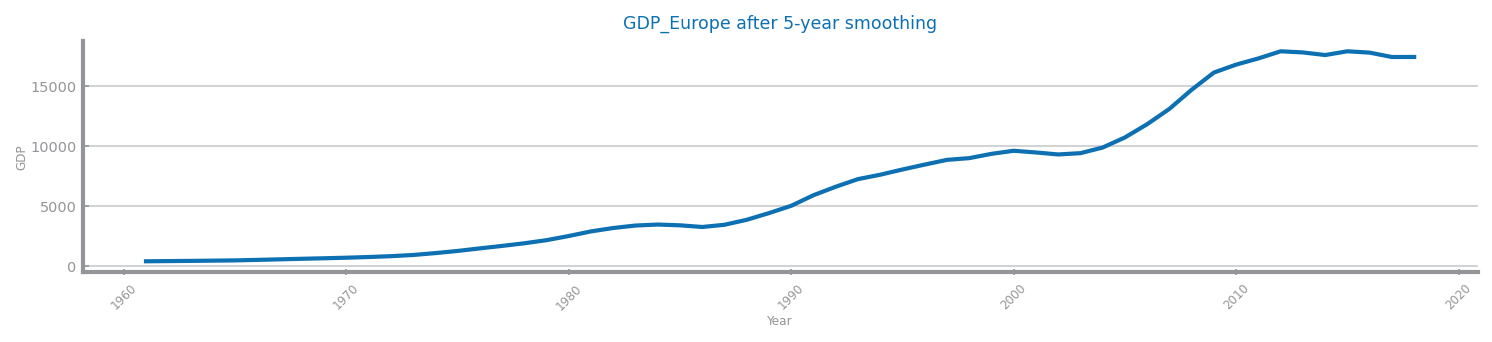

Coefficient: 1.0363
Intercept: 106.0570


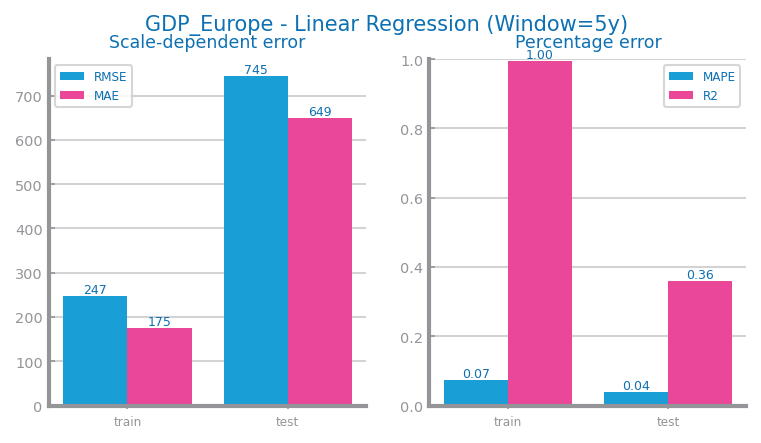

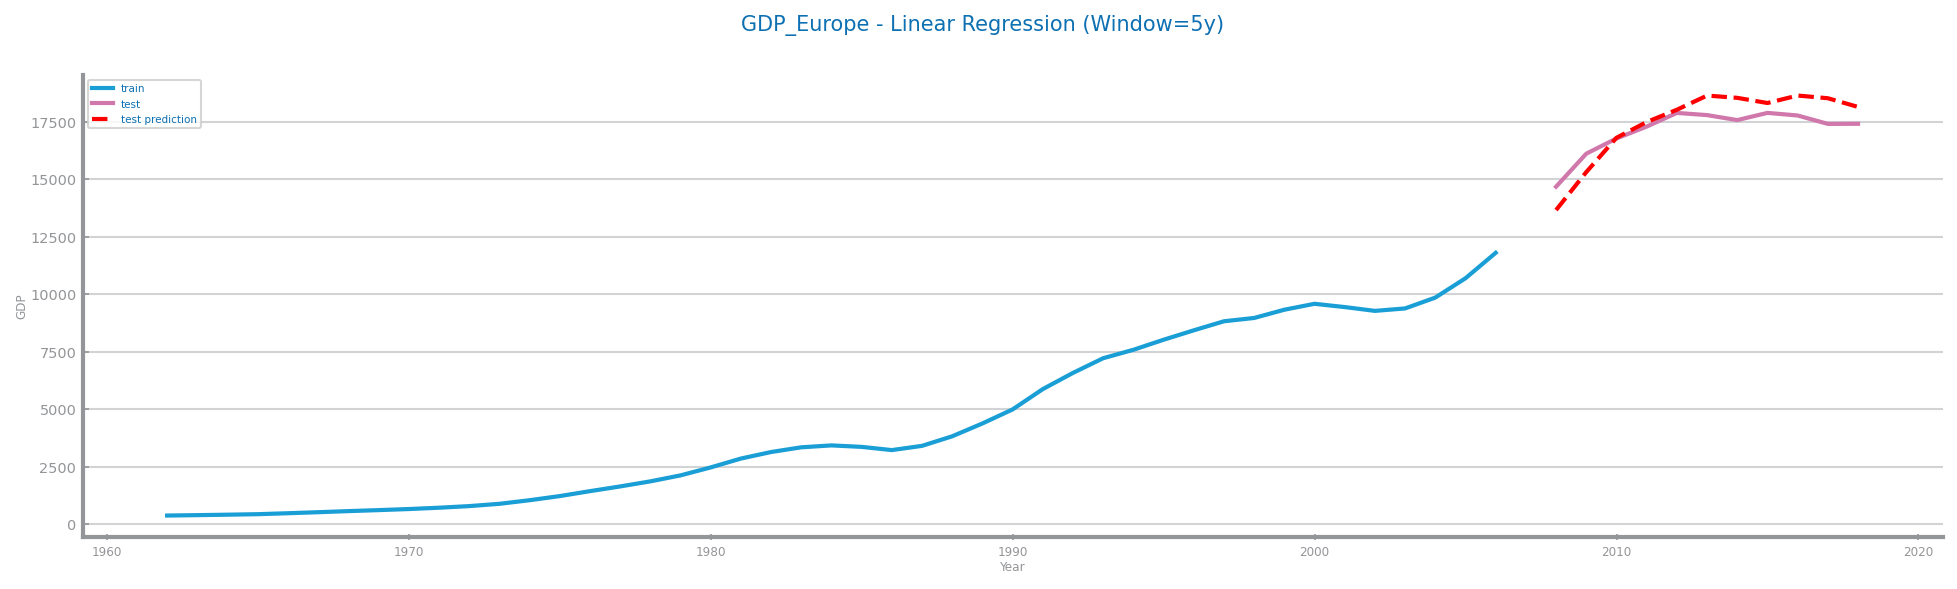


=== Window Size: 7 years ===


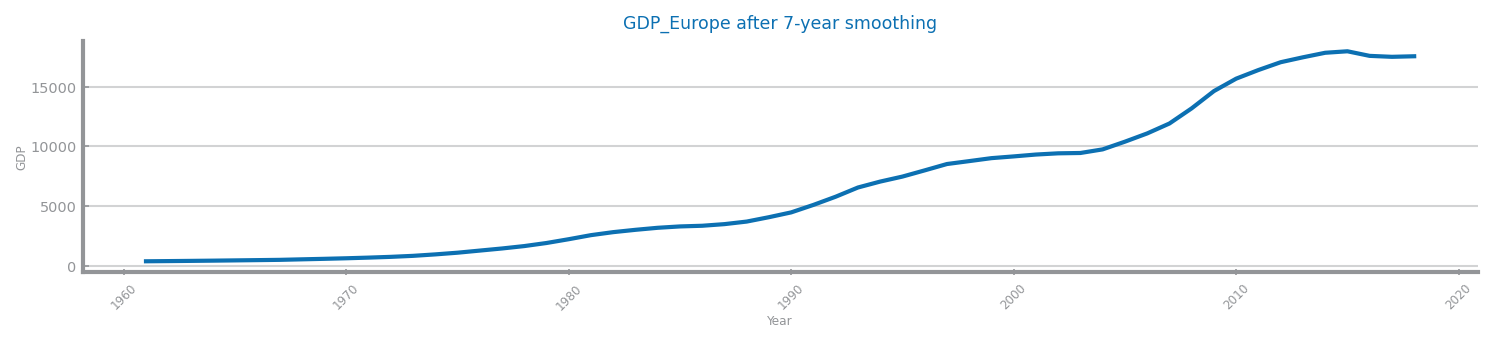

Coefficient: 1.0340
Intercept: 106.0815


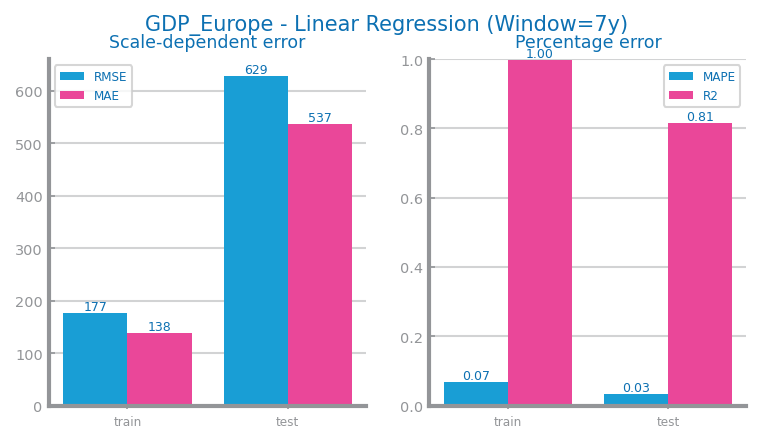

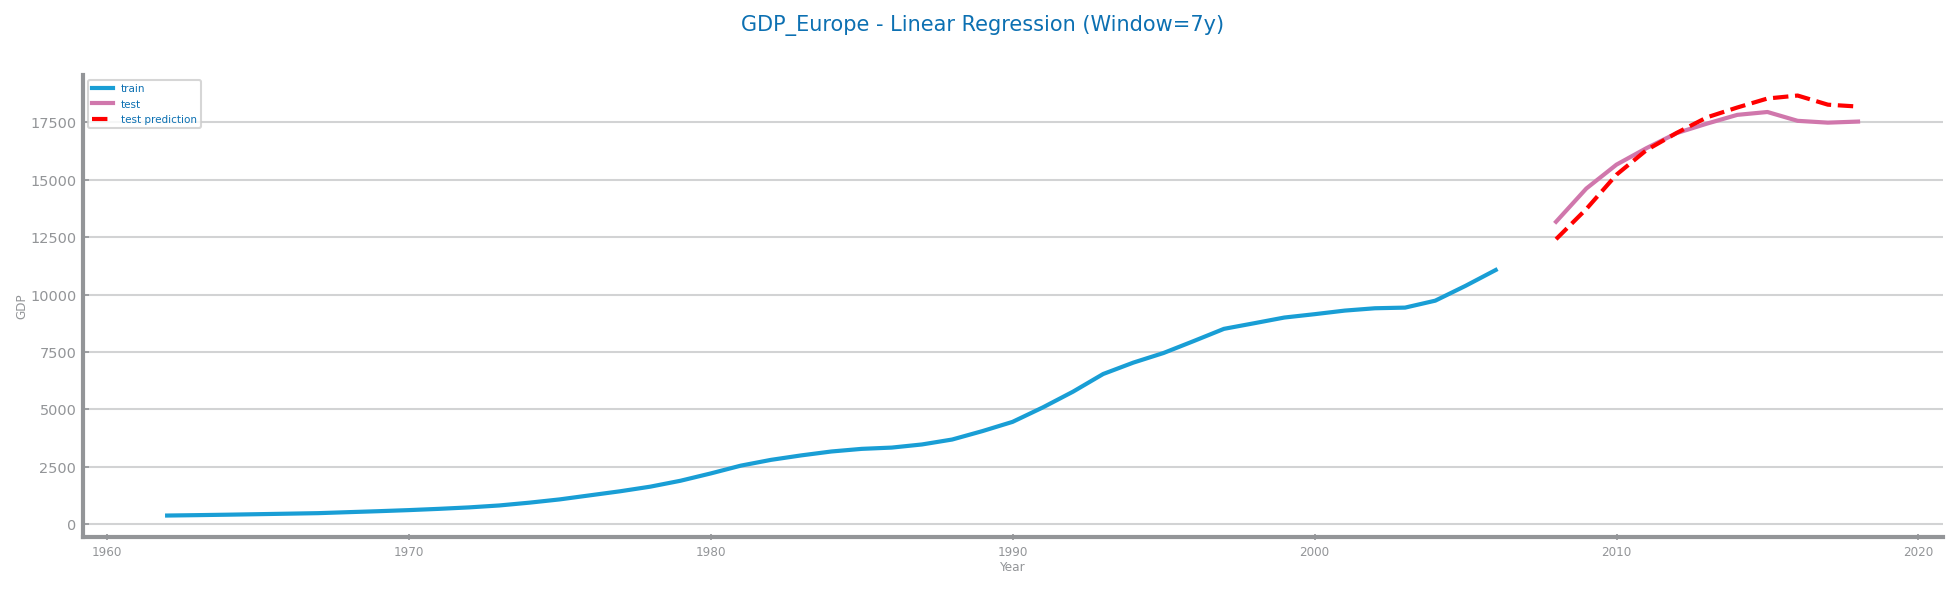

In [79]:
# Function to prepare data for linear regression
def prepare_data_for_lr(series: Series, lookback: int = 1):
    values = series.values
    X, y = [], []
    for i in range(lookback, len(values)):
        X.append(values[i-lookback:i])
        y.append(values[i])
    return np.array(X), np.array(y)

# Different window sizes for smoothing
windows = [2, 3, 5, 7]

for window in windows:
    print(f"\n=== Window Size: {window} years ===")
    
    # Smooth the series
    smoothed_series = series.rolling(window=window, min_periods=1).mean()
    
    # Split into train and test
    train_size = int(0.8 * len(smoothed_series))
    train = smoothed_series[:train_size]
    test = smoothed_series[train_size:]
    
    # Plot smoothed series
    figure(figsize=(3 * HEIGHT, HEIGHT / 2))
    plot_line_chart(
        smoothed_series.index.to_list(),
        smoothed_series.to_list(),
        xlabel="Year",
        ylabel=target,
        title=f"{file_tag} after {window}-year smoothing"
    )
    savefig(f"{save_path}/{file_tag}_smoothed_{window}y.png")
    show()
    
    # Prepare data for linear regression
    X_train, y_train = prepare_data_for_lr(train, lookback=1)
    X_test, y_test = prepare_data_for_lr(test, lookback=1)
    
    # Reshape for sklearn
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    
    # Train model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Make predictions
    prd_trn = Series(lr_model.predict(X_train), index=train.index[1:])
    prd_tst = Series(lr_model.predict(X_test), index=test.index[1:])
    
    # Print model details
    print(f"Coefficient: {lr_model.coef_[0]:.4f}")
    print(f"Intercept: {lr_model.intercept_:.4f}")
    
    # Plot forecasting evaluation
    plot_forecasting_eval(
        train[1:], 
        test[1:], 
        prd_trn, 
        prd_tst, 
        title=f"{file_tag} - Linear Regression (Window={window}y)"
    )
    savefig(f"{save_path}/{file_tag}_lr_eval_smooth_{window}y.png")
    
    # Plot forecasting series
    plot_forecasting_series(
        train[1:],
        test[1:],
        prd_tst,
        title=f"{file_tag} - Linear Regression (Window={window}y)",
        xlabel="Year",
        ylabel=target,
    )
    savefig(f"{save_path}/{file_tag}_lr_forecast_smooth_{window}y.png")
    show()

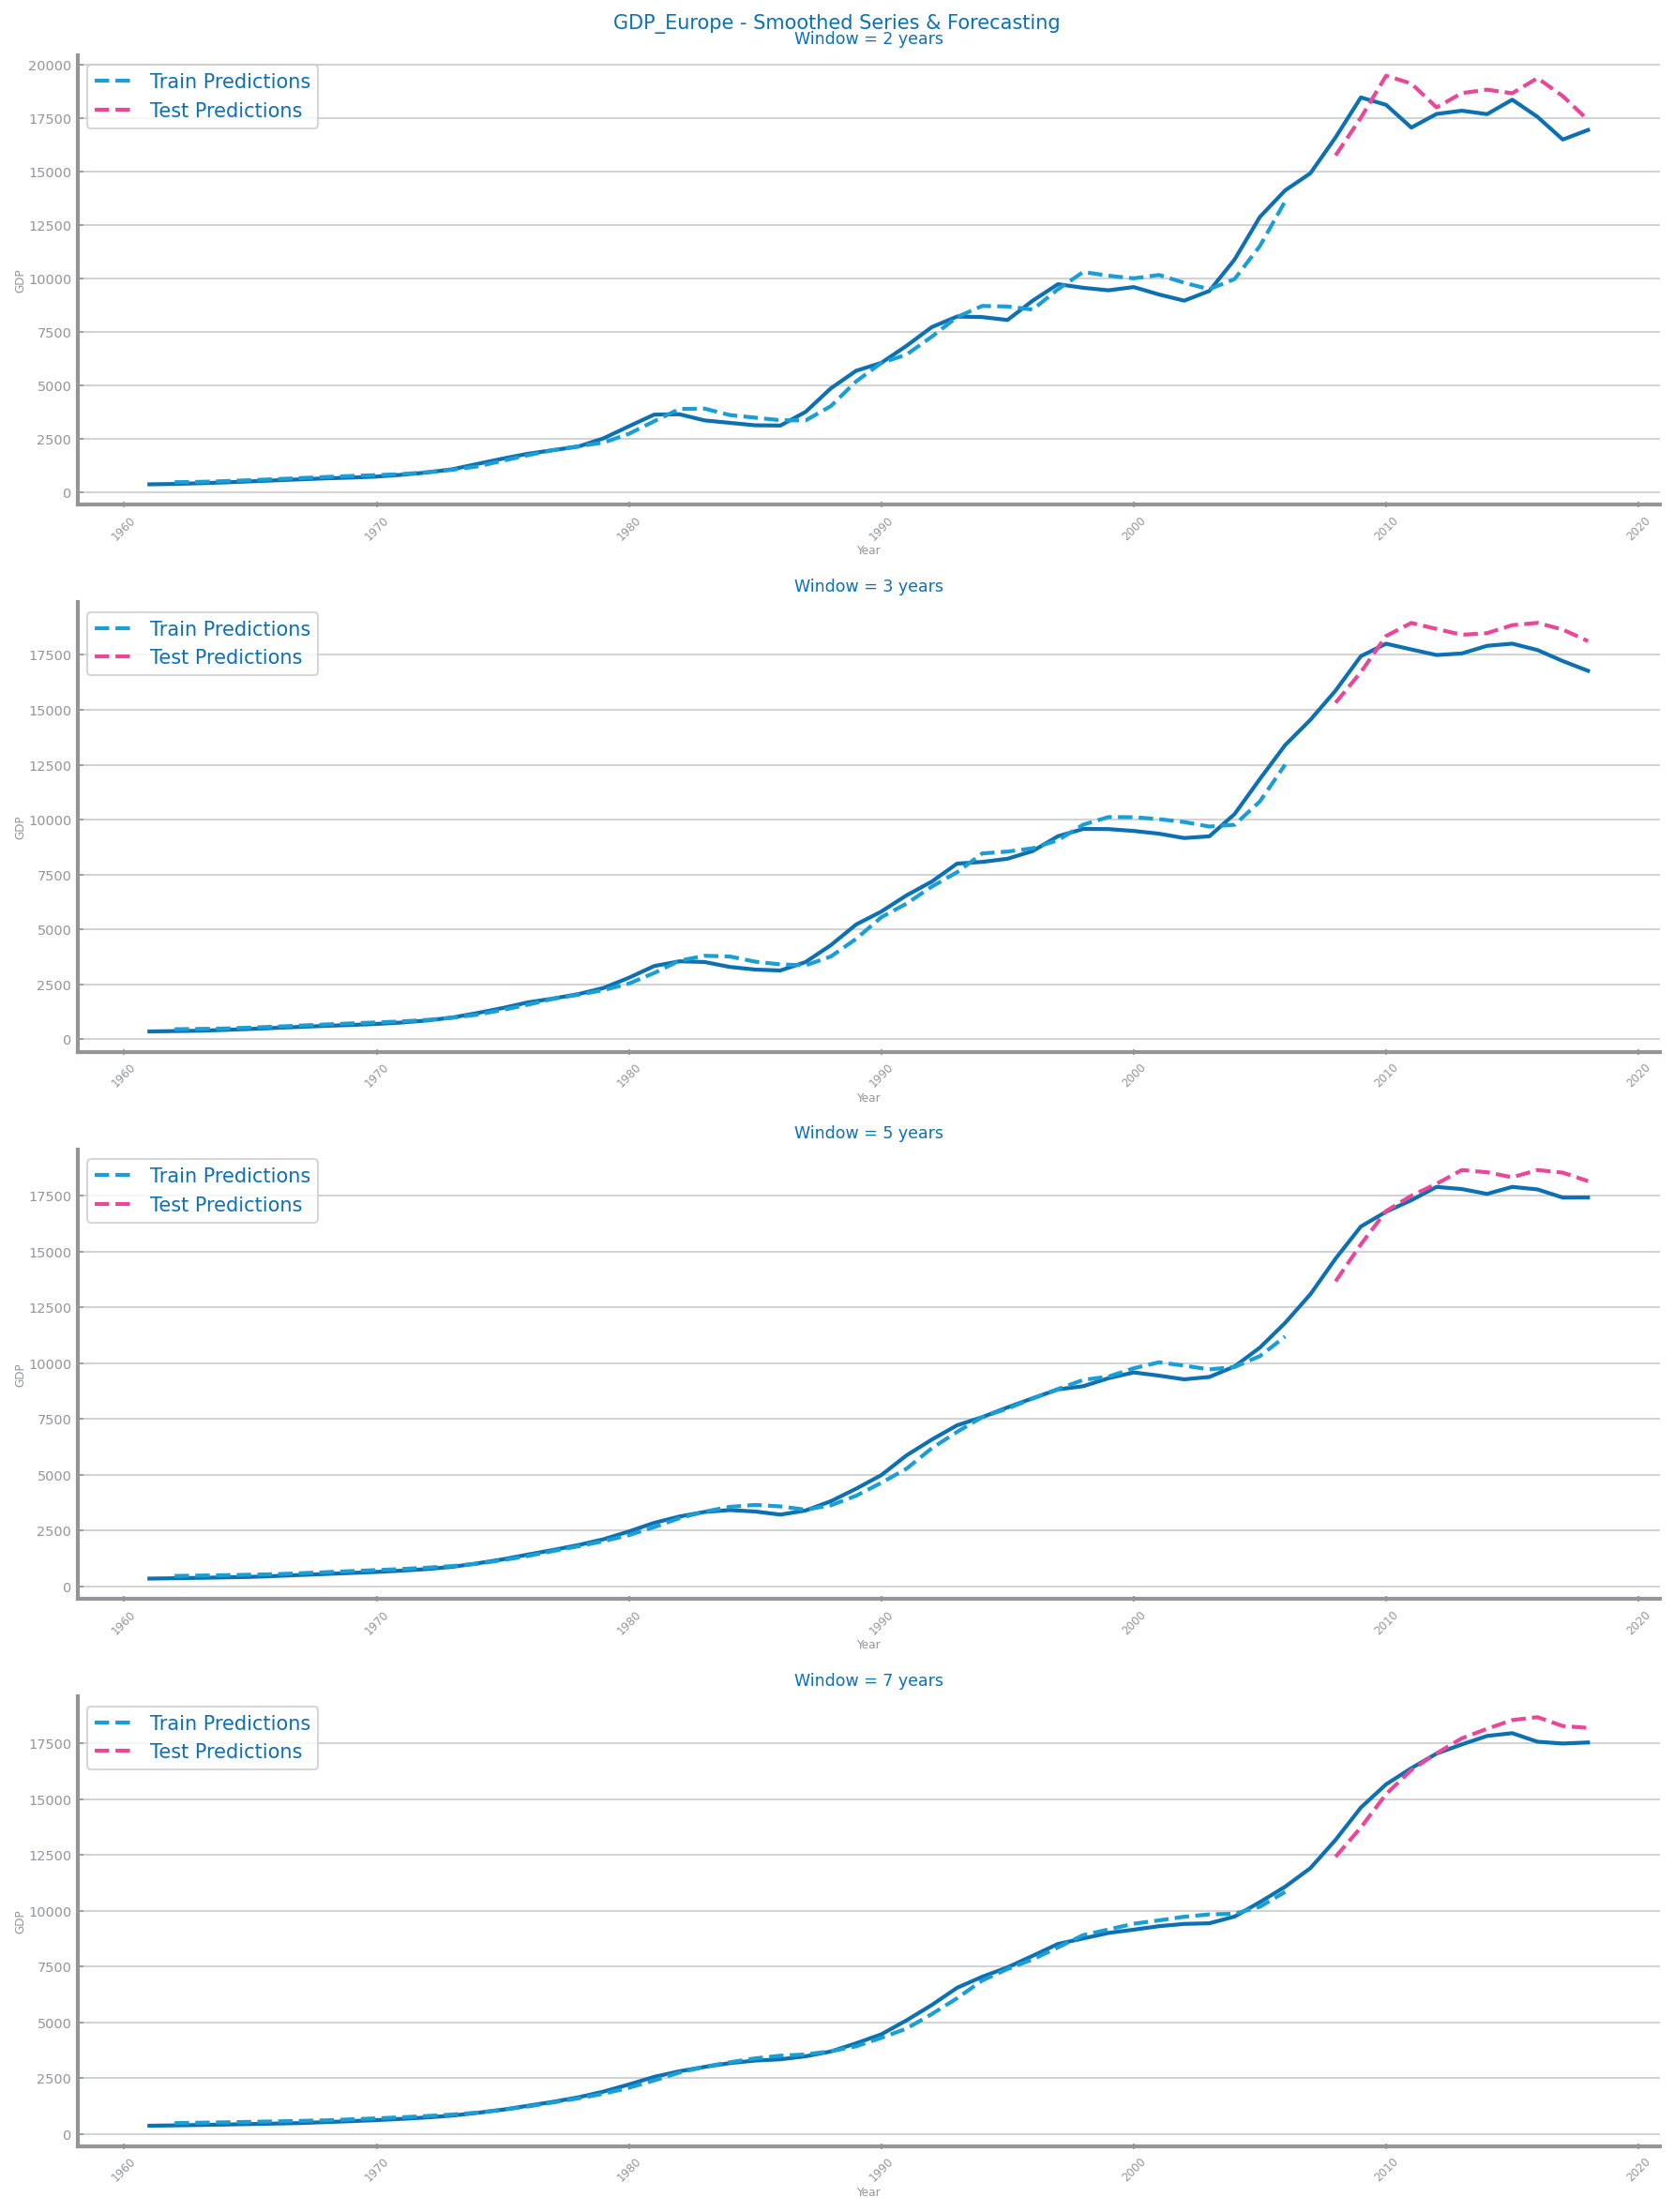

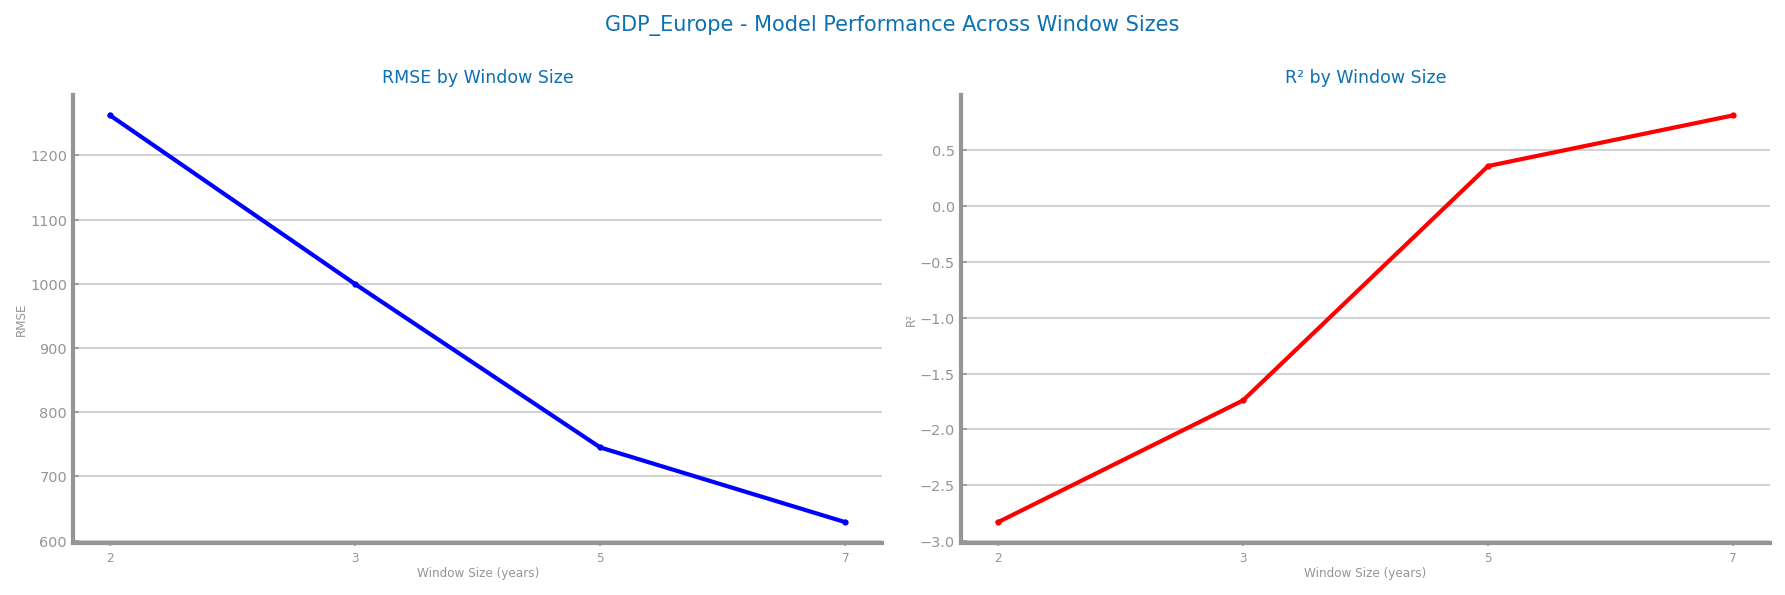


Numerical Results:
Window Size | RMSE    | R²
------------------------------
         2 | 1262.37 |   -2.83
         3 |  999.56 |   -1.74
         5 |  745.11 |    0.36
         7 |  628.77 |    0.81


In [80]:
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib.pyplot import figure, show, savefig, subplots

# Different window sizes for smoothing
windows = [2, 3, 5, 7]

# Create subplots for all smoothed series
fig, axs = subplots(len(windows), 1, figsize=(3 * HEIGHT, HEIGHT * len(windows)))
fig.suptitle(f"{file_tag} - Smoothed Series & Forecasting")

# Store results for each window
results = {}

for i, window in enumerate(windows):
    # Smooth the series
    smoothed_series = series.rolling(window=window, min_periods=1).mean()
    
    # Split into train and test
    train_size = int(0.8 * len(smoothed_series))
    train = smoothed_series[:train_size]
    test = smoothed_series[train_size:]
    
    # Prepare data for linear regression
    X_train = train[:-1].values.reshape(-1, 1)
    y_train = train[1:].values
    X_test = test[:-1].values.reshape(-1, 1)
    y_test = test[1:].values
    
    # Train model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Make predictions
    prd_trn = Series(lr_model.predict(X_train), index=train.index[1:])
    prd_tst = Series(lr_model.predict(X_test), index=test.index[1:])
    
    # Plot in the corresponding subplot
    plot_line_chart(
        smoothed_series.index.to_list(),
        smoothed_series.to_list(),
        ax=axs[i],
        xlabel="Year",
        ylabel=target,
        title=f"Window = {window} years"
    )
    
    # Add predictions to plot
    axs[i].plot(prd_trn.index, prd_trn.values, '--', label='Train Predictions')
    axs[i].plot(prd_tst.index, prd_tst.values, '--', label='Test Predictions')
    axs[i].legend()
    
    # Store metrics
    results[window] = {
        'RMSE': sqrt(FORECAST_MEASURES["MSE"](test[1:], prd_tst)),
        'R2': FORECAST_MEASURES["R2"](test[1:], prd_tst)
    }

plt.tight_layout()
savefig(f"{save_path}/{file_tag}_smoothing_forecasting_comparison.png")
show()

# Plot metrics comparison
fig, (ax1, ax2) = subplots(1, 2, figsize=(3 * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} - Model Performance Across Window Sizes")

# Plot RMSE
ax1.plot([str(w) for w in windows], [results[w]['RMSE'] for w in windows], 'bo-')
ax1.set_title('RMSE by Window Size')
ax1.set_xlabel('Window Size (years)')
ax1.set_ylabel('RMSE')

# Plot R2
ax2.plot([str(w) for w in windows], [results[w]['R2'] for w in windows], 'ro-')
ax2.set_title('R² by Window Size')
ax2.set_xlabel('Window Size (years)')
ax2.set_ylabel('R²')

plt.tight_layout()
savefig(f"{save_path}/{file_tag}_metrics_comparison.png")
show()

# Print numeric results
print("\nNumerical Results:")
print("Window Size | RMSE    | R²")
print("-" * 30)
for w in windows:
    print(f"{w:10d} | {results[w]['RMSE']:7.2f} | {results[w]['R2']:7.2f}")

Forecasting
Linear Regression

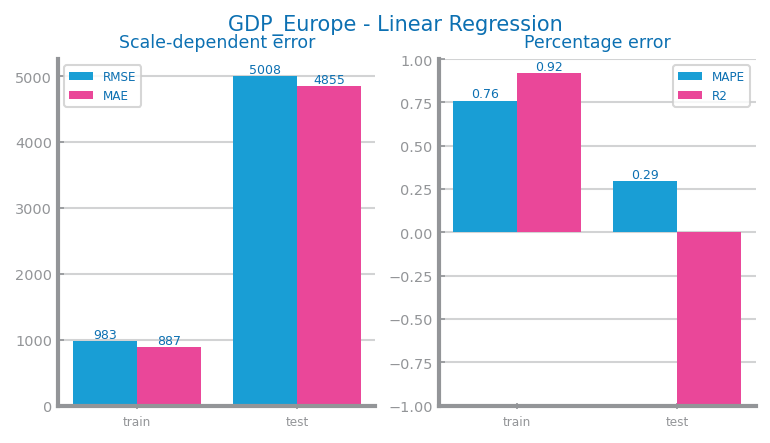

In [82]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval


trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
savefig(f"{save_path}/{file_tag}_linear_regression_eval.png")

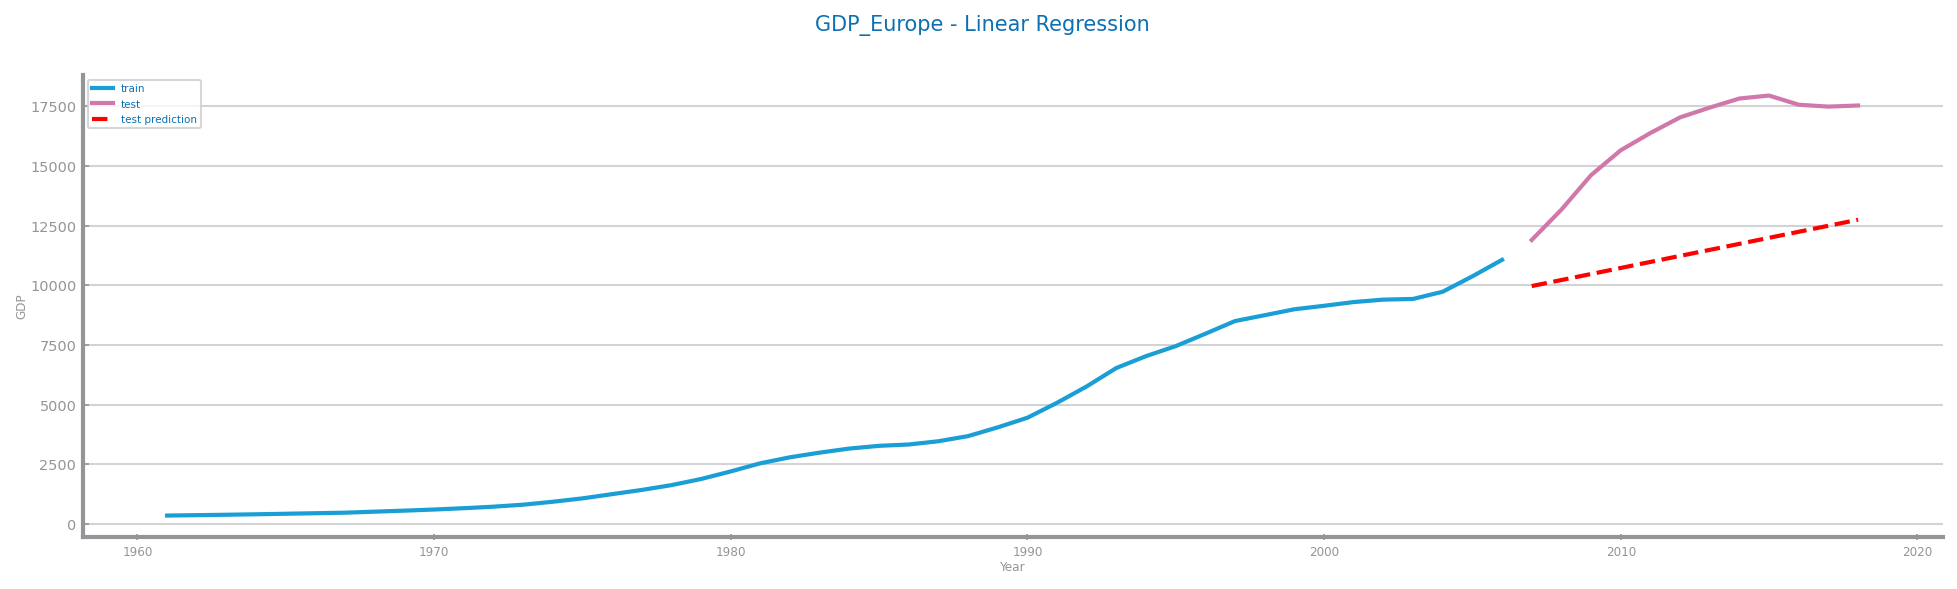

In [83]:
from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Linear Regression",
    xlabel=index,
    ylabel=target,
)
savefig(f"{save_path}/{file_tag}_linear_regression_forecast.png")

Forecasting
ARIMA

In [84]:
from pandas import read_csv, DataFrame, Series
from statsmodels.tsa.arima.model import ARIMA
from dslabs_functions import series_train_test_split, HEIGHT

predictor = ARIMA(train, order=(3, 1, 2))
model = predictor.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   46
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -269.097
Date:                Wed, 01 Jan 2025   AIC                            550.193
Time:                        21:58:24   BIC                            561.033
Sample:                    12-31-1960   HQIC                           554.234
                         - 12-31-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2740      0.175     -1.565      0.118      -0.617       0.069
ar.L2          0.7789      0.105      7.452      0.000       0.574       0.984
ar.L3          0.3309      0.132      2.504      0.0

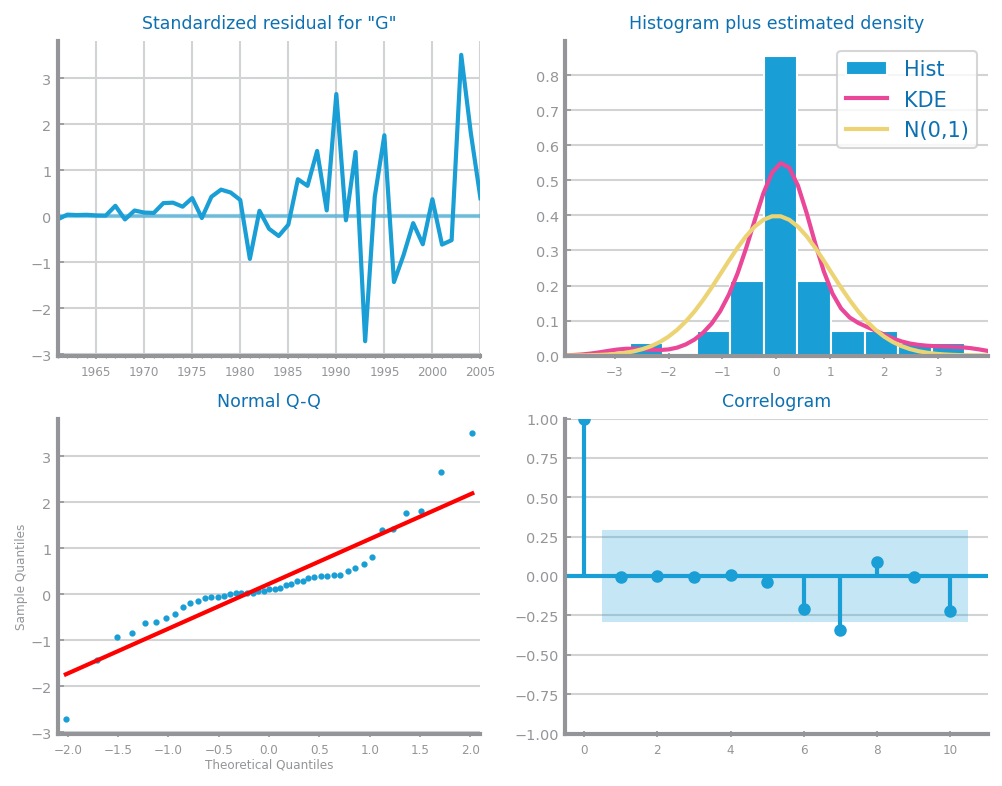

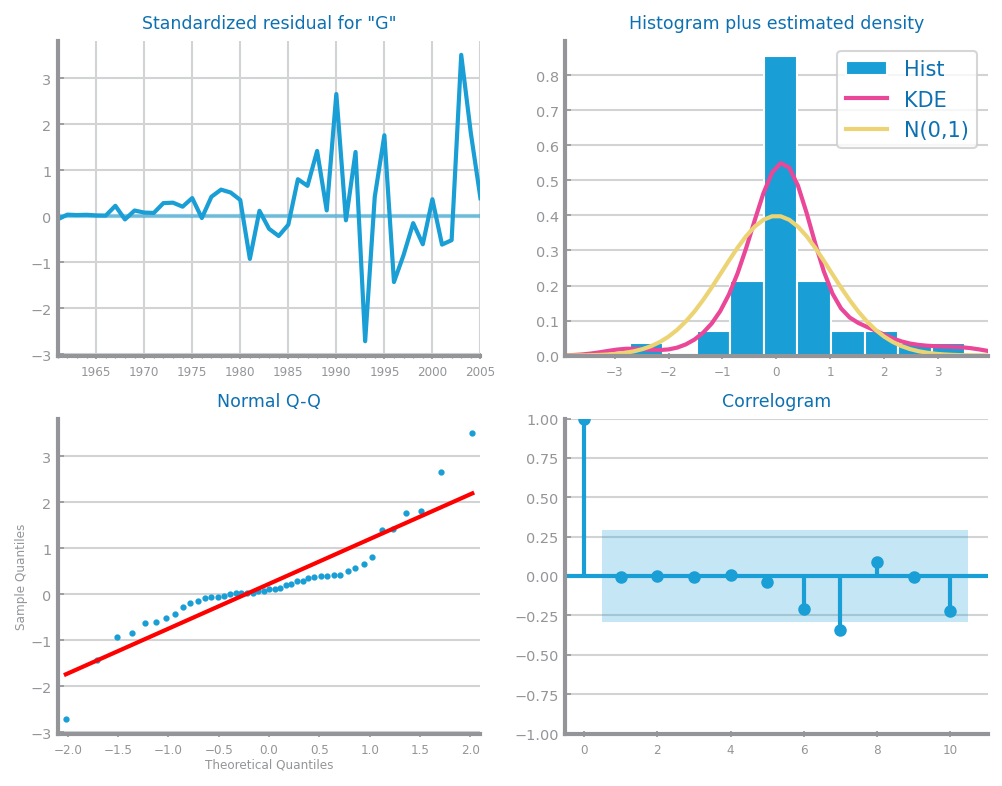

In [85]:
model.plot_diagnostics(figsize=(2 * HEIGHT, 1.5 * HEIGHT))


In [86]:
from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart
from statsmodels.tsa.arima.model import ARIMA

def arima_study(train: Series, test: Series, measure: str = "R2"):
    # Modified parameters for yearly data
    d_values = (0, 1, 2)  # Keep differencing the same
    p_params = (1, 2, 3, 4, 5)  # Reduced p values for yearly data
    q_params = (0, 1, 2, 3)  # Reduced q values for yearly data

    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "ARIMA", "metric": measure, "params": ()}
    best_performance: float = -100000

    fig, axs = subplots(1, len(d_values), figsize=(len(d_values) * HEIGHT, HEIGHT))
    for i in range(len(d_values)):
        d: int = d_values[i]
        values = {}
        for q in q_params:
            yvalues = []
            for p in p_params:
                try:
                    arima = ARIMA(train, order=(p, d, q))
                    model = arima.fit()
                    prd_tst = model.forecast(steps=len(test))
                    eval: float = FORECAST_MEASURES[measure](test, prd_tst)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (p, d, q)
                        best_model = model
                    yvalues.append(eval)
                except:
                    yvalues.append(None)
            values[q] = yvalues
        plot_multiline_chart(
            p_params, 
            values, 
            ax=axs[i], 
            title=f"ARIMA d={d} ({measure})", 
            xlabel="p", 
            ylabel=measure, 
            percentage=flag
        )
    print(
        f"ARIMA best results achieved with (p,d,q)=({best_params['params'][0]}, {best_params['params'][1]}, {best_params['params'][2]}) ==> {measure}={best_performance:.2f}"
    )

    return best_model, best_params


C:\Users\zahra\Data-Science\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\zahra\Data-Science\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\zahra\Data-Science\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\zahra\Data-Science\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\zahra\Data-Science\env\Lib\site-packages\statsmodels\base\model

ARIMA best results achieved with (p,d,q)=(1, 2, 0) ==> R2=0.51


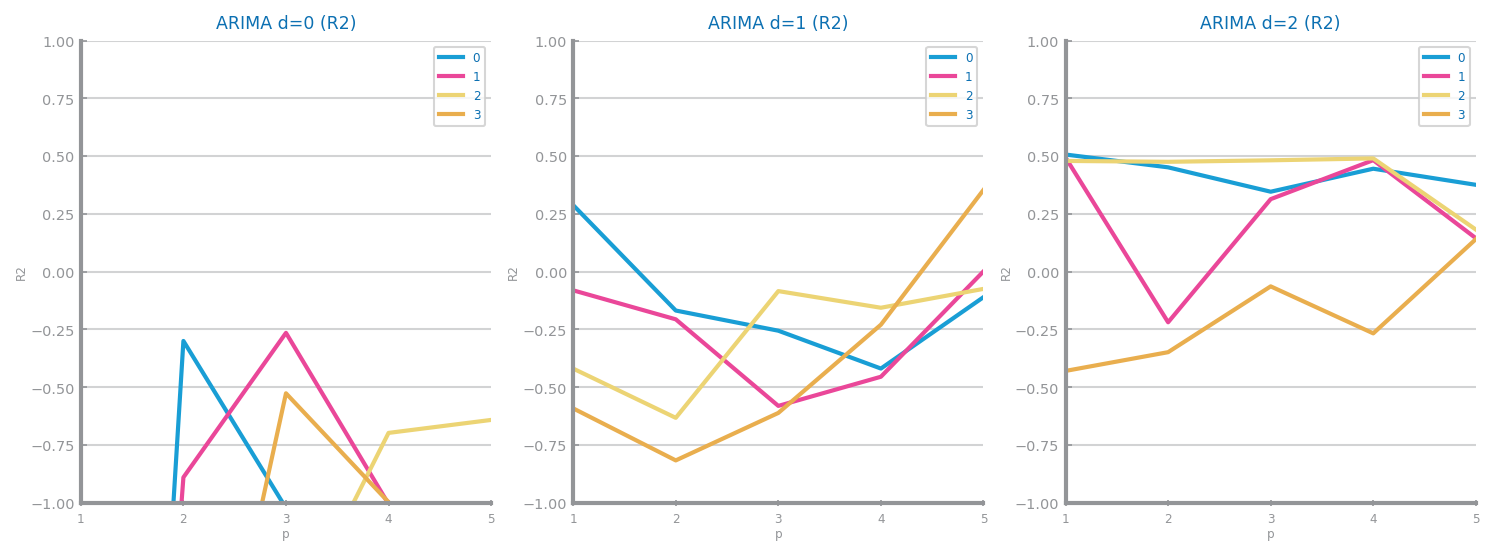

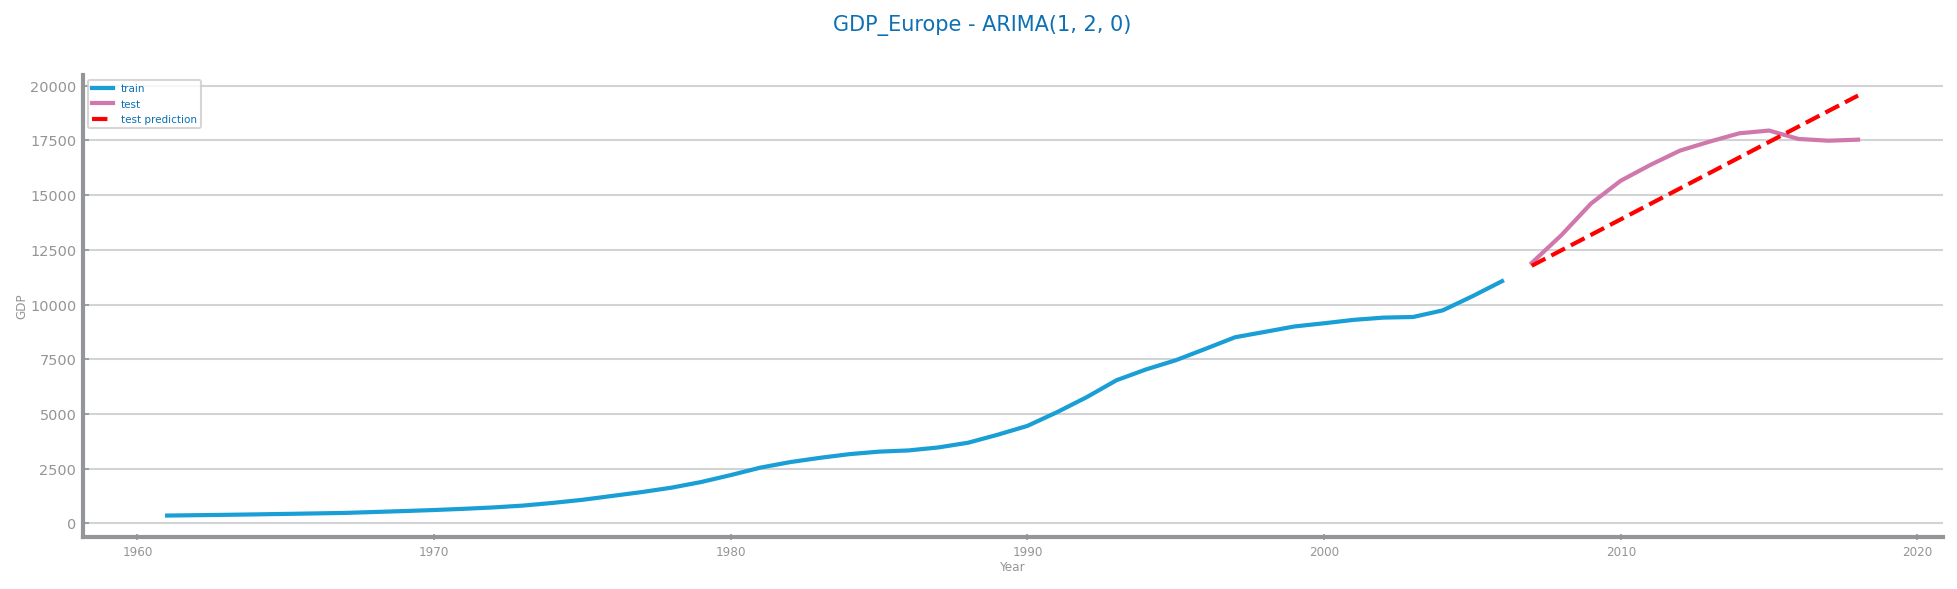

In [88]:
# Run the study
best_model, best_params = arima_study(train, test, measure=measure)
savefig(f"{save_path}/{file_tag}_arima_{measure}_study.png")

# Plot the best model's predictions
if best_model is not None:
    prd_tst = best_model.forecast(steps=len(test))
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag} - ARIMA{best_params['params']}",
        xlabel="Year",
        ylabel=target,
    )
    savefig(f"{save_path}/{file_tag}_arima_forecast.png")
    show()

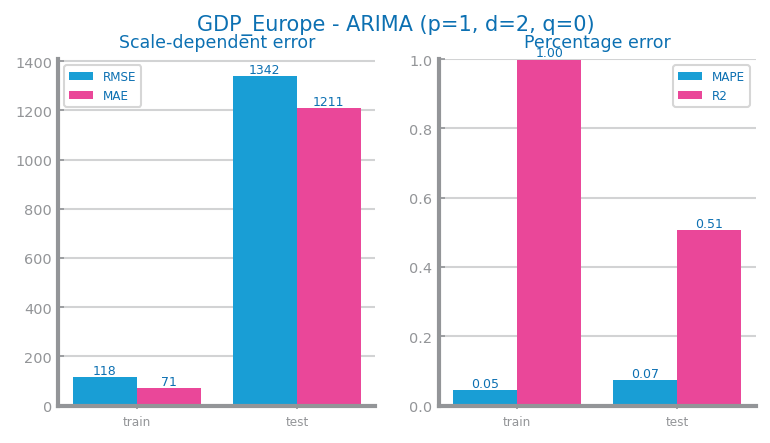

In [89]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))

plot_forecasting_eval(
    train, test, prd_trn, prd_tst, title=f"{file_tag} - ARIMA (p={params[0]}, d={params[1]}, q={params[2]})"
)
savefig(f"{save_path}/{file_tag}_arima_{measure}_eval.png")

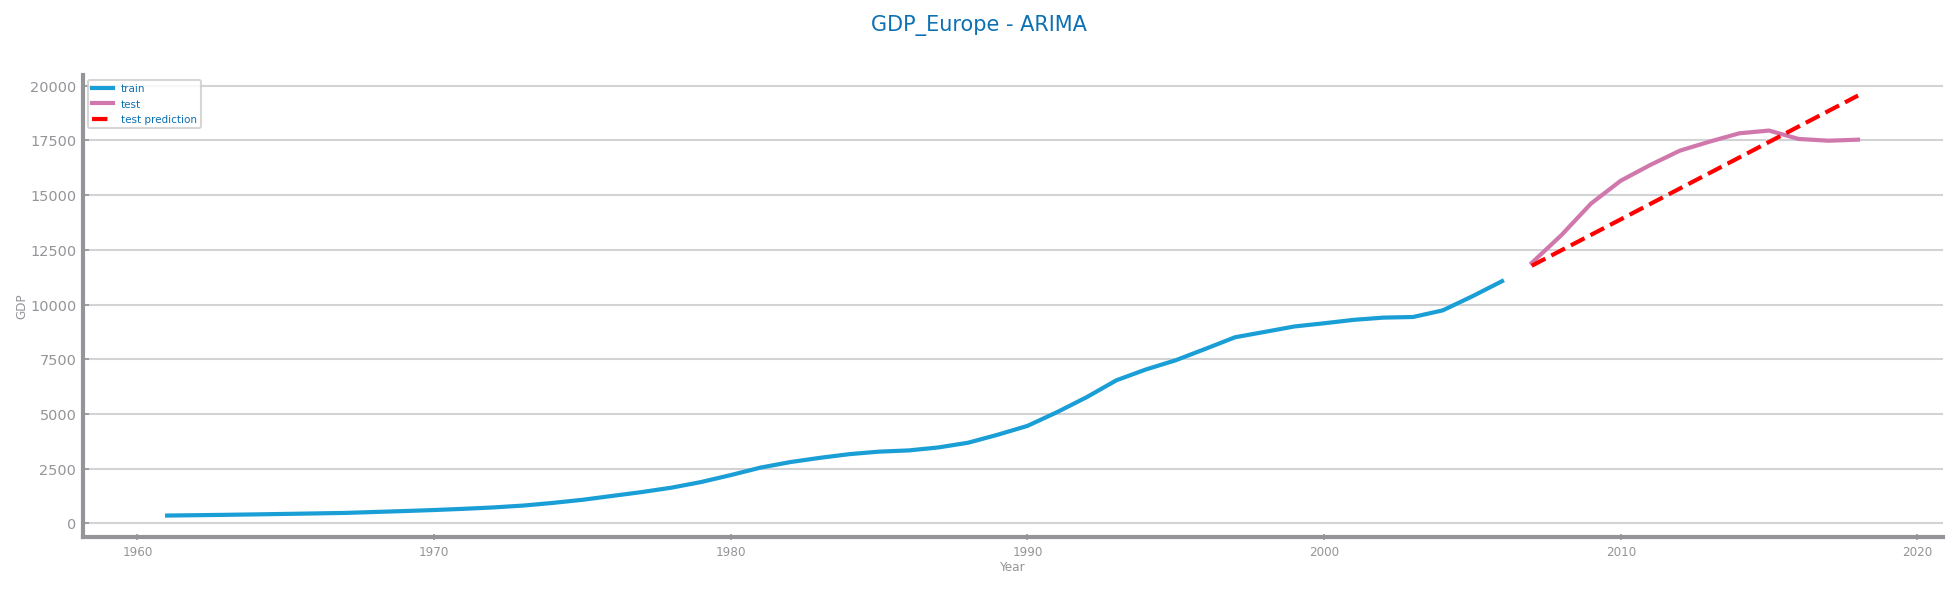

In [91]:
from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - ARIMA ",
    xlabel=index,
    ylabel=target,
)
savefig(f"{save_path}/{file_tag}_arima_{measure}_forecast.png")

Forecasting
after diff

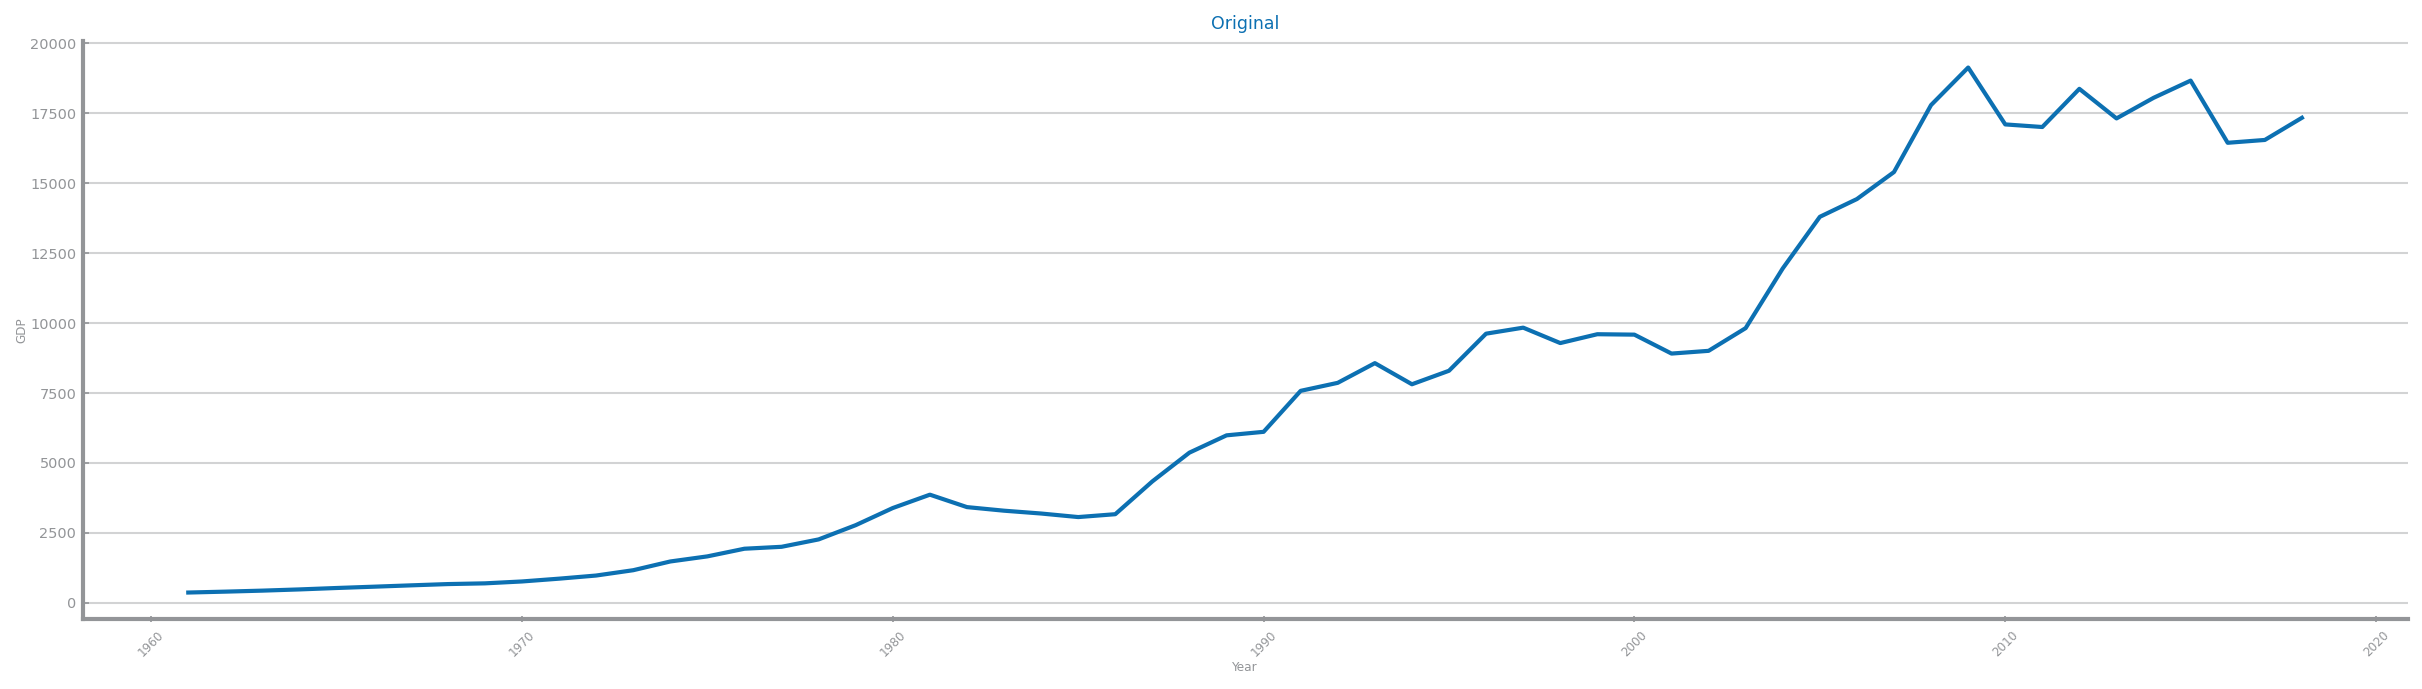

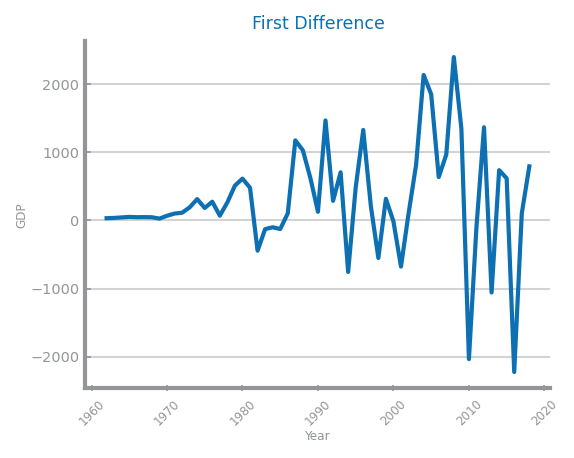

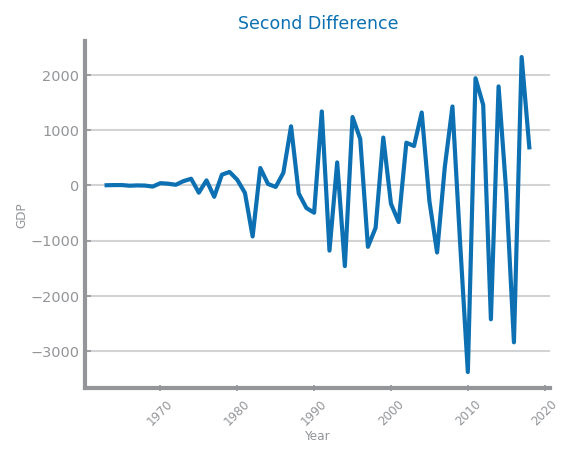


Original Series:


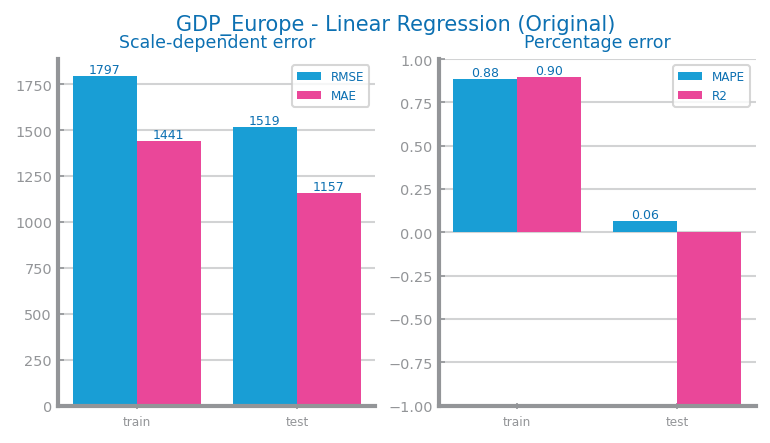

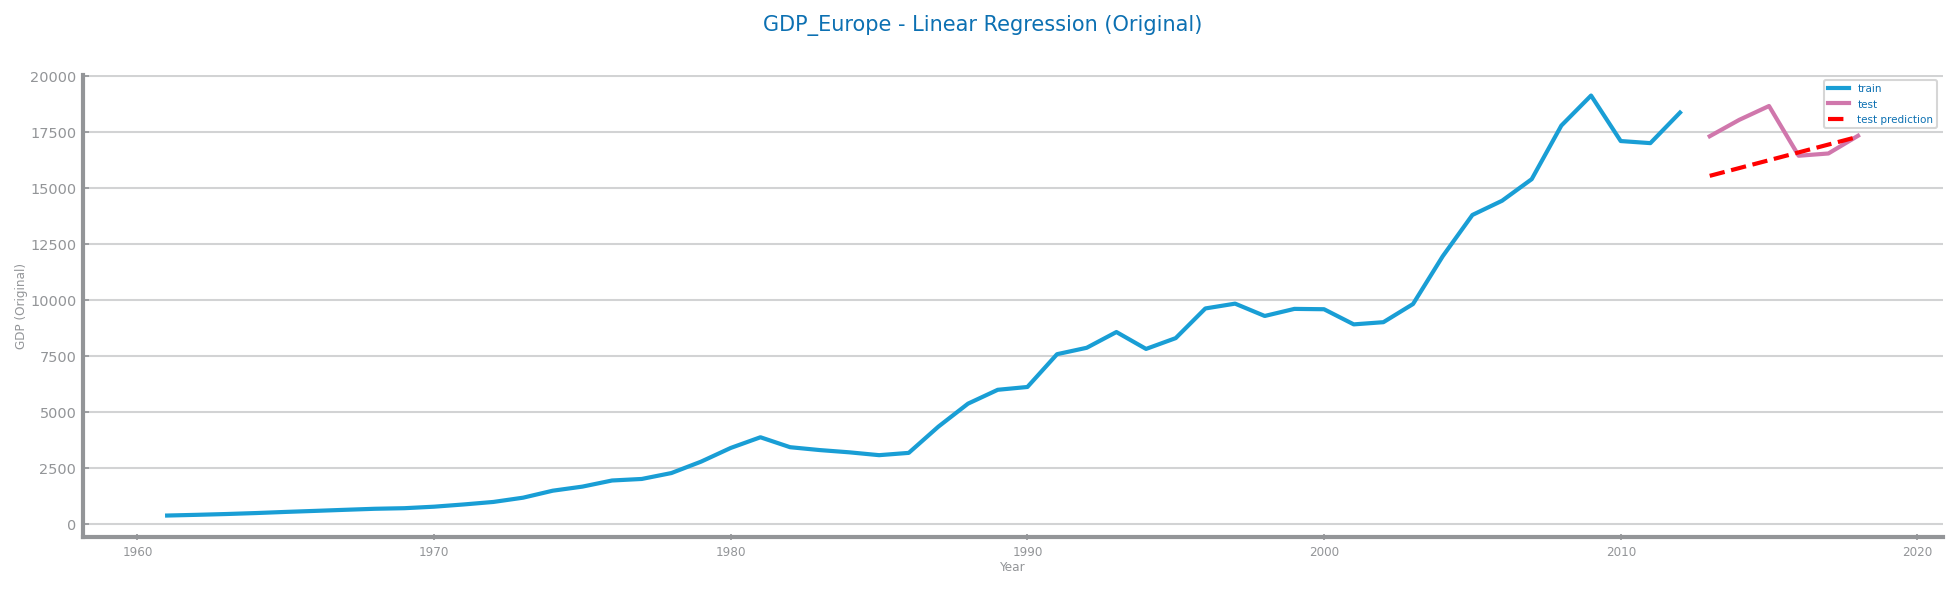

Coefficient: 349.8015
Intercept: -2643.6517
R²: -2.7551

First Difference:


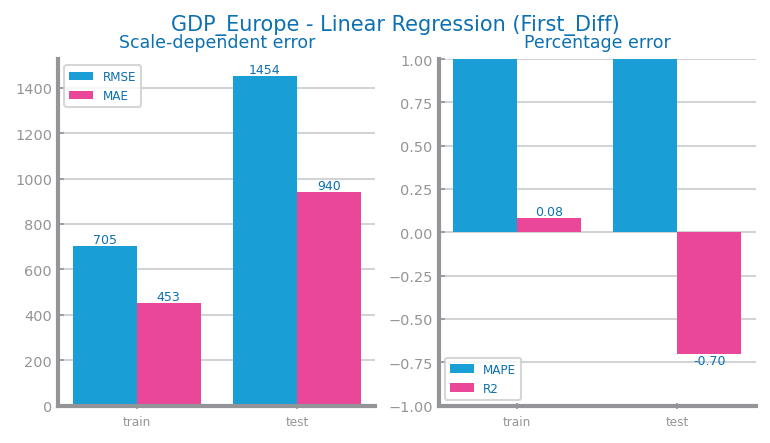

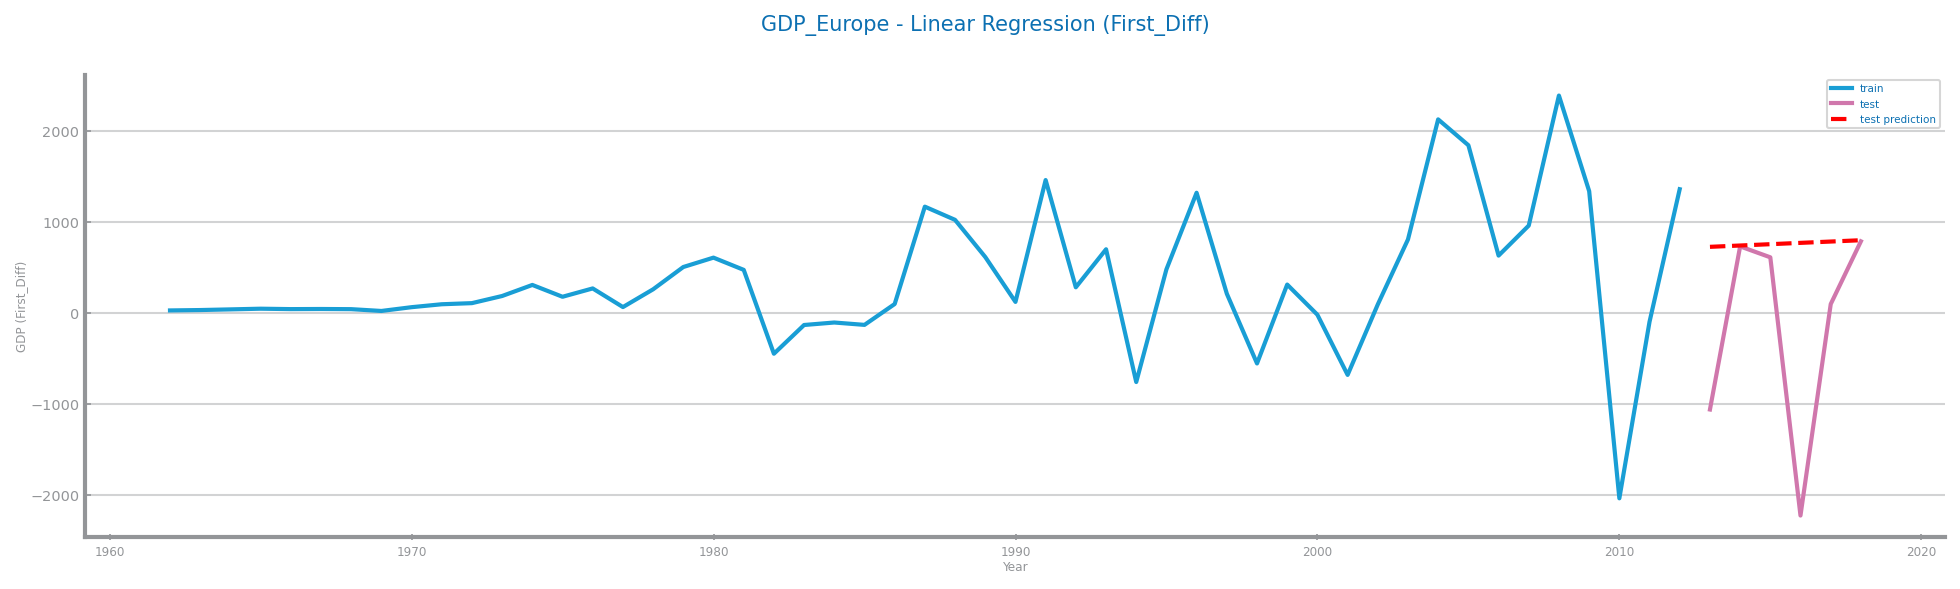

Coefficient: 14.5438
Intercept: -10.3471
R²: -0.7044

Second Difference:


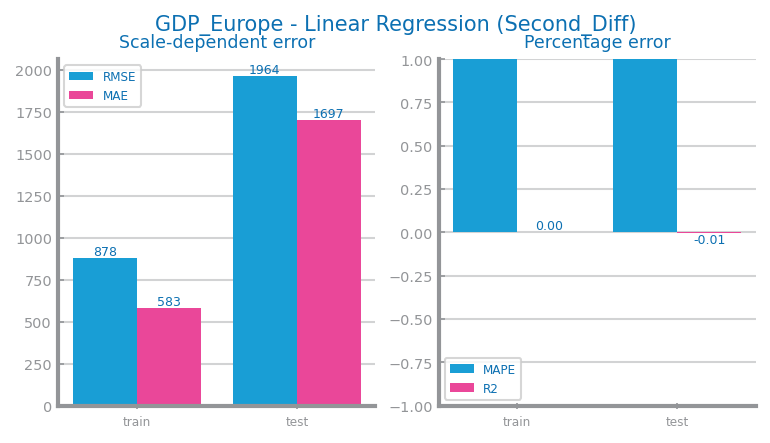

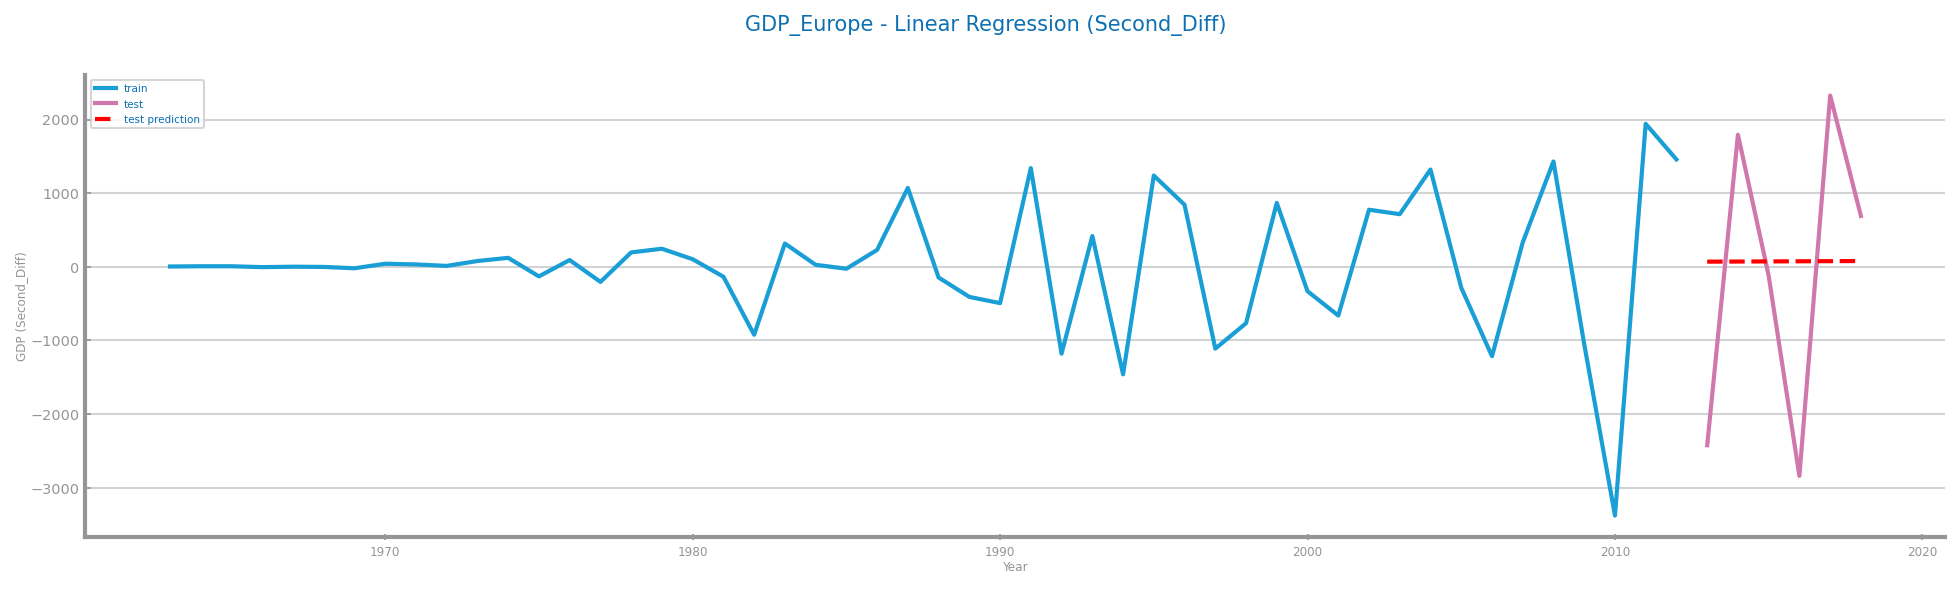

Coefficient: 1.6910
Intercept: -14.7645
R²: -0.0064


In [97]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, savefig, show
from sklearn.linear_model import LinearRegression
from dslabs_functions import plot_forecasting_eval, plot_forecasting_series

# Define a corrected train-test split function for Series
def series_train_test_split(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: Series = data.copy()
    train: Series = df_cp.iloc[:trn_size]  # Remove the ', 0' for Series
    test: Series = df_cp.iloc[trn_size:]   # Remove the ', 0' for Series
    return train, test

# First, create differentiated series
diff1 = series.diff()  # First difference
diff2 = series.diff().diff()  # Second difference

# Remove NaN values from differencing
diff1 = diff1.dropna()
diff2 = diff2.dropna()

# Function to evaluate linear regression on a series
def evaluate_lr_on_series(data_series, title_prefix):
    # Split into train/test
    train, test = series_train_test_split(data_series, trn_pct=0.90)
    
    # Prepare data for linear regression
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data_series)).reshape(-1, 1)
    tstY = test.to_numpy()
    
    # Train model
    model = LinearRegression()
    model.fit(trnX, trnY)
    
    # Make predictions
    prd_trn = Series(model.predict(trnX), index=train.index)
    prd_tst = Series(model.predict(tstX), index=test.index)
    
    # Plot evaluation
    plot_forecasting_eval(
        train, test, prd_trn, prd_tst, 
        title=f"{file_tag} - Linear Regression ({title_prefix})"
    )
    savefig(f"{save_path}/{file_tag}_linear_regression_{title_prefix}_eval.png")
    
    # Plot forecasting
    plot_forecasting_series(
        train, test, prd_tst,
        title=f"{file_tag} - Linear Regression ({title_prefix})",
        xlabel="Year",
        ylabel=f"{target} ({title_prefix})"
    )
    savefig(f"{save_path}/{file_tag}_linear_regression_{title_prefix}_forecast.png")
    show()
    
    return model.coef_[0], model.intercept_, model.score(tstX, tstY)

# Plot original and differentiated series
figure(figsize=(20, 5))
for i, (s, title) in enumerate([(series, "Original"), 
                               (diff1, "First Difference"), 
                               (diff2, "Second Difference")]):
    plot_line_chart(
        s.index.to_list(),
        s.to_list(),
        xlabel="Year",
        ylabel=target,
        title=title
    )
    show()

# Evaluate linear regression on each series
print("\nOriginal Series:")
coef, intercept, r2 = evaluate_lr_on_series(series, "Original")
print(f"Coefficient: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")

print("\nFirst Difference:")
coef, intercept, r2 = evaluate_lr_on_series(diff1, "First_Diff")
print(f"Coefficient: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")

print("\nSecond Difference:")
coef, intercept, r2 = evaluate_lr_on_series(diff2, "Second_Diff")
print(f"Coefficient: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")

forcasting 
LSTM

In [98]:
from torch import no_grad, tensor, float32
from torch.nn import LSTM, Linear, Module, MSELoss
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

def prepare_dataset_for_lstm(series, seq_length: int = 4):
    # Convert series to numpy then tensor, reshape for LSTM
    data = series.values.reshape(-1, 1).astype('float32')
    setX: list = []
    setY: list = []
    for i in range(len(data) - seq_length):
        past = data[i : i + seq_length]
        future = data[i + 1 : i + seq_length + 1]
        setX.append(past)
        setY.append(future)
    return tensor(setX), tensor(setY)

class DS_LSTM(Module):
    def __init__(self, train, input_size: int = 1, hidden_size: int = 32, num_layers: int = 1, length: int = 4):
        super().__init__()
        self.lstm = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = Linear(hidden_size, 1)
        self.optimizer = Adam(self.parameters())
        self.loss_fn = MSELoss()

        # Prepare training data
        trnX, trnY = prepare_dataset_for_lstm(train, seq_length=length)
        # Adjusted batch size for yearly data
        self.loader = DataLoader(TensorDataset(trnX, trnY), shuffle=True, batch_size=max(1, len(train) // 5))

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

    def fit(self):
        self.train()
        for batchX, batchY in self.loader:
            y_pred = self(batchX)
            loss = self.loss_fn(y_pred, batchY)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return loss

    def predict(self, X):
        self.eval()  # Set to evaluation mode
        with no_grad():
            y_pred = self(X)
        return y_pred[:, -1, :]